# *+Processing with CHM & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
            


# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,4.8122,1.7630,-0.3147,-0.1590,-2.4418,1.9125,0.85,12.233545,19.097736,243,2961.898193
1,5.7589,2.4570,-0.2485,0.3429,-0.1997,2.6319,1.00,14.964220,17.704655,248,2218.239746
2,5.8464,2.5153,-0.1054,0.5493,-0.2144,2.7020,1.00,15.329449,17.559893,240,2220.297119
3,5.7526,2.6304,-0.0834,0.3900,-0.3510,2.7763,0.97,15.392742,20.676994,244,3033.770752
4,5.9480,2.6748,0.0000,0.5715,-0.3711,2.8314,1.00,17.944009,21.851387,243,3003.818848


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
 9   g_MAX                 103 non-null    int64  
 10  contr_g_MAX           103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["Gs_cub_m", "M_stem_kg_m2"].describe()

/tmp/ipykernel_10119/594647310.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_specias"])["Gs_cub_m", "M_stem_kg_m2"].describe()


Gs_cub_m                                               \
                    count        mean         std    min    25%    50%   
Dominant_specias                                                         
Alder                 4.0  380.250000  155.784841  199.0  283.0  386.5   
Aspen                 1.0  148.000000         NaN  148.0  148.0  148.0   
Birch                23.0  135.304348   73.156392   11.0   94.0  138.0   
Oak                   3.0  236.000000   77.504839  158.0  197.5  237.0   
Pine                 71.0  263.281690  185.083625    2.0   97.0  281.0   
Spruce                1.0  619.000000         NaN  619.0  619.0  619.0   

                                M_stem_kg_m2                              \
                     75%    max        count       mean       std    min   
Dominant_specias                                                           
Alder             483.75  549.0          4.0  16.170000  5.186990   9.90   
Aspen             148.00  148.0          1.0   6.650000       NaN   6.65   
Birch             197.00  280.0         23.0   6.809130  3.677786   0.84   
Oak               275.00  313.0          3.0  13.513333  4.888725   9.59   
Pine              394.00  671.0         71.0  10.550000  7.252887   0.05   
Spruce            619.00  619.0          1.0  23.830000       NaN  23.83   

                                                  
                      25%    50%      75%    max  
Dominant_specias                                  
Alder             12.9225  17.03  20.2775  20.72  
Aspen              6.6500   6.65   6.6500   6.65  
Birch              4.7650   6.19   9.7400  15.47  
Oak               10.7750  11.96  15.4750  18.99  
Pine               3.4400  11.34  16.2250  25.04  
Spruce            23.8300  23.83  23.8300  23.83

In [7]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
count,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.969534,1.827923,-0.239481,0.05436,-1.021247,2.095454,0.808738,13.045021,17.907784,240.572816,3008.938899
std,1.323782,1.325853,0.893398,0.66008,0.803748,1.079203,0.276653,6.609366,7.523377,9.358442,876.023529
min,0.693100,-2.995700,-3.912000,-1.55590,-2.918800,-0.798500,0.090000,1.293138,2.733019,194.000000,815.342712
25%,4.672800,1.588100,-0.335500,-0.20955,-1.629700,1.801400,0.745000,8.206727,11.615798,236.500000,2464.687256
50%,5.337500,2.286500,-0.040800,0.24450,-0.719500,2.458700,0.960000,13.072916,18.269344,243.000000,2994.793701
75%,5.908100,2.730800,0.190600,0.49195,-0.358800,2.862800,1.000000,17.432255,22.751595,247.000000,3464.970947
max,6.508800,3.220500,1.654400,1.41220,0.114200,3.366600,1.000000,28.916548,36.355442,253.000000,6230.940918


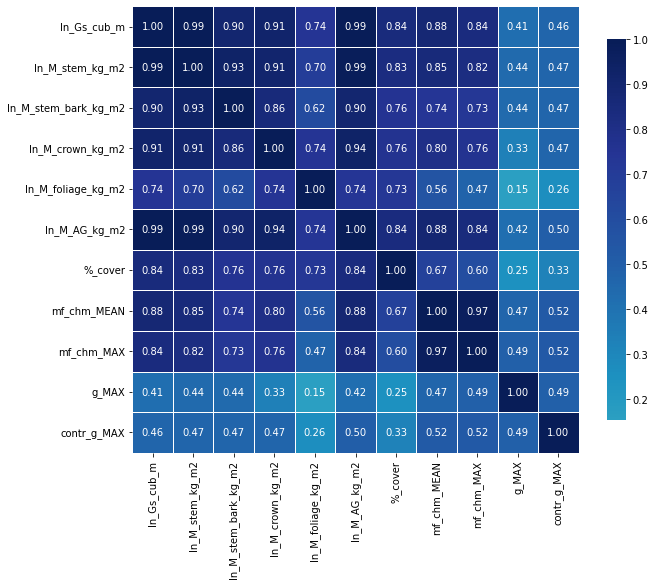

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [10]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
y = pd.DataFrame(select, columns= ['ln_M_stem_bark_kg_m2'])

In [11]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [12]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,0.85,12.233545,19.097736,243,2961.898193
1,1.00,14.964220,17.704655,248,2218.239746
2,1.00,15.329449,17.559893,240,2220.297119
3,0.97,15.392742,20.676994,244,3033.770752
4,1.00,17.944009,21.851387,243,3003.818848


In [13]:
# Columns in "y" data collections
y.head()

,ln_M_stem_bark_kg_m2
0,-0.3147
1,-0.2485
2,-0.1054
3,-0.0834
4,0.0000


# Create first XGBoost model for estimate varibiality of output stats

In [14]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [15]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [16]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [17]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.43878241050078326, 0.5884553964920209, 0.5809564100174076]
    Mean: 0.536
    Std: 0.069

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.37714772 0.68487936 0.50355836]
    Mean: 0.522
    Std: 0.126

 --------------------
Mean absolute error (MAE): 

    Scores: [0.43423106532987743, 0.24050125723213286, 0.3382158250537208]
    Mean: 0.338
    Std: 0.079

 --------------------


# Find optimal hyperparameters for XGBoost model

In [18]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [19]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.735 (std: 0.049)
Parameters: {'colsample_bytree': 0.7693307547782491, 'gamma': 0.3356266169778283, 'learning_rate': 0.08478629356985941, 'max_depth': 2, 'n_estimators': 76, 'subsample': 0.30404665028506594}



In [20]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.46762486, 0.29210534, 0.33366857, ..., 0.69683833, 0.40433683,
       1.56168213]), 'std_fit_time': array([0.02277451, 0.00251937, 0.00564323, ..., 0.09977905, 0.03929026,
       0.47597527]), 'mean_score_time': array([0.00607429, 0.00598783, 0.00598321, ..., 0.00920401, 0.01350508,
       0.01353316]), 'std_score_time': array([9.20264337e-05, 8.85767089e-05, 6.83042557e-05, ...,
       1.06801143e-03, 5.13294720e-03, 4.48687361e-03]), 'param_colsample_bytree': masked_array(data=[0.7893017007308725, 0.48931072180955604,
                   0.8932351350096277, ..., 0.3940905219276798,
                   0.36246135306953364, 0.20309411353893764],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.16679738021218976, 0.23814673827859167,
                   0.47621638454746384, ..., 0.10055147680213555,
                   0.06909801756484008, 0.4195453452627911],
 

In [21]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7693307547782491
Gamma: 0.3356266169778283
Learning_rate: 0.08478629356985941
Max_depth: 2
N_estimators: 76
Subsample: 0.30404665028506594


# Estimation of a basic XGBoost model using Loops

In [22]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [23]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.16241	validation_1-rmse:0.80236
[1]	validation_0-rmse:1.10589	validation_1-rmse:0.74980
[2]	validation_0-rmse:1.05060	validation_1-rmse:0.69723
[3]	validation_0-rmse:0.98204	validation_1-rmse:0.63026


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.90740	validation_1-rmse:0.56061
[5]	validation_0-rmse:0.86839	validation_1-rmse:0.52252
[6]	validation_0-rmse:0.80843	validation_1-rmse:0.46426
[7]	validation_0-rmse:0.79049	validation_1-rmse:0.44307
[8]	validation_0-rmse:0.74563	validation_1-rmse:0.41952
[9]	validation_0-rmse:0.69504	validation_1-rmse:0.38860
[10]	validation_0-rmse:0.67575	validation_1-rmse:0.37061
[11]	validation_0-rmse:0.64312	validation_1-rmse:0.34816
[12]	validation_0-rmse:0.61791	validation_1-rmse:0.33460
[13]	validation_0-rmse:0.60594	validation_1-rmse:0.31910
[14]	validation_0-rmse:0.58830	validation_1-rmse:0.31312
[15]	validation_0-rmse:0.58292	validation_1-rmse:0.31483
[16]	validation_0-rmse:0.56642	validation_1-rmse:0.30929
[17]	validation_0-rmse:0.55406	validation_1-rmse:0.30192
[18]	validation_0-rmse:0.53953	validation_1-rmse:0.29774
[19]	validation_0-rmse:0.53554	validation_1-rmse:0.29757
[20]	validation_0-rmse:0.52323	validation_1-rmse:0.29342
[21]	validation_0-rmse:0.51133	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.95319	validation_1-rmse:0.85556
[4]	validation_0-rmse:0.90038	validation_1-rmse:0.81338
[5]	validation_0-rmse:0.87753	validation_1-rmse:0.79322
[6]	validation_0-rmse:0.84606	validation_1-rmse:0.76562
[7]	validation_0-rmse:0.81367	validation_1-rmse:0.75027
[8]	validation_0-rmse:0.78527	validation_1-rmse:0.72890
[9]	validation_0-rmse:0.76110	validation_1-rmse:0.71381
[10]	validation_0-rmse:0.72947	validation_1-rmse:0.69026
[11]	validation_0-rmse:0.69955	validation_1-rmse:0.67227
[12]	validation_0-rmse:0.67954	validation_1-rmse:0.65855
[13]	validation_0-rmse:0.64709	validation_1-rmse:0.64882
[14]	validation_0-rmse:0.61999	validation_1-rmse:0.64026
[15]	validation_0-rmse:0.59592	validation_1-rmse:0.62726
[16]	validation_0-rmse:0.57151	validation_1-rmse:0.61535
[17]	validation_0-rmse:0.54483	validation_1-rmse:0.60075
[18]	validation_0-rmse:0.52376	validation_1-rmse:0.58395
[19]	validation_0-rmse:0.51566	validation_1-rmse:0.57329
[20]	validation_0-rmse:0.50823	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.59132	validation_1-rmse:0.97866
[13]	validation_0-rmse:0.57662	validation_1-rmse:0.95901
[14]	validation_0-rmse:0.55527	validation_1-rmse:0.91620
[15]	validation_0-rmse:0.54368	validation_1-rmse:0.90130
[16]	validation_0-rmse:0.53496	validation_1-rmse:0.88699
[17]	validation_0-rmse:0.50843	validation_1-rmse:0.85855
[18]	validation_0-rmse:0.49701	validation_1-rmse:0.84459
[19]	validation_0-rmse:0.48138	validation_1-rmse:0.82218
[20]	validation_0-rmse:0.47419	validation_1-rmse:0.81561
[21]	validation_0-rmse:0.46867	validation_1-rmse:0.80943
[22]	validation_0-rmse:0.46521	validation_1-rmse:0.80365
[23]	validation_0-rmse:0.45297	validation_1-rmse:0.77979
[24]	validation_0-rmse:0.44968	validation_1-rmse:0.77529
[25]	validation_0-rmse:0.44132	validation_1-rmse:0.77697
[26]	validation_0-rmse:0.42912	validation_1-rmse:0.76611
[27]	validation_0-rmse:0.42704	validation_1-rmse:0.76170
[28]	validation_0-rmse:0.41974	validation_1-rmse:0.74503
[29]	validation_0-rmse:0.41469	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.59288	validation_1-rmse:0.26130
[18]	validation_0-rmse:0.58668	validation_1-rmse:0.26275
[19]	validation_0-rmse:0.57585	validation_1-rmse:0.26103
[20]	validation_0-rmse:0.56649	validation_1-rmse:0.26057
[21]	validation_0-rmse:0.54849	validation_1-rmse:0.26125
[22]	validation_0-rmse:0.53672	validation_1-rmse:0.26276
[23]	validation_0-rmse:0.51956	validation_1-rmse:0.26579
[24]	validation_0-rmse:0.50132	validation_1-rmse:0.26840
[25]	validation_0-rmse:0.49349	validation_1-rmse:0.26879
[26]	validation_0-rmse:0.48510	validation_1-rmse:0.26559
[27]	validation_0-rmse:0.47717	validation_1-rmse:0.26786
[28]	validation_0-rmse:0.47128	validation_1-rmse:0.26932
[29]	validation_0-rmse:0.46695	validation_1-rmse:0.26553
[30]	validation_0-rmse:0.45597	validation_1-rmse:0.26592
[31]	validation_0-rmse:0.45233	validation_1-rmse:0.26752
[32]	validation_0-rmse:0.44839	validation_1-rmse:0.27161
[33]	validation_0-rmse:0.43863	validation_1-rmse:0.27198
[34]	validation_0-rmse:0.42742	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.67331	validation_1-rmse:0.74394
[11]	validation_0-rmse:0.66028	validation_1-rmse:0.73973
[12]	validation_0-rmse:0.64048	validation_1-rmse:0.72567
[13]	validation_0-rmse:0.61338	validation_1-rmse:0.70472
[14]	validation_0-rmse:0.59817	validation_1-rmse:0.70040
[15]	validation_0-rmse:0.57649	validation_1-rmse:0.67964
[16]	validation_0-rmse:0.57150	validation_1-rmse:0.67904
[17]	validation_0-rmse:0.55407	validation_1-rmse:0.66637
[18]	validation_0-rmse:0.53035	validation_1-rmse:0.64103
[19]	validation_0-rmse:0.52136	validation_1-rmse:0.63379
[20]	validation_0-rmse:0.50946	validation_1-rmse:0.63761
[21]	validation_0-rmse:0.49418	validation_1-rmse:0.61981
[22]	validation_0-rmse:0.48487	validation_1-rmse:0.61181
[23]	validation_0-rmse:0.47050	validation_1-rmse:0.60039
[24]	validation_0-rmse:0.46047	validation_1-rmse:0.59082
[25]	validation_0-rmse:0.44338	validation_1-rmse:0.57696
[26]	validation_0-rmse:0.42159	validation_1-rmse:0.56111
[27]	validation_0-rmse:0.41838	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.55952	validation_1-rmse:0.64791
[18]	validation_0-rmse:0.55313	validation_1-rmse:0.64164
[19]	validation_0-rmse:0.53210	validation_1-rmse:0.61723
[20]	validation_0-rmse:0.51237	validation_1-rmse:0.59625
[21]	validation_0-rmse:0.49326	validation_1-rmse:0.57334
[22]	validation_0-rmse:0.48028	validation_1-rmse:0.56797
[23]	validation_0-rmse:0.47927	validation_1-rmse:0.56619
[24]	validation_0-rmse:0.46810	validation_1-rmse:0.56341
[25]	validation_0-rmse:0.46368	validation_1-rmse:0.54379
[26]	validation_0-rmse:0.46296	validation_1-rmse:0.54243
[27]	validation_0-rmse:0.44706	validation_1-rmse:0.53767
[28]	validation_0-rmse:0.44584	validation_1-rmse:0.53588
[29]	validation_0-rmse:0.43295	validation_1-rmse:0.52593
[30]	validation_0-rmse:0.43248	validation_1-rmse:0.52495
[31]	validation_0-rmse:0.43274	validation_1-rmse:0.52549
[32]	validation_0-rmse:0.43164	validation_1-rmse:0.52306
[33]	validation_0-rmse:0.42783	validation_1-rmse:0.51938
[34]	validation_0-rmse:0.41943	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.61349	validation_1-rmse:0.57870
[17]	validation_0-rmse:0.58367	validation_1-rmse:0.55386
[18]	validation_0-rmse:0.57204	validation_1-rmse:0.53715
[19]	validation_0-rmse:0.56554	validation_1-rmse:0.53050
[20]	validation_0-rmse:0.55811	validation_1-rmse:0.52478
[21]	validation_0-rmse:0.53496	validation_1-rmse:0.51023
[22]	validation_0-rmse:0.53183	validation_1-rmse:0.51110
[23]	validation_0-rmse:0.50891	validation_1-rmse:0.48493
[24]	validation_0-rmse:0.49605	validation_1-rmse:0.47700
[25]	validation_0-rmse:0.48264	validation_1-rmse:0.47178
[26]	validation_0-rmse:0.47378	validation_1-rmse:0.46972
[27]	validation_0-rmse:0.45755	validation_1-rmse:0.45885
[28]	validation_0-rmse:0.45643	validation_1-rmse:0.45923
[29]	validation_0-rmse:0.45022	validation_1-rmse:0.44609
[30]	validation_0-rmse:0.44515	validation_1-rmse:0.44108
[31]	validation_0-rmse:0.44184	validation_1-rmse:0.43898
[32]	validation_0-rmse:0.43852	validation_1-rmse:0.44167
[33]	validation_0-rmse:0.42850	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.55181	validation_1-rmse:0.38316
[20]	validation_0-rmse:0.53662	validation_1-rmse:0.39222
[21]	validation_0-rmse:0.53210	validation_1-rmse:0.38917
[22]	validation_0-rmse:0.52771	validation_1-rmse:0.39106
[23]	validation_0-rmse:0.51182	validation_1-rmse:0.39218
[24]	validation_0-rmse:0.50302	validation_1-rmse:0.39252
[25]	validation_0-rmse:0.49727	validation_1-rmse:0.39308
[26]	validation_0-rmse:0.48232	validation_1-rmse:0.39332
[27]	validation_0-rmse:0.48112	validation_1-rmse:0.39439
[28]	validation_0-rmse:0.47016	validation_1-rmse:0.39155
[29]	validation_0-rmse:0.46445	validation_1-rmse:0.39197
[30]	validation_0-rmse:0.45099	validation_1-rmse:0.39388
[31]	validation_0-rmse:0.43928	validation_1-rmse:0.39424
[32]	validation_0-rmse:0.42877	validation_1-rmse:0.40884
[33]	validation_0-rmse:0.42021	validation_1-rmse:0.40650
[34]	validation_0-rmse:0.41718	validation_1-rmse:0.40516
[35]	validation_0-rmse:0.41063	validation_1-rmse:0.40433
[36]	validation_0-rmse:0.40795	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.52609	validation_1-rmse:0.55376
[20]	validation_0-rmse:0.50844	validation_1-rmse:0.54800
[21]	validation_0-rmse:0.50226	validation_1-rmse:0.54265
[22]	validation_0-rmse:0.48926	validation_1-rmse:0.54176
[23]	validation_0-rmse:0.47458	validation_1-rmse:0.54033
[24]	validation_0-rmse:0.47231	validation_1-rmse:0.53937
[25]	validation_0-rmse:0.46019	validation_1-rmse:0.53575
[26]	validation_0-rmse:0.45563	validation_1-rmse:0.52966
[27]	validation_0-rmse:0.45302	validation_1-rmse:0.52721
[28]	validation_0-rmse:0.44683	validation_1-rmse:0.52700
[29]	validation_0-rmse:0.42946	validation_1-rmse:0.52622
[30]	validation_0-rmse:0.42912	validation_1-rmse:0.52604
[31]	validation_0-rmse:0.41717	validation_1-rmse:0.52531
[32]	validation_0-rmse:0.41387	validation_1-rmse:0.52475
[33]	validation_0-rmse:0.41006	validation_1-rmse:0.52470
[34]	validation_0-rmse:0.40937	validation_1-rmse:0.52615
[35]	validation_0-rmse:0.40396	validation_1-rmse:0.52571
[36]	validation_0-rmse:0.38741	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.91379	validation_1-rmse:0.86016
[4]	validation_0-rmse:0.86112	validation_1-rmse:0.78831
[5]	validation_0-rmse:0.84151	validation_1-rmse:0.76142
[6]	validation_0-rmse:0.82303	validation_1-rmse:0.73738
[7]	validation_0-rmse:0.79907	validation_1-rmse:0.70964
[8]	validation_0-rmse:0.76676	validation_1-rmse:0.66859
[9]	validation_0-rmse:0.75489	validation_1-rmse:0.65728
[10]	validation_0-rmse:0.72280	validation_1-rmse:0.62174
[11]	validation_0-rmse:0.70851	validation_1-rmse:0.60265
[12]	validation_0-rmse:0.68813	validation_1-rmse:0.58341
[13]	validation_0-rmse:0.65907	validation_1-rmse:0.56818
[14]	validation_0-rmse:0.62613	validation_1-rmse:0.55612
[15]	validation_0-rmse:0.59090	validation_1-rmse:0.54427
[16]	validation_0-rmse:0.56760	validation_1-rmse:0.53616
[17]	validation_0-rmse:0.54303	validation_1-rmse:0.50663
[18]	validation_0-rmse:0.53052	validation_1-rmse:0.50348
[19]	validation_0-rmse:0.50856	validation_1-rmse:0.49763
[20]	validation_0-rmse:0.49599	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.62285	validation_1-rmse:0.71465
[13]	validation_0-rmse:0.59661	validation_1-rmse:0.69390
[14]	validation_0-rmse:0.58999	validation_1-rmse:0.68836
[15]	validation_0-rmse:0.56211	validation_1-rmse:0.64818
[16]	validation_0-rmse:0.54146	validation_1-rmse:0.62047
[17]	validation_0-rmse:0.53020	validation_1-rmse:0.60740
[18]	validation_0-rmse:0.51427	validation_1-rmse:0.58978
[19]	validation_0-rmse:0.49604	validation_1-rmse:0.57783
[20]	validation_0-rmse:0.48456	validation_1-rmse:0.56957
[21]	validation_0-rmse:0.46588	validation_1-rmse:0.55121
[22]	validation_0-rmse:0.45770	validation_1-rmse:0.54728
[23]	validation_0-rmse:0.45087	validation_1-rmse:0.54326
[24]	validation_0-rmse:0.44487	validation_1-rmse:0.54257
[25]	validation_0-rmse:0.43446	validation_1-rmse:0.54016
[26]	validation_0-rmse:0.42938	validation_1-rmse:0.53480
[27]	validation_0-rmse:0.42652	validation_1-rmse:0.53348
[28]	validation_0-rmse:0.41494	validation_1-rmse:0.53238
[29]	validation_0-rmse:0.41052	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.52061	validation_1-rmse:0.96248
[17]	validation_0-rmse:0.49114	validation_1-rmse:0.92026
[18]	validation_0-rmse:0.47753	validation_1-rmse:0.89752
[19]	validation_0-rmse:0.47357	validation_1-rmse:0.88851
[20]	validation_0-rmse:0.47112	validation_1-rmse:0.88638
[21]	validation_0-rmse:0.46895	validation_1-rmse:0.88349
[22]	validation_0-rmse:0.46321	validation_1-rmse:0.87310
[23]	validation_0-rmse:0.45348	validation_1-rmse:0.86165
[24]	validation_0-rmse:0.44191	validation_1-rmse:0.84107
[25]	validation_0-rmse:0.42370	validation_1-rmse:0.81185
[26]	validation_0-rmse:0.40708	validation_1-rmse:0.79376
[27]	validation_0-rmse:0.40060	validation_1-rmse:0.78628
[28]	validation_0-rmse:0.39883	validation_1-rmse:0.78301
[29]	validation_0-rmse:0.39753	validation_1-rmse:0.78091
[30]	validation_0-rmse:0.38977	validation_1-rmse:0.77798
[31]	validation_0-rmse:0.38088	validation_1-rmse:0.77493
[32]	validation_0-rmse:0.37309	validation_1-rmse:0.76267
[33]	validation_0-rmse:0.36675	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.99733	validation_1-rmse:0.84306
[3]	validation_0-rmse:0.96129	validation_1-rmse:0.80596
[4]	validation_0-rmse:0.89887	validation_1-rmse:0.74389
[5]	validation_0-rmse:0.86045	validation_1-rmse:0.71412
[6]	validation_0-rmse:0.82182	validation_1-rmse:0.67799
[7]	validation_0-rmse:0.79659	validation_1-rmse:0.65470
[8]	validation_0-rmse:0.74915	validation_1-rmse:0.59734
[9]	validation_0-rmse:0.72223	validation_1-rmse:0.58103
[10]	validation_0-rmse:0.69231	validation_1-rmse:0.55439
[11]	validation_0-rmse:0.67706	validation_1-rmse:0.54115
[12]	validation_0-rmse:0.65319	validation_1-rmse:0.52201
[13]	validation_0-rmse:0.63247	validation_1-rmse:0.50701
[14]	validation_0-rmse:0.60129	validation_1-rmse:0.50224
[15]	validation_0-rmse:0.57252	validation_1-rmse:0.47876
[16]	validation_0-rmse:0.55455	validation_1-rmse:0.47648
[17]	validation_0-rmse:0.52927	validation_1-rmse:0.47153
[18]	validation_0-rmse:0.51210	validation_1-rmse:0.47207
[19]	validation_0-rmse:0.49191	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.61746	validation_1-rmse:0.30055
[17]	validation_0-rmse:0.59963	validation_1-rmse:0.27593
[18]	validation_0-rmse:0.57028	validation_1-rmse:0.27067
[19]	validation_0-rmse:0.55374	validation_1-rmse:0.27364
[20]	validation_0-rmse:0.53499	validation_1-rmse:0.28567
[21]	validation_0-rmse:0.51720	validation_1-rmse:0.27825
[22]	validation_0-rmse:0.52041	validation_1-rmse:0.28762
[23]	validation_0-rmse:0.50336	validation_1-rmse:0.27779
[24]	validation_0-rmse:0.48503	validation_1-rmse:0.26984
[25]	validation_0-rmse:0.47498	validation_1-rmse:0.26837
[26]	validation_0-rmse:0.46791	validation_1-rmse:0.27370
[27]	validation_0-rmse:0.46565	validation_1-rmse:0.27433
[28]	validation_0-rmse:0.45283	validation_1-rmse:0.27159
[29]	validation_0-rmse:0.43928	validation_1-rmse:0.26829
[30]	validation_0-rmse:0.43393	validation_1-rmse:0.26886
[31]	validation_0-rmse:0.43246	validation_1-rmse:0.26918
[32]	validation_0-rmse:0.42822	validation_1-rmse:0.26936
[33]	validation_0-rmse:0.41915	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.59081	validation_1-rmse:0.76358
[16]	validation_0-rmse:0.57672	validation_1-rmse:0.75307
[17]	validation_0-rmse:0.56358	validation_1-rmse:0.73651
[18]	validation_0-rmse:0.54222	validation_1-rmse:0.71816
[19]	validation_0-rmse:0.53684	validation_1-rmse:0.71182
[20]	validation_0-rmse:0.52842	validation_1-rmse:0.70276
[21]	validation_0-rmse:0.52855	validation_1-rmse:0.70288
[22]	validation_0-rmse:0.52715	validation_1-rmse:0.69931
[23]	validation_0-rmse:0.52232	validation_1-rmse:0.69098
[24]	validation_0-rmse:0.51940	validation_1-rmse:0.68344
[25]	validation_0-rmse:0.51282	validation_1-rmse:0.67952
[26]	validation_0-rmse:0.48634	validation_1-rmse:0.65969
[27]	validation_0-rmse:0.48651	validation_1-rmse:0.65985
[28]	validation_0-rmse:0.48279	validation_1-rmse:0.65547
[29]	validation_0-rmse:0.47092	validation_1-rmse:0.65650
[30]	validation_0-rmse:0.46717	validation_1-rmse:0.64847
[31]	validation_0-rmse:0.45911	validation_1-rmse:0.64329
[32]	validation_0-rmse:0.45529	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.94164	validation_1-rmse:0.94238
[4]	validation_0-rmse:0.88162	validation_1-rmse:0.87592
[5]	validation_0-rmse:0.85487	validation_1-rmse:0.82833
[6]	validation_0-rmse:0.80449	validation_1-rmse:0.77017
[7]	validation_0-rmse:0.75333	validation_1-rmse:0.75198
[8]	validation_0-rmse:0.71798	validation_1-rmse:0.72109
[9]	validation_0-rmse:0.68647	validation_1-rmse:0.69581
[10]	validation_0-rmse:0.67095	validation_1-rmse:0.68527
[11]	validation_0-rmse:0.65269	validation_1-rmse:0.66928
[12]	validation_0-rmse:0.63097	validation_1-rmse:0.65553
[13]	validation_0-rmse:0.59728	validation_1-rmse:0.64211
[14]	validation_0-rmse:0.58733	validation_1-rmse:0.62917
[15]	validation_0-rmse:0.55419	validation_1-rmse:0.61218
[16]	validation_0-rmse:0.54344	validation_1-rmse:0.60923
[17]	validation_0-rmse:0.52208	validation_1-rmse:0.60068
[18]	validation_0-rmse:0.50712	validation_1-rmse:0.58747
[19]	validation_0-rmse:0.50096	validation_1-rmse:0.58504
[20]	validation_0-rmse:0.49689	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.58645	validation_1-rmse:1.05179
[14]	validation_0-rmse:0.57909	validation_1-rmse:1.04406
[15]	validation_0-rmse:0.57293	validation_1-rmse:1.03713
[16]	validation_0-rmse:0.54598	validation_1-rmse:1.00243
[17]	validation_0-rmse:0.53136	validation_1-rmse:0.98233
[18]	validation_0-rmse:0.52655	validation_1-rmse:0.97664
[19]	validation_0-rmse:0.50586	validation_1-rmse:0.93653
[20]	validation_0-rmse:0.49685	validation_1-rmse:0.93613
[21]	validation_0-rmse:0.49433	validation_1-rmse:0.93291
[22]	validation_0-rmse:0.49136	validation_1-rmse:0.92897
[23]	validation_0-rmse:0.47301	validation_1-rmse:0.90149
[24]	validation_0-rmse:0.46060	validation_1-rmse:0.87503
[25]	validation_0-rmse:0.45564	validation_1-rmse:0.86916
[26]	validation_0-rmse:0.44446	validation_1-rmse:0.85331
[27]	validation_0-rmse:0.43776	validation_1-rmse:0.84336
[28]	validation_0-rmse:0.43126	validation_1-rmse:0.83194
[29]	validation_0-rmse:0.41774	validation_1-rmse:0.81219
[30]	validation_0-rmse:0.41884	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.60401	validation_1-rmse:0.85462
[14]	validation_0-rmse:0.59082	validation_1-rmse:0.84160
[15]	validation_0-rmse:0.57058	validation_1-rmse:0.82257
[16]	validation_0-rmse:0.55354	validation_1-rmse:0.79982
[17]	validation_0-rmse:0.54173	validation_1-rmse:0.77921
[18]	validation_0-rmse:0.53767	validation_1-rmse:0.77563
[19]	validation_0-rmse:0.52741	validation_1-rmse:0.77275
[20]	validation_0-rmse:0.50781	validation_1-rmse:0.77018
[21]	validation_0-rmse:0.50777	validation_1-rmse:0.77015
[22]	validation_0-rmse:0.49460	validation_1-rmse:0.75444
[23]	validation_0-rmse:0.48315	validation_1-rmse:0.73752
[24]	validation_0-rmse:0.47772	validation_1-rmse:0.73347
[25]	validation_0-rmse:0.47347	validation_1-rmse:0.73111
[26]	validation_0-rmse:0.47083	validation_1-rmse:0.72929
[27]	validation_0-rmse:0.46871	validation_1-rmse:0.72507
[28]	validation_0-rmse:0.44883	validation_1-rmse:0.70582
[29]	validation_0-rmse:0.44665	validation_1-rmse:0.70402
[30]	validation_0-rmse:0.44562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.65650	validation_1-rmse:0.38961
[14]	validation_0-rmse:0.63758	validation_1-rmse:0.35415
[15]	validation_0-rmse:0.62553	validation_1-rmse:0.33330
[16]	validation_0-rmse:0.60532	validation_1-rmse:0.32066
[17]	validation_0-rmse:0.58676	validation_1-rmse:0.31369
[18]	validation_0-rmse:0.58418	validation_1-rmse:0.31035
[19]	validation_0-rmse:0.57075	validation_1-rmse:0.30699
[20]	validation_0-rmse:0.55817	validation_1-rmse:0.30032
[21]	validation_0-rmse:0.55162	validation_1-rmse:0.29539
[22]	validation_0-rmse:0.53477	validation_1-rmse:0.28693
[23]	validation_0-rmse:0.53257	validation_1-rmse:0.28420
[24]	validation_0-rmse:0.52847	validation_1-rmse:0.27692
[25]	validation_0-rmse:0.51512	validation_1-rmse:0.27205
[26]	validation_0-rmse:0.50905	validation_1-rmse:0.26308
[27]	validation_0-rmse:0.50504	validation_1-rmse:0.26254
[28]	validation_0-rmse:0.48824	validation_1-rmse:0.25929
[29]	validation_0-rmse:0.47101	validation_1-rmse:0.26679
[30]	validation_0-rmse:0.46588	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.59595	validation_1-rmse:0.74280
[15]	validation_0-rmse:0.58305	validation_1-rmse:0.73011
[16]	validation_0-rmse:0.57069	validation_1-rmse:0.71817
[17]	validation_0-rmse:0.56581	validation_1-rmse:0.71392
[18]	validation_0-rmse:0.56208	validation_1-rmse:0.71076
[19]	validation_0-rmse:0.55012	validation_1-rmse:0.69878
[20]	validation_0-rmse:0.53207	validation_1-rmse:0.69091
[21]	validation_0-rmse:0.52870	validation_1-rmse:0.68274
[22]	validation_0-rmse:0.50984	validation_1-rmse:0.66937
[23]	validation_0-rmse:0.50972	validation_1-rmse:0.66929
[24]	validation_0-rmse:0.50102	validation_1-rmse:0.66800
[25]	validation_0-rmse:0.49269	validation_1-rmse:0.66677
[26]	validation_0-rmse:0.48865	validation_1-rmse:0.66503
[27]	validation_0-rmse:0.48421	validation_1-rmse:0.66508
[28]	validation_0-rmse:0.46907	validation_1-rmse:0.64957
[29]	validation_0-rmse:0.45824	validation_1-rmse:0.63588
[30]	validation_0-rmse:0.44780	validation_1-rmse:0.63610
[31]	validation_0-rmse:0.44440	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.65026	validation_1-rmse:0.41507
[14]	validation_0-rmse:0.63326	validation_1-rmse:0.41601
[15]	validation_0-rmse:0.59893	validation_1-rmse:0.41685
[16]	validation_0-rmse:0.58568	validation_1-rmse:0.41699
[17]	validation_0-rmse:0.56178	validation_1-rmse:0.41450
[18]	validation_0-rmse:0.54762	validation_1-rmse:0.41184
[19]	validation_0-rmse:0.53971	validation_1-rmse:0.41616
[20]	validation_0-rmse:0.53091	validation_1-rmse:0.42341
[21]	validation_0-rmse:0.51295	validation_1-rmse:0.42490
[22]	validation_0-rmse:0.49834	validation_1-rmse:0.42559
[23]	validation_0-rmse:0.48516	validation_1-rmse:0.42646
[24]	validation_0-rmse:0.47330	validation_1-rmse:0.42852
[25]	validation_0-rmse:0.46997	validation_1-rmse:0.42979
[26]	validation_0-rmse:0.46378	validation_1-rmse:0.43780
[27]	validation_0-rmse:0.46220	validation_1-rmse:0.43904
[28]	validation_0-rmse:0.44846	validation_1-rmse:0.44734
[29]	validation_0-rmse:0.44025	validation_1-rmse:0.44683
[30]	validation_0-rmse:0.43703	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.54234	validation_1-rmse:0.44129
[18]	validation_0-rmse:0.53033	validation_1-rmse:0.42960
[19]	validation_0-rmse:0.51644	validation_1-rmse:0.42285
[20]	validation_0-rmse:0.49721	validation_1-rmse:0.40926
[21]	validation_0-rmse:0.49283	validation_1-rmse:0.40690
[22]	validation_0-rmse:0.49035	validation_1-rmse:0.40797
[23]	validation_0-rmse:0.47574	validation_1-rmse:0.39470
[24]	validation_0-rmse:0.46827	validation_1-rmse:0.39105
[25]	validation_0-rmse:0.46469	validation_1-rmse:0.38936
[26]	validation_0-rmse:0.46435	validation_1-rmse:0.38882
[27]	validation_0-rmse:0.45422	validation_1-rmse:0.38003
[28]	validation_0-rmse:0.44232	validation_1-rmse:0.37465
[29]	validation_0-rmse:0.44216	validation_1-rmse:0.37391
[30]	validation_0-rmse:0.43891	validation_1-rmse:0.38021
[31]	validation_0-rmse:0.44021	validation_1-rmse:0.38214
[32]	validation_0-rmse:0.42873	validation_1-rmse:0.37815
[33]	validation_0-rmse:0.42247	validation_1-rmse:0.37864
[34]	validation_0-rmse:0.41545	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.64049	validation_1-rmse:0.58290
[16]	validation_0-rmse:0.62399	validation_1-rmse:0.56345
[17]	validation_0-rmse:0.61042	validation_1-rmse:0.55134
[18]	validation_0-rmse:0.59164	validation_1-rmse:0.52604
[19]	validation_0-rmse:0.57516	validation_1-rmse:0.52262
[20]	validation_0-rmse:0.55442	validation_1-rmse:0.49245
[21]	validation_0-rmse:0.53581	validation_1-rmse:0.46725
[22]	validation_0-rmse:0.52923	validation_1-rmse:0.45051
[23]	validation_0-rmse:0.52468	validation_1-rmse:0.44510
[24]	validation_0-rmse:0.52122	validation_1-rmse:0.44183
[25]	validation_0-rmse:0.51529	validation_1-rmse:0.44212
[26]	validation_0-rmse:0.50872	validation_1-rmse:0.43796
[27]	validation_0-rmse:0.49116	validation_1-rmse:0.41455
[28]	validation_0-rmse:0.48338	validation_1-rmse:0.40511
[29]	validation_0-rmse:0.47022	validation_1-rmse:0.38665
[30]	validation_0-rmse:0.47054	validation_1-rmse:0.38739
[31]	validation_0-rmse:0.46501	validation_1-rmse:0.38819
[32]	validation_0-rmse:0.46135	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.84534	validation_1-rmse:0.65306
[8]	validation_0-rmse:0.80679	validation_1-rmse:0.62598
[9]	validation_0-rmse:0.77383	validation_1-rmse:0.59657
[10]	validation_0-rmse:0.73836	validation_1-rmse:0.57695
[11]	validation_0-rmse:0.70597	validation_1-rmse:0.54890
[12]	validation_0-rmse:0.67890	validation_1-rmse:0.53680
[13]	validation_0-rmse:0.65079	validation_1-rmse:0.52667
[14]	validation_0-rmse:0.61688	validation_1-rmse:0.51676
[15]	validation_0-rmse:0.59512	validation_1-rmse:0.50782
[16]	validation_0-rmse:0.58976	validation_1-rmse:0.50332
[17]	validation_0-rmse:0.58060	validation_1-rmse:0.50130
[18]	validation_0-rmse:0.55854	validation_1-rmse:0.49284
[19]	validation_0-rmse:0.55343	validation_1-rmse:0.49092
[20]	validation_0-rmse:0.54414	validation_1-rmse:0.48670
[21]	validation_0-rmse:0.52464	validation_1-rmse:0.48350
[22]	validation_0-rmse:0.51465	validation_1-rmse:0.48403
[23]	validation_0-rmse:0.49093	validation_1-rmse:0.48374
[24]	validation_0-rmse:0.48826	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.57488	validation_1-rmse:0.63934
[16]	validation_0-rmse:0.56441	validation_1-rmse:0.63348
[17]	validation_0-rmse:0.54886	validation_1-rmse:0.61283
[18]	validation_0-rmse:0.53715	validation_1-rmse:0.58974
[19]	validation_0-rmse:0.53171	validation_1-rmse:0.58430
[20]	validation_0-rmse:0.52749	validation_1-rmse:0.58135
[21]	validation_0-rmse:0.51479	validation_1-rmse:0.57999
[22]	validation_0-rmse:0.51096	validation_1-rmse:0.57602
[23]	validation_0-rmse:0.49918	validation_1-rmse:0.56236
[24]	validation_0-rmse:0.47992	validation_1-rmse:0.53875
[25]	validation_0-rmse:0.46673	validation_1-rmse:0.52460
[26]	validation_0-rmse:0.46014	validation_1-rmse:0.51608
[27]	validation_0-rmse:0.45474	validation_1-rmse:0.50254
[28]	validation_0-rmse:0.45159	validation_1-rmse:0.50165
[29]	validation_0-rmse:0.45023	validation_1-rmse:0.50081
[30]	validation_0-rmse:0.43571	validation_1-rmse:0.48738
[31]	validation_0-rmse:0.43435	validation_1-rmse:0.48063
[32]	validation_0-rmse:0.43441	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.56686	validation_1-rmse:0.39530
[17]	validation_0-rmse:0.54510	validation_1-rmse:0.39071
[18]	validation_0-rmse:0.51966	validation_1-rmse:0.38999
[19]	validation_0-rmse:0.50879	validation_1-rmse:0.38759
[20]	validation_0-rmse:0.48948	validation_1-rmse:0.37895
[21]	validation_0-rmse:0.48567	validation_1-rmse:0.37728
[22]	validation_0-rmse:0.47496	validation_1-rmse:0.37577
[23]	validation_0-rmse:0.46731	validation_1-rmse:0.37769
[24]	validation_0-rmse:0.45064	validation_1-rmse:0.37787
[25]	validation_0-rmse:0.44005	validation_1-rmse:0.36928
[26]	validation_0-rmse:0.43442	validation_1-rmse:0.37041
[27]	validation_0-rmse:0.43318	validation_1-rmse:0.37076
[28]	validation_0-rmse:0.43598	validation_1-rmse:0.36945
[29]	validation_0-rmse:0.42918	validation_1-rmse:0.36003
[30]	validation_0-rmse:0.42760	validation_1-rmse:0.36057
[31]	validation_0-rmse:0.42269	validation_1-rmse:0.36085
[32]	validation_0-rmse:0.42095	validation_1-rmse:0.36150
[33]	validation_0-rmse:0.40709	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.53317	validation_1-rmse:0.82846
[16]	validation_0-rmse:0.51898	validation_1-rmse:0.81084
[17]	validation_0-rmse:0.50555	validation_1-rmse:0.79681
[18]	validation_0-rmse:0.49401	validation_1-rmse:0.78151
[19]	validation_0-rmse:0.48738	validation_1-rmse:0.77105
[20]	validation_0-rmse:0.47294	validation_1-rmse:0.75876
[21]	validation_0-rmse:0.46992	validation_1-rmse:0.75679
[22]	validation_0-rmse:0.46381	validation_1-rmse:0.74335
[23]	validation_0-rmse:0.45694	validation_1-rmse:0.73666
[24]	validation_0-rmse:0.44342	validation_1-rmse:0.69814
[25]	validation_0-rmse:0.43963	validation_1-rmse:0.69349
[26]	validation_0-rmse:0.43247	validation_1-rmse:0.68425
[27]	validation_0-rmse:0.43169	validation_1-rmse:0.68296
[28]	validation_0-rmse:0.42528	validation_1-rmse:0.67904
[29]	validation_0-rmse:0.41967	validation_1-rmse:0.67228
[30]	validation_0-rmse:0.41602	validation_1-rmse:0.66358
[31]	validation_0-rmse:0.41503	validation_1-rmse:0.65820
[32]	validation_0-rmse:0.40907	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.66251	validation_1-rmse:0.61085
[11]	validation_0-rmse:0.65518	validation_1-rmse:0.60156
[12]	validation_0-rmse:0.62562	validation_1-rmse:0.55612
[13]	validation_0-rmse:0.62094	validation_1-rmse:0.55024
[14]	validation_0-rmse:0.61538	validation_1-rmse:0.54564
[15]	validation_0-rmse:0.58969	validation_1-rmse:0.53624
[16]	validation_0-rmse:0.58415	validation_1-rmse:0.52926
[17]	validation_0-rmse:0.57762	validation_1-rmse:0.52268
[18]	validation_0-rmse:0.57277	validation_1-rmse:0.51653
[19]	validation_0-rmse:0.55062	validation_1-rmse:0.51075
[20]	validation_0-rmse:0.51962	validation_1-rmse:0.50137
[21]	validation_0-rmse:0.49816	validation_1-rmse:0.49813
[22]	validation_0-rmse:0.49733	validation_1-rmse:0.49706
[23]	validation_0-rmse:0.47792	validation_1-rmse:0.49643
[24]	validation_0-rmse:0.46671	validation_1-rmse:0.48801
[25]	validation_0-rmse:0.46366	validation_1-rmse:0.48545
[26]	validation_0-rmse:0.45887	validation_1-rmse:0.47535
[27]	validation_0-rmse:0.44033	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.55631	validation_1-rmse:0.57719
[18]	validation_0-rmse:0.52541	validation_1-rmse:0.54669
[19]	validation_0-rmse:0.52463	validation_1-rmse:0.54819
[20]	validation_0-rmse:0.50793	validation_1-rmse:0.52767
[21]	validation_0-rmse:0.49603	validation_1-rmse:0.50401
[22]	validation_0-rmse:0.49412	validation_1-rmse:0.50225
[23]	validation_0-rmse:0.47774	validation_1-rmse:0.47891
[24]	validation_0-rmse:0.46322	validation_1-rmse:0.46149
[25]	validation_0-rmse:0.45697	validation_1-rmse:0.45761
[26]	validation_0-rmse:0.45492	validation_1-rmse:0.45663
[27]	validation_0-rmse:0.45547	validation_1-rmse:0.45760
[28]	validation_0-rmse:0.43991	validation_1-rmse:0.43620
[29]	validation_0-rmse:0.42883	validation_1-rmse:0.42483
[30]	validation_0-rmse:0.42297	validation_1-rmse:0.42483
[31]	validation_0-rmse:0.41609	validation_1-rmse:0.42333
[32]	validation_0-rmse:0.41382	validation_1-rmse:0.41882
[33]	validation_0-rmse:0.40937	validation_1-rmse:0.42181
[34]	validation_0-rmse:0.40463	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.96725	validation_1-rmse:0.91841
[3]	validation_0-rmse:0.93455	validation_1-rmse:0.88486
[4]	validation_0-rmse:0.88937	validation_1-rmse:0.83570
[5]	validation_0-rmse:0.84985	validation_1-rmse:0.79658
[6]	validation_0-rmse:0.82816	validation_1-rmse:0.77359
[7]	validation_0-rmse:0.79919	validation_1-rmse:0.73002
[8]	validation_0-rmse:0.75524	validation_1-rmse:0.69210
[9]	validation_0-rmse:0.73323	validation_1-rmse:0.67333
[10]	validation_0-rmse:0.72527	validation_1-rmse:0.66340
[11]	validation_0-rmse:0.70160	validation_1-rmse:0.63758
[12]	validation_0-rmse:0.67069	validation_1-rmse:0.59797
[13]	validation_0-rmse:0.65265	validation_1-rmse:0.57989
[14]	validation_0-rmse:0.62809	validation_1-rmse:0.55550
[15]	validation_0-rmse:0.61697	validation_1-rmse:0.54481
[16]	validation_0-rmse:0.59604	validation_1-rmse:0.51682
[17]	validation_0-rmse:0.58211	validation_1-rmse:0.49412
[18]	validation_0-rmse:0.56582	validation_1-rmse:0.48545
[19]	validation_0-rmse:0.54515	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.56641	validation_1-rmse:0.86537
[14]	validation_0-rmse:0.55487	validation_1-rmse:0.84945
[15]	validation_0-rmse:0.53113	validation_1-rmse:0.82143
[16]	validation_0-rmse:0.52181	validation_1-rmse:0.81337
[17]	validation_0-rmse:0.50499	validation_1-rmse:0.79821
[18]	validation_0-rmse:0.49144	validation_1-rmse:0.77992
[19]	validation_0-rmse:0.47793	validation_1-rmse:0.75589
[20]	validation_0-rmse:0.46549	validation_1-rmse:0.73838
[21]	validation_0-rmse:0.45298	validation_1-rmse:0.72416
[22]	validation_0-rmse:0.45231	validation_1-rmse:0.72316
[23]	validation_0-rmse:0.43365	validation_1-rmse:0.70213
[24]	validation_0-rmse:0.42507	validation_1-rmse:0.69805
[25]	validation_0-rmse:0.41749	validation_1-rmse:0.68876
[26]	validation_0-rmse:0.41150	validation_1-rmse:0.68146
[27]	validation_0-rmse:0.40254	validation_1-rmse:0.67243
[28]	validation_0-rmse:0.40311	validation_1-rmse:0.67368
[29]	validation_0-rmse:0.40278	validation_1-rmse:0.67295
[30]	validation_0-rmse:0.40236	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.55910	validation_1-rmse:0.63121
[18]	validation_0-rmse:0.55228	validation_1-rmse:0.62505
[19]	validation_0-rmse:0.52450	validation_1-rmse:0.60244
[20]	validation_0-rmse:0.50383	validation_1-rmse:0.57475
[21]	validation_0-rmse:0.47746	validation_1-rmse:0.54752
[22]	validation_0-rmse:0.47006	validation_1-rmse:0.54038
[23]	validation_0-rmse:0.46825	validation_1-rmse:0.53807
[24]	validation_0-rmse:0.45315	validation_1-rmse:0.52495
[25]	validation_0-rmse:0.43945	validation_1-rmse:0.50805
[26]	validation_0-rmse:0.43785	validation_1-rmse:0.50609
[27]	validation_0-rmse:0.42533	validation_1-rmse:0.48555
[28]	validation_0-rmse:0.41537	validation_1-rmse:0.47335
[29]	validation_0-rmse:0.40611	validation_1-rmse:0.46644
[30]	validation_0-rmse:0.39323	validation_1-rmse:0.45947
[31]	validation_0-rmse:0.39107	validation_1-rmse:0.45893
[32]	validation_0-rmse:0.39050	validation_1-rmse:0.46052
[33]	validation_0-rmse:0.38774	validation_1-rmse:0.46457
[34]	validation_0-rmse:0.37910	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.60809	validation_1-rmse:0.35669
[15]	validation_0-rmse:0.59255	validation_1-rmse:0.35224
[16]	validation_0-rmse:0.57485	validation_1-rmse:0.34775
[17]	validation_0-rmse:0.55424	validation_1-rmse:0.34565
[18]	validation_0-rmse:0.53124	validation_1-rmse:0.34953
[19]	validation_0-rmse:0.53264	validation_1-rmse:0.35491
[20]	validation_0-rmse:0.52353	validation_1-rmse:0.35197
[21]	validation_0-rmse:0.50247	validation_1-rmse:0.35584
[22]	validation_0-rmse:0.48994	validation_1-rmse:0.36159
[23]	validation_0-rmse:0.47881	validation_1-rmse:0.35815
[24]	validation_0-rmse:0.46931	validation_1-rmse:0.34826
[25]	validation_0-rmse:0.45416	validation_1-rmse:0.35455
[26]	validation_0-rmse:0.44156	validation_1-rmse:0.36082
[27]	validation_0-rmse:0.44068	validation_1-rmse:0.36238
[28]	validation_0-rmse:0.43029	validation_1-rmse:0.36833
[29]	validation_0-rmse:0.42192	validation_1-rmse:0.37780
[30]	validation_0-rmse:0.42089	validation_1-rmse:0.38097
[31]	validation_0-rmse:0.41979	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.78655	validation_1-rmse:0.74922
[8]	validation_0-rmse:0.73732	validation_1-rmse:0.71581
[9]	validation_0-rmse:0.71733	validation_1-rmse:0.69690
[10]	validation_0-rmse:0.69834	validation_1-rmse:0.68635
[11]	validation_0-rmse:0.67133	validation_1-rmse:0.66620
[12]	validation_0-rmse:0.64592	validation_1-rmse:0.65301
[13]	validation_0-rmse:0.63697	validation_1-rmse:0.64691
[14]	validation_0-rmse:0.61736	validation_1-rmse:0.63274
[15]	validation_0-rmse:0.59148	validation_1-rmse:0.60620
[16]	validation_0-rmse:0.56842	validation_1-rmse:0.57863
[17]	validation_0-rmse:0.56038	validation_1-rmse:0.56014
[18]	validation_0-rmse:0.55603	validation_1-rmse:0.55359
[19]	validation_0-rmse:0.55304	validation_1-rmse:0.55176
[20]	validation_0-rmse:0.53565	validation_1-rmse:0.53470
[21]	validation_0-rmse:0.52711	validation_1-rmse:0.53319
[22]	validation_0-rmse:0.51997	validation_1-rmse:0.51325
[23]	validation_0-rmse:0.52168	validation_1-rmse:0.51416
[24]	validation_0-rmse:0.51312	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.59325	validation_1-rmse:0.71073
[15]	validation_0-rmse:0.58445	validation_1-rmse:0.70345
[16]	validation_0-rmse:0.55913	validation_1-rmse:0.67907
[17]	validation_0-rmse:0.54319	validation_1-rmse:0.66064
[18]	validation_0-rmse:0.53597	validation_1-rmse:0.65773
[19]	validation_0-rmse:0.52560	validation_1-rmse:0.65726
[20]	validation_0-rmse:0.51787	validation_1-rmse:0.65350
[21]	validation_0-rmse:0.49944	validation_1-rmse:0.63404
[22]	validation_0-rmse:0.49697	validation_1-rmse:0.63052
[23]	validation_0-rmse:0.48788	validation_1-rmse:0.62064
[24]	validation_0-rmse:0.46735	validation_1-rmse:0.60417
[25]	validation_0-rmse:0.45914	validation_1-rmse:0.59538
[26]	validation_0-rmse:0.45041	validation_1-rmse:0.59319
[27]	validation_0-rmse:0.44897	validation_1-rmse:0.59058
[28]	validation_0-rmse:0.44093	validation_1-rmse:0.57557
[29]	validation_0-rmse:0.43776	validation_1-rmse:0.57422
[30]	validation_0-rmse:0.43077	validation_1-rmse:0.57071
[31]	validation_0-rmse:0.41841	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.63675	validation_1-rmse:0.48671
[14]	validation_0-rmse:0.61638	validation_1-rmse:0.47707
[15]	validation_0-rmse:0.59834	validation_1-rmse:0.47247
[16]	validation_0-rmse:0.57223	validation_1-rmse:0.46633
[17]	validation_0-rmse:0.56613	validation_1-rmse:0.46146
[18]	validation_0-rmse:0.54539	validation_1-rmse:0.44762
[19]	validation_0-rmse:0.53299	validation_1-rmse:0.44615
[20]	validation_0-rmse:0.51735	validation_1-rmse:0.44503
[21]	validation_0-rmse:0.50943	validation_1-rmse:0.43996
[22]	validation_0-rmse:0.50117	validation_1-rmse:0.43969
[23]	validation_0-rmse:0.49388	validation_1-rmse:0.43763
[24]	validation_0-rmse:0.48820	validation_1-rmse:0.43807
[25]	validation_0-rmse:0.48557	validation_1-rmse:0.43665
[26]	validation_0-rmse:0.47995	validation_1-rmse:0.42611
[27]	validation_0-rmse:0.47395	validation_1-rmse:0.41633
[28]	validation_0-rmse:0.46369	validation_1-rmse:0.41932
[29]	validation_0-rmse:0.44546	validation_1-rmse:0.42740
[30]	validation_0-rmse:0.44303	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.60301	validation_1-rmse:0.65918
[16]	validation_0-rmse:0.58321	validation_1-rmse:0.64776
[17]	validation_0-rmse:0.57253	validation_1-rmse:0.62988
[18]	validation_0-rmse:0.55017	validation_1-rmse:0.60640
[19]	validation_0-rmse:0.54104	validation_1-rmse:0.58920
[20]	validation_0-rmse:0.52217	validation_1-rmse:0.57891
[21]	validation_0-rmse:0.51796	validation_1-rmse:0.57575
[22]	validation_0-rmse:0.50633	validation_1-rmse:0.57087
[23]	validation_0-rmse:0.48903	validation_1-rmse:0.56723
[24]	validation_0-rmse:0.47921	validation_1-rmse:0.56432
[25]	validation_0-rmse:0.47812	validation_1-rmse:0.56302
[26]	validation_0-rmse:0.47297	validation_1-rmse:0.56151
[27]	validation_0-rmse:0.46420	validation_1-rmse:0.56306
[28]	validation_0-rmse:0.45623	validation_1-rmse:0.55806
[29]	validation_0-rmse:0.44034	validation_1-rmse:0.55986
[30]	validation_0-rmse:0.43944	validation_1-rmse:0.55870
[31]	validation_0-rmse:0.43897	validation_1-rmse:0.55807
[32]	validation_0-rmse:0.43841	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.57620	validation_1-rmse:0.49678
[16]	validation_0-rmse:0.55579	validation_1-rmse:0.47927
[17]	validation_0-rmse:0.54801	validation_1-rmse:0.47583
[18]	validation_0-rmse:0.54525	validation_1-rmse:0.47391
[19]	validation_0-rmse:0.52798	validation_1-rmse:0.44973
[20]	validation_0-rmse:0.50992	validation_1-rmse:0.43788
[21]	validation_0-rmse:0.49279	validation_1-rmse:0.41750
[22]	validation_0-rmse:0.48352	validation_1-rmse:0.40415
[23]	validation_0-rmse:0.48358	validation_1-rmse:0.40418
[24]	validation_0-rmse:0.47357	validation_1-rmse:0.38957
[25]	validation_0-rmse:0.46265	validation_1-rmse:0.38883
[26]	validation_0-rmse:0.45898	validation_1-rmse:0.38951
[27]	validation_0-rmse:0.45856	validation_1-rmse:0.38936
[28]	validation_0-rmse:0.44510	validation_1-rmse:0.38531
[29]	validation_0-rmse:0.44370	validation_1-rmse:0.38493
[30]	validation_0-rmse:0.42481	validation_1-rmse:0.36141
[31]	validation_0-rmse:0.41916	validation_1-rmse:0.36149
[32]	validation_0-rmse:0.41436	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.58547	validation_1-rmse:0.33013
[18]	validation_0-rmse:0.58474	validation_1-rmse:0.32966
[19]	validation_0-rmse:0.56288	validation_1-rmse:0.34137
[20]	validation_0-rmse:0.54882	validation_1-rmse:0.34600
[21]	validation_0-rmse:0.52417	validation_1-rmse:0.35723
[22]	validation_0-rmse:0.50818	validation_1-rmse:0.35512
[23]	validation_0-rmse:0.50218	validation_1-rmse:0.35861
[24]	validation_0-rmse:0.48342	validation_1-rmse:0.37047
[25]	validation_0-rmse:0.46771	validation_1-rmse:0.37000
[26]	validation_0-rmse:0.46242	validation_1-rmse:0.36645
[27]	validation_0-rmse:0.45612	validation_1-rmse:0.36995
[28]	validation_0-rmse:0.44236	validation_1-rmse:0.37195
[29]	validation_0-rmse:0.43694	validation_1-rmse:0.37089
[30]	validation_0-rmse:0.42487	validation_1-rmse:0.36992
[31]	validation_0-rmse:0.42116	validation_1-rmse:0.37144
[32]	validation_0-rmse:0.41868	validation_1-rmse:0.37436
[33]	validation_0-rmse:0.41536	validation_1-rmse:0.37901
[34]	validation_0-rmse:0.40792	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.45382	validation_1-rmse:0.96487
[17]	validation_0-rmse:0.43980	validation_1-rmse:0.94781
[18]	validation_0-rmse:0.42678	validation_1-rmse:0.94298
[19]	validation_0-rmse:0.41179	validation_1-rmse:0.93861
[20]	validation_0-rmse:0.39848	validation_1-rmse:0.93587
[21]	validation_0-rmse:0.39385	validation_1-rmse:0.92983
[22]	validation_0-rmse:0.38737	validation_1-rmse:0.91699
[23]	validation_0-rmse:0.37787	validation_1-rmse:0.89527
[24]	validation_0-rmse:0.37254	validation_1-rmse:0.89548
[25]	validation_0-rmse:0.36611	validation_1-rmse:0.88841
[26]	validation_0-rmse:0.35906	validation_1-rmse:0.88518
[27]	validation_0-rmse:0.35950	validation_1-rmse:0.88592
[28]	validation_0-rmse:0.35009	validation_1-rmse:0.85963
[29]	validation_0-rmse:0.34959	validation_1-rmse:0.85871
[30]	validation_0-rmse:0.34921	validation_1-rmse:0.85797
[31]	validation_0-rmse:0.34766	validation_1-rmse:0.84419
[32]	validation_0-rmse:0.34166	validation_1-rmse:0.84711
[33]	validation_0-rmse:0.33927	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.66584	validation_1-rmse:1.04187
[9]	validation_0-rmse:0.63197	validation_1-rmse:0.98256
[10]	validation_0-rmse:0.61025	validation_1-rmse:0.94999
[11]	validation_0-rmse:0.59970	validation_1-rmse:0.93851
[12]	validation_0-rmse:0.58204	validation_1-rmse:0.91816
[13]	validation_0-rmse:0.56770	validation_1-rmse:0.90155
[14]	validation_0-rmse:0.54696	validation_1-rmse:0.86809
[15]	validation_0-rmse:0.53110	validation_1-rmse:0.83823
[16]	validation_0-rmse:0.52753	validation_1-rmse:0.83587
[17]	validation_0-rmse:0.51988	validation_1-rmse:0.82670
[18]	validation_0-rmse:0.50046	validation_1-rmse:0.79375
[19]	validation_0-rmse:0.49670	validation_1-rmse:0.78862
[20]	validation_0-rmse:0.48911	validation_1-rmse:0.78200
[21]	validation_0-rmse:0.48698	validation_1-rmse:0.77913
[22]	validation_0-rmse:0.47661	validation_1-rmse:0.77472
[23]	validation_0-rmse:0.46310	validation_1-rmse:0.77001
[24]	validation_0-rmse:0.45926	validation_1-rmse:0.76610
[25]	validation_0-rmse:0.45653	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.56403	validation_1-rmse:0.62578
[16]	validation_0-rmse:0.53743	validation_1-rmse:0.59548
[17]	validation_0-rmse:0.53316	validation_1-rmse:0.59207
[18]	validation_0-rmse:0.52871	validation_1-rmse:0.58667
[19]	validation_0-rmse:0.51287	validation_1-rmse:0.58169
[20]	validation_0-rmse:0.50139	validation_1-rmse:0.58207
[21]	validation_0-rmse:0.49522	validation_1-rmse:0.57760
[22]	validation_0-rmse:0.47437	validation_1-rmse:0.55216
[23]	validation_0-rmse:0.46840	validation_1-rmse:0.53652
[24]	validation_0-rmse:0.45231	validation_1-rmse:0.51780
[25]	validation_0-rmse:0.44436	validation_1-rmse:0.50646
[26]	validation_0-rmse:0.43759	validation_1-rmse:0.50609
[27]	validation_0-rmse:0.43394	validation_1-rmse:0.50006
[28]	validation_0-rmse:0.43104	validation_1-rmse:0.50007
[29]	validation_0-rmse:0.42679	validation_1-rmse:0.48664
[30]	validation_0-rmse:0.41968	validation_1-rmse:0.47364
[31]	validation_0-rmse:0.41266	validation_1-rmse:0.47356
[32]	validation_0-rmse:0.41293	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.75587	validation_1-rmse:0.91854
[8]	validation_0-rmse:0.71182	validation_1-rmse:0.87142
[9]	validation_0-rmse:0.67286	validation_1-rmse:0.83838
[10]	validation_0-rmse:0.66265	validation_1-rmse:0.82852
[11]	validation_0-rmse:0.65418	validation_1-rmse:0.81935
[12]	validation_0-rmse:0.61685	validation_1-rmse:0.78045
[13]	validation_0-rmse:0.59402	validation_1-rmse:0.76659
[14]	validation_0-rmse:0.58072	validation_1-rmse:0.75991
[15]	validation_0-rmse:0.55483	validation_1-rmse:0.72333
[16]	validation_0-rmse:0.54205	validation_1-rmse:0.70502
[17]	validation_0-rmse:0.52818	validation_1-rmse:0.69066
[18]	validation_0-rmse:0.52149	validation_1-rmse:0.68807
[19]	validation_0-rmse:0.51741	validation_1-rmse:0.68530
[20]	validation_0-rmse:0.49913	validation_1-rmse:0.66529
[21]	validation_0-rmse:0.48870	validation_1-rmse:0.66375
[22]	validation_0-rmse:0.48394	validation_1-rmse:0.66075
[23]	validation_0-rmse:0.47246	validation_1-rmse:0.64742
[24]	validation_0-rmse:0.46629	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.02042	validation_1-rmse:0.69135
[4]	validation_0-rmse:0.96717	validation_1-rmse:0.63435
[5]	validation_0-rmse:0.94839	validation_1-rmse:0.61372
[6]	validation_0-rmse:0.88832	validation_1-rmse:0.55378
[7]	validation_0-rmse:0.84328	validation_1-rmse:0.53299
[8]	validation_0-rmse:0.79609	validation_1-rmse:0.50494
[9]	validation_0-rmse:0.75386	validation_1-rmse:0.46202
[10]	validation_0-rmse:0.73178	validation_1-rmse:0.44408
[11]	validation_0-rmse:0.72150	validation_1-rmse:0.43128
[12]	validation_0-rmse:0.69397	validation_1-rmse:0.41862
[13]	validation_0-rmse:0.67739	validation_1-rmse:0.39827
[14]	validation_0-rmse:0.64871	validation_1-rmse:0.37189
[15]	validation_0-rmse:0.62817	validation_1-rmse:0.36348
[16]	validation_0-rmse:0.59824	validation_1-rmse:0.34403
[17]	validation_0-rmse:0.58724	validation_1-rmse:0.33964
[18]	validation_0-rmse:0.57006	validation_1-rmse:0.33650
[19]	validation_0-rmse:0.54745	validation_1-rmse:0.31527
[20]	validation_0-rmse:0.52725	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.66389	validation_1-rmse:0.56968
[11]	validation_0-rmse:0.64738	validation_1-rmse:0.55211
[12]	validation_0-rmse:0.63288	validation_1-rmse:0.53679
[13]	validation_0-rmse:0.62138	validation_1-rmse:0.52614
[14]	validation_0-rmse:0.58774	validation_1-rmse:0.48795
[15]	validation_0-rmse:0.57146	validation_1-rmse:0.47314
[16]	validation_0-rmse:0.56300	validation_1-rmse:0.46756
[17]	validation_0-rmse:0.55701	validation_1-rmse:0.45476
[18]	validation_0-rmse:0.55351	validation_1-rmse:0.45006
[19]	validation_0-rmse:0.54363	validation_1-rmse:0.43458
[20]	validation_0-rmse:0.53643	validation_1-rmse:0.42610
[21]	validation_0-rmse:0.52271	validation_1-rmse:0.40979
[22]	validation_0-rmse:0.52424	validation_1-rmse:0.41188
[23]	validation_0-rmse:0.51361	validation_1-rmse:0.40461
[24]	validation_0-rmse:0.50468	validation_1-rmse:0.40035
[25]	validation_0-rmse:0.49716	validation_1-rmse:0.39346
[26]	validation_0-rmse:0.48701	validation_1-rmse:0.38663
[27]	validation_0-rmse:0.47971	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.59380	validation_1-rmse:0.84429
[14]	validation_0-rmse:0.58307	validation_1-rmse:0.81942
[15]	validation_0-rmse:0.56500	validation_1-rmse:0.79568
[16]	validation_0-rmse:0.54559	validation_1-rmse:0.75448
[17]	validation_0-rmse:0.53110	validation_1-rmse:0.73086
[18]	validation_0-rmse:0.50756	validation_1-rmse:0.68390
[19]	validation_0-rmse:0.50159	validation_1-rmse:0.67633
[20]	validation_0-rmse:0.49506	validation_1-rmse:0.67096
[21]	validation_0-rmse:0.48253	validation_1-rmse:0.64674
[22]	validation_0-rmse:0.47581	validation_1-rmse:0.64152
[23]	validation_0-rmse:0.45574	validation_1-rmse:0.60698
[24]	validation_0-rmse:0.44653	validation_1-rmse:0.59332
[25]	validation_0-rmse:0.44005	validation_1-rmse:0.58472
[26]	validation_0-rmse:0.43209	validation_1-rmse:0.57584
[27]	validation_0-rmse:0.42961	validation_1-rmse:0.57276
[28]	validation_0-rmse:0.42592	validation_1-rmse:0.57252
[29]	validation_0-rmse:0.41434	validation_1-rmse:0.54380
[30]	validation_0-rmse:0.41438	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.67601	validation_1-rmse:0.35164
[14]	validation_0-rmse:0.65173	validation_1-rmse:0.34734
[15]	validation_0-rmse:0.63218	validation_1-rmse:0.33993
[16]	validation_0-rmse:0.60706	validation_1-rmse:0.33800
[17]	validation_0-rmse:0.59396	validation_1-rmse:0.33077
[18]	validation_0-rmse:0.57933	validation_1-rmse:0.32629
[19]	validation_0-rmse:0.55191	validation_1-rmse:0.32388
[20]	validation_0-rmse:0.53294	validation_1-rmse:0.32324
[21]	validation_0-rmse:0.52690	validation_1-rmse:0.32081
[22]	validation_0-rmse:0.50716	validation_1-rmse:0.31587
[23]	validation_0-rmse:0.49576	validation_1-rmse:0.31407
[24]	validation_0-rmse:0.47851	validation_1-rmse:0.31347
[25]	validation_0-rmse:0.46427	validation_1-rmse:0.32050
[26]	validation_0-rmse:0.45563	validation_1-rmse:0.32619
[27]	validation_0-rmse:0.44115	validation_1-rmse:0.33272
[28]	validation_0-rmse:0.43746	validation_1-rmse:0.33202
[29]	validation_0-rmse:0.43342	validation_1-rmse:0.33513
[30]	validation_0-rmse:0.43088	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.69151	validation_1-rmse:0.72693
[12]	validation_0-rmse:0.66780	validation_1-rmse:0.70668
[13]	validation_0-rmse:0.65287	validation_1-rmse:0.69386
[14]	validation_0-rmse:0.63490	validation_1-rmse:0.68444
[15]	validation_0-rmse:0.62105	validation_1-rmse:0.67663
[16]	validation_0-rmse:0.61566	validation_1-rmse:0.67158
[17]	validation_0-rmse:0.60882	validation_1-rmse:0.66412
[18]	validation_0-rmse:0.59886	validation_1-rmse:0.66169
[19]	validation_0-rmse:0.57423	validation_1-rmse:0.63688
[20]	validation_0-rmse:0.56722	validation_1-rmse:0.62036
[21]	validation_0-rmse:0.56020	validation_1-rmse:0.60387
[22]	validation_0-rmse:0.54218	validation_1-rmse:0.60131
[23]	validation_0-rmse:0.53712	validation_1-rmse:0.59824
[24]	validation_0-rmse:0.52027	validation_1-rmse:0.57337
[25]	validation_0-rmse:0.50168	validation_1-rmse:0.55130
[26]	validation_0-rmse:0.49563	validation_1-rmse:0.54982
[27]	validation_0-rmse:0.48756	validation_1-rmse:0.54289
[28]	validation_0-rmse:0.47827	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.66453	validation_1-rmse:0.78235
[13]	validation_0-rmse:0.64699	validation_1-rmse:0.75554
[14]	validation_0-rmse:0.62416	validation_1-rmse:0.72506
[15]	validation_0-rmse:0.61230	validation_1-rmse:0.71317
[16]	validation_0-rmse:0.59322	validation_1-rmse:0.69310
[17]	validation_0-rmse:0.57134	validation_1-rmse:0.69079
[18]	validation_0-rmse:0.56968	validation_1-rmse:0.68896
[19]	validation_0-rmse:0.54963	validation_1-rmse:0.66015
[20]	validation_0-rmse:0.53987	validation_1-rmse:0.65473
[21]	validation_0-rmse:0.53574	validation_1-rmse:0.65274
[22]	validation_0-rmse:0.52523	validation_1-rmse:0.63072
[23]	validation_0-rmse:0.52035	validation_1-rmse:0.63117
[24]	validation_0-rmse:0.51680	validation_1-rmse:0.62818
[25]	validation_0-rmse:0.49734	validation_1-rmse:0.59689
[26]	validation_0-rmse:0.48858	validation_1-rmse:0.58584
[27]	validation_0-rmse:0.47487	validation_1-rmse:0.58246
[28]	validation_0-rmse:0.46287	validation_1-rmse:0.57423
[29]	validation_0-rmse:0.44837	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.63819	validation_1-rmse:0.51743
[13]	validation_0-rmse:0.60717	validation_1-rmse:0.47610
[14]	validation_0-rmse:0.59747	validation_1-rmse:0.47248
[15]	validation_0-rmse:0.58393	validation_1-rmse:0.46619
[16]	validation_0-rmse:0.56981	validation_1-rmse:0.45497
[17]	validation_0-rmse:0.55589	validation_1-rmse:0.44803
[18]	validation_0-rmse:0.54748	validation_1-rmse:0.43471
[19]	validation_0-rmse:0.54289	validation_1-rmse:0.43436
[20]	validation_0-rmse:0.53988	validation_1-rmse:0.43461
[21]	validation_0-rmse:0.53348	validation_1-rmse:0.43372
[22]	validation_0-rmse:0.53151	validation_1-rmse:0.43329
[23]	validation_0-rmse:0.52528	validation_1-rmse:0.43376
[24]	validation_0-rmse:0.51899	validation_1-rmse:0.43884
[25]	validation_0-rmse:0.50509	validation_1-rmse:0.43139
[26]	validation_0-rmse:0.50131	validation_1-rmse:0.42897
[27]	validation_0-rmse:0.49449	validation_1-rmse:0.42825
[28]	validation_0-rmse:0.48706	validation_1-rmse:0.43290
[29]	validation_0-rmse:0.47491	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.56236	validation_1-rmse:0.97470
[15]	validation_0-rmse:0.55492	validation_1-rmse:0.96653
[16]	validation_0-rmse:0.54324	validation_1-rmse:0.95081
[17]	validation_0-rmse:0.52021	validation_1-rmse:0.92456
[18]	validation_0-rmse:0.50784	validation_1-rmse:0.90639
[19]	validation_0-rmse:0.49701	validation_1-rmse:0.88943
[20]	validation_0-rmse:0.49102	validation_1-rmse:0.87663
[21]	validation_0-rmse:0.47934	validation_1-rmse:0.85520
[22]	validation_0-rmse:0.47453	validation_1-rmse:0.84840
[23]	validation_0-rmse:0.46566	validation_1-rmse:0.83111
[24]	validation_0-rmse:0.45717	validation_1-rmse:0.81576
[25]	validation_0-rmse:0.45357	validation_1-rmse:0.81048
[26]	validation_0-rmse:0.44931	validation_1-rmse:0.80437
[27]	validation_0-rmse:0.43861	validation_1-rmse:0.80182
[28]	validation_0-rmse:0.42415	validation_1-rmse:0.78735
[29]	validation_0-rmse:0.41710	validation_1-rmse:0.77547
[30]	validation_0-rmse:0.41656	validation_1-rmse:0.77377
[31]	validation_0-rmse:0.41274	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.61864	validation_1-rmse:0.60729
[13]	validation_0-rmse:0.59607	validation_1-rmse:0.59568
[14]	validation_0-rmse:0.58251	validation_1-rmse:0.59040
[15]	validation_0-rmse:0.57681	validation_1-rmse:0.58435
[16]	validation_0-rmse:0.57389	validation_1-rmse:0.58367
[17]	validation_0-rmse:0.55785	validation_1-rmse:0.56549
[18]	validation_0-rmse:0.55653	validation_1-rmse:0.56316
[19]	validation_0-rmse:0.54380	validation_1-rmse:0.55254
[20]	validation_0-rmse:0.53235	validation_1-rmse:0.54137
[21]	validation_0-rmse:0.51767	validation_1-rmse:0.53766
[22]	validation_0-rmse:0.49225	validation_1-rmse:0.50718
[23]	validation_0-rmse:0.48397	validation_1-rmse:0.50506
[24]	validation_0-rmse:0.46325	validation_1-rmse:0.48237
[25]	validation_0-rmse:0.45416	validation_1-rmse:0.48568
[26]	validation_0-rmse:0.45071	validation_1-rmse:0.48129
[27]	validation_0-rmse:0.43740	validation_1-rmse:0.47744
[28]	validation_0-rmse:0.43588	validation_1-rmse:0.47552
[29]	validation_0-rmse:0.42138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.64451	validation_1-rmse:0.37904
[14]	validation_0-rmse:0.61812	validation_1-rmse:0.37101
[15]	validation_0-rmse:0.60271	validation_1-rmse:0.37047
[16]	validation_0-rmse:0.57652	validation_1-rmse:0.37039
[17]	validation_0-rmse:0.55730	validation_1-rmse:0.37273
[18]	validation_0-rmse:0.53685	validation_1-rmse:0.37320
[19]	validation_0-rmse:0.50996	validation_1-rmse:0.37599
[20]	validation_0-rmse:0.49761	validation_1-rmse:0.37431
[21]	validation_0-rmse:0.48590	validation_1-rmse:0.37478
[22]	validation_0-rmse:0.48395	validation_1-rmse:0.37876
[23]	validation_0-rmse:0.46242	validation_1-rmse:0.38678
[24]	validation_0-rmse:0.46081	validation_1-rmse:0.38836
[25]	validation_0-rmse:0.45932	validation_1-rmse:0.38891
[26]	validation_0-rmse:0.45420	validation_1-rmse:0.39102
[27]	validation_0-rmse:0.44557	validation_1-rmse:0.39291
[28]	validation_0-rmse:0.44240	validation_1-rmse:0.39536
[29]	validation_0-rmse:0.43163	validation_1-rmse:0.39900
[30]	validation_0-rmse:0.43222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.67156	validation_1-rmse:0.39450
[14]	validation_0-rmse:0.66051	validation_1-rmse:0.38651
[15]	validation_0-rmse:0.65733	validation_1-rmse:0.38379
[16]	validation_0-rmse:0.63815	validation_1-rmse:0.37498
[17]	validation_0-rmse:0.62819	validation_1-rmse:0.36390
[18]	validation_0-rmse:0.60273	validation_1-rmse:0.36320
[19]	validation_0-rmse:0.59464	validation_1-rmse:0.35728
[20]	validation_0-rmse:0.58492	validation_1-rmse:0.35353
[21]	validation_0-rmse:0.56731	validation_1-rmse:0.34775
[22]	validation_0-rmse:0.55560	validation_1-rmse:0.34545
[23]	validation_0-rmse:0.55317	validation_1-rmse:0.34394
[24]	validation_0-rmse:0.53154	validation_1-rmse:0.34061
[25]	validation_0-rmse:0.52327	validation_1-rmse:0.34004
[26]	validation_0-rmse:0.51253	validation_1-rmse:0.33892
[27]	validation_0-rmse:0.50832	validation_1-rmse:0.33577
[28]	validation_0-rmse:0.49366	validation_1-rmse:0.32957
[29]	validation_0-rmse:0.48481	validation_1-rmse:0.32627
[30]	validation_0-rmse:0.46962	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.75636	validation_1-rmse:0.57307
[12]	validation_0-rmse:0.72731	validation_1-rmse:0.55281
[13]	validation_0-rmse:0.70987	validation_1-rmse:0.53708
[14]	validation_0-rmse:0.69675	validation_1-rmse:0.52870
[15]	validation_0-rmse:0.68091	validation_1-rmse:0.51687
[16]	validation_0-rmse:0.66051	validation_1-rmse:0.50158
[17]	validation_0-rmse:0.65135	validation_1-rmse:0.48933
[18]	validation_0-rmse:0.64220	validation_1-rmse:0.48307
[19]	validation_0-rmse:0.60635	validation_1-rmse:0.47940
[20]	validation_0-rmse:0.59375	validation_1-rmse:0.47914
[21]	validation_0-rmse:0.58949	validation_1-rmse:0.47423
[22]	validation_0-rmse:0.58577	validation_1-rmse:0.46831
[23]	validation_0-rmse:0.56304	validation_1-rmse:0.46464
[24]	validation_0-rmse:0.54961	validation_1-rmse:0.46034
[25]	validation_0-rmse:0.53806	validation_1-rmse:0.45656
[26]	validation_0-rmse:0.51740	validation_1-rmse:0.43486
[27]	validation_0-rmse:0.49822	validation_1-rmse:0.43620
[28]	validation_0-rmse:0.48308	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.59718	validation_1-rmse:1.02216
[12]	validation_0-rmse:0.57725	validation_1-rmse:1.00608
[13]	validation_0-rmse:0.56333	validation_1-rmse:0.99034
[14]	validation_0-rmse:0.54056	validation_1-rmse:0.94930
[15]	validation_0-rmse:0.52265	validation_1-rmse:0.93493
[16]	validation_0-rmse:0.51555	validation_1-rmse:0.92890
[17]	validation_0-rmse:0.50440	validation_1-rmse:0.91713
[18]	validation_0-rmse:0.49684	validation_1-rmse:0.90811
[19]	validation_0-rmse:0.47816	validation_1-rmse:0.88026
[20]	validation_0-rmse:0.46531	validation_1-rmse:0.87491
[21]	validation_0-rmse:0.44876	validation_1-rmse:0.83983
[22]	validation_0-rmse:0.44696	validation_1-rmse:0.83773
[23]	validation_0-rmse:0.43999	validation_1-rmse:0.82360
[24]	validation_0-rmse:0.43833	validation_1-rmse:0.82159
[25]	validation_0-rmse:0.43196	validation_1-rmse:0.82010
[26]	validation_0-rmse:0.42775	validation_1-rmse:0.82158
[27]	validation_0-rmse:0.41154	validation_1-rmse:0.81977
[28]	validation_0-rmse:0.40353	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.65097	validation_1-rmse:1.29924
[8]	validation_0-rmse:0.62592	validation_1-rmse:1.27429
[9]	validation_0-rmse:0.59801	validation_1-rmse:1.24456
[10]	validation_0-rmse:0.58138	validation_1-rmse:1.23110
[11]	validation_0-rmse:0.57023	validation_1-rmse:1.22087
[12]	validation_0-rmse:0.54123	validation_1-rmse:1.18974
[13]	validation_0-rmse:0.51567	validation_1-rmse:1.16665
[14]	validation_0-rmse:0.49252	validation_1-rmse:1.14172
[15]	validation_0-rmse:0.46985	validation_1-rmse:1.11389
[16]	validation_0-rmse:0.45809	validation_1-rmse:1.09971
[17]	validation_0-rmse:0.44912	validation_1-rmse:1.09217
[18]	validation_0-rmse:0.44465	validation_1-rmse:1.08641
[19]	validation_0-rmse:0.43678	validation_1-rmse:1.07572
[20]	validation_0-rmse:0.42366	validation_1-rmse:1.06068
[21]	validation_0-rmse:0.41915	validation_1-rmse:1.05527
[22]	validation_0-rmse:0.41235	validation_1-rmse:1.05504
[23]	validation_0-rmse:0.40191	validation_1-rmse:1.04117
[24]	validation_0-rmse:0.38744	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.70384	validation_1-rmse:0.31158
[11]	validation_0-rmse:0.67566	validation_1-rmse:0.30187
[12]	validation_0-rmse:0.63838	validation_1-rmse:0.30236
[13]	validation_0-rmse:0.62394	validation_1-rmse:0.30776
[14]	validation_0-rmse:0.61246	validation_1-rmse:0.30785
[15]	validation_0-rmse:0.60223	validation_1-rmse:0.29528
[16]	validation_0-rmse:0.58847	validation_1-rmse:0.29341
[17]	validation_0-rmse:0.57888	validation_1-rmse:0.29323
[18]	validation_0-rmse:0.57700	validation_1-rmse:0.29000
[19]	validation_0-rmse:0.57099	validation_1-rmse:0.28458
[20]	validation_0-rmse:0.55012	validation_1-rmse:0.28719
[21]	validation_0-rmse:0.53409	validation_1-rmse:0.28655
[22]	validation_0-rmse:0.52944	validation_1-rmse:0.28079
[23]	validation_0-rmse:0.51329	validation_1-rmse:0.28138
[24]	validation_0-rmse:0.51179	validation_1-rmse:0.27879
[25]	validation_0-rmse:0.50339	validation_1-rmse:0.27934
[26]	validation_0-rmse:0.49387	validation_1-rmse:0.27801
[27]	validation_0-rmse:0.48792	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.66468	validation_1-rmse:0.54963
[12]	validation_0-rmse:0.63760	validation_1-rmse:0.51789
[13]	validation_0-rmse:0.61934	validation_1-rmse:0.49114
[14]	validation_0-rmse:0.58654	validation_1-rmse:0.47944
[15]	validation_0-rmse:0.57573	validation_1-rmse:0.47273
[16]	validation_0-rmse:0.55902	validation_1-rmse:0.45427
[17]	validation_0-rmse:0.53919	validation_1-rmse:0.42712
[18]	validation_0-rmse:0.51671	validation_1-rmse:0.42135
[19]	validation_0-rmse:0.49589	validation_1-rmse:0.41868
[20]	validation_0-rmse:0.48531	validation_1-rmse:0.40914
[21]	validation_0-rmse:0.48040	validation_1-rmse:0.39891
[22]	validation_0-rmse:0.46436	validation_1-rmse:0.39559
[23]	validation_0-rmse:0.46167	validation_1-rmse:0.39194
[24]	validation_0-rmse:0.45149	validation_1-rmse:0.39056
[25]	validation_0-rmse:0.44048	validation_1-rmse:0.38892
[26]	validation_0-rmse:0.43321	validation_1-rmse:0.37436
[27]	validation_0-rmse:0.42973	validation_1-rmse:0.37342
[28]	validation_0-rmse:0.42665	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.86826	validation_1-rmse:0.86418
[6]	validation_0-rmse:0.83964	validation_1-rmse:0.84248
[7]	validation_0-rmse:0.79356	validation_1-rmse:0.80173
[8]	validation_0-rmse:0.75508	validation_1-rmse:0.75899
[9]	validation_0-rmse:0.71932	validation_1-rmse:0.73228
[10]	validation_0-rmse:0.69835	validation_1-rmse:0.71726
[11]	validation_0-rmse:0.66567	validation_1-rmse:0.67757
[12]	validation_0-rmse:0.63904	validation_1-rmse:0.64701
[13]	validation_0-rmse:0.62094	validation_1-rmse:0.63152
[14]	validation_0-rmse:0.58949	validation_1-rmse:0.61028
[15]	validation_0-rmse:0.56237	validation_1-rmse:0.59073
[16]	validation_0-rmse:0.55648	validation_1-rmse:0.58829
[17]	validation_0-rmse:0.54165	validation_1-rmse:0.58283
[18]	validation_0-rmse:0.52300	validation_1-rmse:0.57038
[19]	validation_0-rmse:0.51233	validation_1-rmse:0.57107
[20]	validation_0-rmse:0.49228	validation_1-rmse:0.55854
[21]	validation_0-rmse:0.48667	validation_1-rmse:0.55594
[22]	validation_0-rmse:0.48424	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.05586	validation_1-rmse:0.88052
[2]	validation_0-rmse:1.00593	validation_1-rmse:0.82018
[3]	validation_0-rmse:0.94292	validation_1-rmse:0.77618
[4]	validation_0-rmse:0.91237	validation_1-rmse:0.74442
[5]	validation_0-rmse:0.87224	validation_1-rmse:0.71142
[6]	validation_0-rmse:0.84450	validation_1-rmse:0.68580
[7]	validation_0-rmse:0.80940	validation_1-rmse:0.64367
[8]	validation_0-rmse:0.77665	validation_1-rmse:0.61208
[9]	validation_0-rmse:0.75470	validation_1-rmse:0.59106
[10]	validation_0-rmse:0.72838	validation_1-rmse:0.56440
[11]	validation_0-rmse:0.69304	validation_1-rmse:0.54426
[12]	validation_0-rmse:0.67497	validation_1-rmse:0.52274
[13]	validation_0-rmse:0.66202	validation_1-rmse:0.51105
[14]	validation_0-rmse:0.63910	validation_1-rmse:0.49414
[15]	validation_0-rmse:0.62385	validation_1-rmse:0.48650
[16]	validation_0-rmse:0.60460	validation_1-rmse:0.46334
[17]	validation_0-rmse:0.57199	validation_1-rmse:0.43344
[18]	validation_0-rmse:0.54843	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.98036	validation_1-rmse:0.64973
[3]	validation_0-rmse:0.92579	validation_1-rmse:0.59926
[4]	validation_0-rmse:0.87104	validation_1-rmse:0.55338
[5]	validation_0-rmse:0.82916	validation_1-rmse:0.50921
[6]	validation_0-rmse:0.81512	validation_1-rmse:0.49728
[7]	validation_0-rmse:0.77274	validation_1-rmse:0.45860
[8]	validation_0-rmse:0.75839	validation_1-rmse:0.44457
[9]	validation_0-rmse:0.73257	validation_1-rmse:0.42273
[10]	validation_0-rmse:0.68908	validation_1-rmse:0.38813
[11]	validation_0-rmse:0.66079	validation_1-rmse:0.36648
[12]	validation_0-rmse:0.64543	validation_1-rmse:0.36015
[13]	validation_0-rmse:0.63468	validation_1-rmse:0.35713
[14]	validation_0-rmse:0.61966	validation_1-rmse:0.35569
[15]	validation_0-rmse:0.59561	validation_1-rmse:0.33631
[16]	validation_0-rmse:0.57323	validation_1-rmse:0.32878
[17]	validation_0-rmse:0.54696	validation_1-rmse:0.32265
[18]	validation_0-rmse:0.53025	validation_1-rmse:0.31687
[19]	validation_0-rmse:0.50924	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.63656	validation_1-rmse:1.13338
[9]	validation_0-rmse:0.62117	validation_1-rmse:1.10725
[10]	validation_0-rmse:0.60123	validation_1-rmse:1.09976
[11]	validation_0-rmse:0.58838	validation_1-rmse:1.08150
[12]	validation_0-rmse:0.56089	validation_1-rmse:1.02906
[13]	validation_0-rmse:0.53487	validation_1-rmse:0.96832
[14]	validation_0-rmse:0.51864	validation_1-rmse:0.93968
[15]	validation_0-rmse:0.51371	validation_1-rmse:0.93220
[16]	validation_0-rmse:0.50920	validation_1-rmse:0.92463
[17]	validation_0-rmse:0.48719	validation_1-rmse:0.87975
[18]	validation_0-rmse:0.48585	validation_1-rmse:0.87748
[19]	validation_0-rmse:0.47123	validation_1-rmse:0.85572
[20]	validation_0-rmse:0.45807	validation_1-rmse:0.84087
[21]	validation_0-rmse:0.44353	validation_1-rmse:0.81957
[22]	validation_0-rmse:0.42945	validation_1-rmse:0.79979
[23]	validation_0-rmse:0.41789	validation_1-rmse:0.78587
[24]	validation_0-rmse:0.40239	validation_1-rmse:0.76955
[25]	validation_0-rmse:0.38581	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.84120	validation_1-rmse:0.57175
[7]	validation_0-rmse:0.79448	validation_1-rmse:0.52468
[8]	validation_0-rmse:0.75774	validation_1-rmse:0.49153
[9]	validation_0-rmse:0.73761	validation_1-rmse:0.46398
[10]	validation_0-rmse:0.69960	validation_1-rmse:0.42448
[11]	validation_0-rmse:0.69221	validation_1-rmse:0.41674
[12]	validation_0-rmse:0.66762	validation_1-rmse:0.39768
[13]	validation_0-rmse:0.63643	validation_1-rmse:0.38085
[14]	validation_0-rmse:0.62864	validation_1-rmse:0.37377
[15]	validation_0-rmse:0.59818	validation_1-rmse:0.35386
[16]	validation_0-rmse:0.56686	validation_1-rmse:0.33216
[17]	validation_0-rmse:0.54504	validation_1-rmse:0.32745
[18]	validation_0-rmse:0.54325	validation_1-rmse:0.32617
[19]	validation_0-rmse:0.53404	validation_1-rmse:0.32132
[20]	validation_0-rmse:0.50515	validation_1-rmse:0.32048
[21]	validation_0-rmse:0.50207	validation_1-rmse:0.31854
[22]	validation_0-rmse:0.48287	validation_1-rmse:0.31128
[23]	validation_0-rmse:0.46757	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.10341	validation_1-rmse:0.98970
[1]	validation_0-rmse:1.04050	validation_1-rmse:0.93137
[2]	validation_0-rmse:0.99358	validation_1-rmse:0.88813
[3]	validation_0-rmse:0.93907	validation_1-rmse:0.84034
[4]	validation_0-rmse:0.89990	validation_1-rmse:0.79572
[5]	validation_0-rmse:0.87659	validation_1-rmse:0.77477
[6]	validation_0-rmse:0.84654	validation_1-rmse:0.73220
[7]	validation_0-rmse:0.81617	validation_1-rmse:0.70540
[8]	validation_0-rmse:0.78115	validation_1-rmse:0.66429
[9]	validation_0-rmse:0.74735	validation_1-rmse:0.63263
[10]	validation_0-rmse:0.71988	validation_1-rmse:0.62532
[11]	validation_0-rmse:0.70834	validation_1-rmse:0.61343
[12]	validation_0-rmse:0.67922	validation_1-rmse:0.58173
[13]	validation_0-rmse:0.66731	validation_1-rmse:0.57485
[14]	validation_0-rmse:0.64355	validation_1-rmse:0.54247
[15]	validation_0-rmse:0.61109	validation_1-rmse:0.51271
[16]	validation_0-rmse:0.60566	validation_1-rmse:0.50710
[17]	validation_0-rmse:0.59255	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.59616	validation_1-rmse:0.67522
[13]	validation_0-rmse:0.58781	validation_1-rmse:0.66629
[14]	validation_0-rmse:0.58377	validation_1-rmse:0.66382
[15]	validation_0-rmse:0.55720	validation_1-rmse:0.63406
[16]	validation_0-rmse:0.55041	validation_1-rmse:0.63053
[17]	validation_0-rmse:0.54030	validation_1-rmse:0.62268
[18]	validation_0-rmse:0.51725	validation_1-rmse:0.59150
[19]	validation_0-rmse:0.49690	validation_1-rmse:0.57059
[20]	validation_0-rmse:0.48900	validation_1-rmse:0.56152
[21]	validation_0-rmse:0.48728	validation_1-rmse:0.56051
[22]	validation_0-rmse:0.47051	validation_1-rmse:0.54935
[23]	validation_0-rmse:0.45448	validation_1-rmse:0.53212
[24]	validation_0-rmse:0.44117	validation_1-rmse:0.53190
[25]	validation_0-rmse:0.42534	validation_1-rmse:0.51955
[26]	validation_0-rmse:0.42495	validation_1-rmse:0.51942
[27]	validation_0-rmse:0.42152	validation_1-rmse:0.51879
[28]	validation_0-rmse:0.41440	validation_1-rmse:0.51908
[29]	validation_0-rmse:0.41331	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.66257	validation_1-rmse:0.98080
[13]	validation_0-rmse:0.64156	validation_1-rmse:0.95202
[14]	validation_0-rmse:0.62737	validation_1-rmse:0.94414
[15]	validation_0-rmse:0.61546	validation_1-rmse:0.93218
[16]	validation_0-rmse:0.59341	validation_1-rmse:0.90670
[17]	validation_0-rmse:0.57335	validation_1-rmse:0.88044
[18]	validation_0-rmse:0.56541	validation_1-rmse:0.87507
[19]	validation_0-rmse:0.53561	validation_1-rmse:0.84392
[20]	validation_0-rmse:0.51893	validation_1-rmse:0.82208
[21]	validation_0-rmse:0.51507	validation_1-rmse:0.82072
[22]	validation_0-rmse:0.51146	validation_1-rmse:0.81866
[23]	validation_0-rmse:0.49147	validation_1-rmse:0.79876
[24]	validation_0-rmse:0.48111	validation_1-rmse:0.78096
[25]	validation_0-rmse:0.47841	validation_1-rmse:0.77602
[26]	validation_0-rmse:0.46816	validation_1-rmse:0.76053
[27]	validation_0-rmse:0.46392	validation_1-rmse:0.75785
[28]	validation_0-rmse:0.45575	validation_1-rmse:0.75625
[29]	validation_0-rmse:0.45542	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.59972	validation_1-rmse:0.69305
[13]	validation_0-rmse:0.59240	validation_1-rmse:0.67886
[14]	validation_0-rmse:0.57800	validation_1-rmse:0.65740
[15]	validation_0-rmse:0.55480	validation_1-rmse:0.62646
[16]	validation_0-rmse:0.55045	validation_1-rmse:0.62374
[17]	validation_0-rmse:0.52764	validation_1-rmse:0.61395
[18]	validation_0-rmse:0.50099	validation_1-rmse:0.58058
[19]	validation_0-rmse:0.48366	validation_1-rmse:0.55617
[20]	validation_0-rmse:0.47035	validation_1-rmse:0.53580
[21]	validation_0-rmse:0.46825	validation_1-rmse:0.53141
[22]	validation_0-rmse:0.46716	validation_1-rmse:0.52747
[23]	validation_0-rmse:0.45125	validation_1-rmse:0.51165
[24]	validation_0-rmse:0.44390	validation_1-rmse:0.49800
[25]	validation_0-rmse:0.44206	validation_1-rmse:0.49384
[26]	validation_0-rmse:0.43639	validation_1-rmse:0.48397
[27]	validation_0-rmse:0.43698	validation_1-rmse:0.48534
[28]	validation_0-rmse:0.42707	validation_1-rmse:0.48105
[29]	validation_0-rmse:0.42664	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.61062	validation_1-rmse:0.76352
[14]	validation_0-rmse:0.59166	validation_1-rmse:0.75269
[15]	validation_0-rmse:0.57229	validation_1-rmse:0.74240
[16]	validation_0-rmse:0.55646	validation_1-rmse:0.73500
[17]	validation_0-rmse:0.53798	validation_1-rmse:0.72820
[18]	validation_0-rmse:0.52744	validation_1-rmse:0.71457
[19]	validation_0-rmse:0.51178	validation_1-rmse:0.70863
[20]	validation_0-rmse:0.50326	validation_1-rmse:0.69397
[21]	validation_0-rmse:0.48888	validation_1-rmse:0.68520
[22]	validation_0-rmse:0.48472	validation_1-rmse:0.68227
[23]	validation_0-rmse:0.46407	validation_1-rmse:0.65150
[24]	validation_0-rmse:0.45210	validation_1-rmse:0.64246
[25]	validation_0-rmse:0.44177	validation_1-rmse:0.62978
[26]	validation_0-rmse:0.43790	validation_1-rmse:0.62475
[27]	validation_0-rmse:0.42688	validation_1-rmse:0.61791
[28]	validation_0-rmse:0.41861	validation_1-rmse:0.61406
[29]	validation_0-rmse:0.41693	validation_1-rmse:0.61889
[30]	validation_0-rmse:0.41567	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.71012	validation_1-rmse:0.80727
[10]	validation_0-rmse:0.69465	validation_1-rmse:0.78231
[11]	validation_0-rmse:0.65687	validation_1-rmse:0.73524
[12]	validation_0-rmse:0.63792	validation_1-rmse:0.71514
[13]	validation_0-rmse:0.61530	validation_1-rmse:0.68483
[14]	validation_0-rmse:0.61109	validation_1-rmse:0.68186
[15]	validation_0-rmse:0.60069	validation_1-rmse:0.67500
[16]	validation_0-rmse:0.58586	validation_1-rmse:0.66174
[17]	validation_0-rmse:0.55756	validation_1-rmse:0.62975
[18]	validation_0-rmse:0.54831	validation_1-rmse:0.62298
[19]	validation_0-rmse:0.52936	validation_1-rmse:0.59914
[20]	validation_0-rmse:0.52270	validation_1-rmse:0.59992
[21]	validation_0-rmse:0.51301	validation_1-rmse:0.58425
[22]	validation_0-rmse:0.51081	validation_1-rmse:0.58304
[23]	validation_0-rmse:0.50103	validation_1-rmse:0.57360
[24]	validation_0-rmse:0.49897	validation_1-rmse:0.57326
[25]	validation_0-rmse:0.49429	validation_1-rmse:0.55975
[26]	validation_0-rmse:0.49304	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.69236	validation_1-rmse:1.06263
[10]	validation_0-rmse:0.66297	validation_1-rmse:1.02658
[11]	validation_0-rmse:0.63986	validation_1-rmse:0.99385
[12]	validation_0-rmse:0.62435	validation_1-rmse:0.97806
[13]	validation_0-rmse:0.60575	validation_1-rmse:0.95687
[14]	validation_0-rmse:0.58744	validation_1-rmse:0.92803
[15]	validation_0-rmse:0.55846	validation_1-rmse:0.90588
[16]	validation_0-rmse:0.53857	validation_1-rmse:0.86813
[17]	validation_0-rmse:0.50757	validation_1-rmse:0.83254
[18]	validation_0-rmse:0.49458	validation_1-rmse:0.81485
[19]	validation_0-rmse:0.48190	validation_1-rmse:0.79834
[20]	validation_0-rmse:0.47246	validation_1-rmse:0.79046
[21]	validation_0-rmse:0.46703	validation_1-rmse:0.78514
[22]	validation_0-rmse:0.45240	validation_1-rmse:0.76178
[23]	validation_0-rmse:0.45244	validation_1-rmse:0.76181
[24]	validation_0-rmse:0.44678	validation_1-rmse:0.75413
[25]	validation_0-rmse:0.44401	validation_1-rmse:0.75198
[26]	validation_0-rmse:0.44121	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.91449	validation_1-rmse:0.64563
[6]	validation_0-rmse:0.86141	validation_1-rmse:0.57825
[7]	validation_0-rmse:0.83602	validation_1-rmse:0.54448
[8]	validation_0-rmse:0.80335	validation_1-rmse:0.49672
[9]	validation_0-rmse:0.76861	validation_1-rmse:0.45090
[10]	validation_0-rmse:0.74392	validation_1-rmse:0.41669
[11]	validation_0-rmse:0.71862	validation_1-rmse:0.38809
[12]	validation_0-rmse:0.70494	validation_1-rmse:0.36788
[13]	validation_0-rmse:0.67448	validation_1-rmse:0.33045
[14]	validation_0-rmse:0.65702	validation_1-rmse:0.31005
[15]	validation_0-rmse:0.64235	validation_1-rmse:0.29955
[16]	validation_0-rmse:0.62170	validation_1-rmse:0.28920
[17]	validation_0-rmse:0.60552	validation_1-rmse:0.27066
[18]	validation_0-rmse:0.59916	validation_1-rmse:0.26262
[19]	validation_0-rmse:0.57462	validation_1-rmse:0.26805
[20]	validation_0-rmse:0.55863	validation_1-rmse:0.27132
[21]	validation_0-rmse:0.54540	validation_1-rmse:0.27033
[22]	validation_0-rmse:0.52623	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.66031	validation_1-rmse:0.61472
[14]	validation_0-rmse:0.64910	validation_1-rmse:0.60678
[15]	validation_0-rmse:0.62763	validation_1-rmse:0.59117
[16]	validation_0-rmse:0.61739	validation_1-rmse:0.58785
[17]	validation_0-rmse:0.59240	validation_1-rmse:0.58135
[18]	validation_0-rmse:0.57641	validation_1-rmse:0.56006
[19]	validation_0-rmse:0.56161	validation_1-rmse:0.54408
[20]	validation_0-rmse:0.54807	validation_1-rmse:0.53648
[21]	validation_0-rmse:0.52323	validation_1-rmse:0.50293
[22]	validation_0-rmse:0.51969	validation_1-rmse:0.50322
[23]	validation_0-rmse:0.51800	validation_1-rmse:0.50137
[24]	validation_0-rmse:0.51218	validation_1-rmse:0.50285
[25]	validation_0-rmse:0.49139	validation_1-rmse:0.50139
[26]	validation_0-rmse:0.48424	validation_1-rmse:0.49872
[27]	validation_0-rmse:0.47847	validation_1-rmse:0.49710
[28]	validation_0-rmse:0.46333	validation_1-rmse:0.47905
[29]	validation_0-rmse:0.46415	validation_1-rmse:0.47997
[30]	validation_0-rmse:0.46301	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.72593	validation_1-rmse:0.61147
[10]	validation_0-rmse:0.71270	validation_1-rmse:0.59875
[11]	validation_0-rmse:0.69620	validation_1-rmse:0.58375
[12]	validation_0-rmse:0.65855	validation_1-rmse:0.55248
[13]	validation_0-rmse:0.63511	validation_1-rmse:0.54657
[14]	validation_0-rmse:0.61719	validation_1-rmse:0.52970
[15]	validation_0-rmse:0.59735	validation_1-rmse:0.52138
[16]	validation_0-rmse:0.57762	validation_1-rmse:0.49476
[17]	validation_0-rmse:0.57011	validation_1-rmse:0.48610
[18]	validation_0-rmse:0.56383	validation_1-rmse:0.47011
[19]	validation_0-rmse:0.54415	validation_1-rmse:0.43545
[20]	validation_0-rmse:0.53492	validation_1-rmse:0.43096
[21]	validation_0-rmse:0.51954	validation_1-rmse:0.42676
[22]	validation_0-rmse:0.50758	validation_1-rmse:0.42147
[23]	validation_0-rmse:0.48975	validation_1-rmse:0.40111
[24]	validation_0-rmse:0.48706	validation_1-rmse:0.40049
[25]	validation_0-rmse:0.47554	validation_1-rmse:0.38704
[26]	validation_0-rmse:0.47311	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.50397	validation_1-rmse:1.11679
[14]	validation_0-rmse:0.49713	validation_1-rmse:1.11185
[15]	validation_0-rmse:0.47548	validation_1-rmse:1.08402
[16]	validation_0-rmse:0.47003	validation_1-rmse:1.07876
[17]	validation_0-rmse:0.46035	validation_1-rmse:1.06967
[18]	validation_0-rmse:0.44938	validation_1-rmse:1.05558
[19]	validation_0-rmse:0.44780	validation_1-rmse:1.05359
[20]	validation_0-rmse:0.43562	validation_1-rmse:1.04650
[21]	validation_0-rmse:0.42149	validation_1-rmse:1.01899
[22]	validation_0-rmse:0.41057	validation_1-rmse:1.01820
[23]	validation_0-rmse:0.40532	validation_1-rmse:1.01295
[24]	validation_0-rmse:0.39106	validation_1-rmse:0.99929
[25]	validation_0-rmse:0.37706	validation_1-rmse:0.98289
[26]	validation_0-rmse:0.37639	validation_1-rmse:0.98177
[27]	validation_0-rmse:0.36783	validation_1-rmse:0.96720
[28]	validation_0-rmse:0.36377	validation_1-rmse:0.96150
[29]	validation_0-rmse:0.35842	validation_1-rmse:0.96080
[30]	validation_0-rmse:0.35358	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.70778	validation_1-rmse:0.34464
[11]	validation_0-rmse:0.69595	validation_1-rmse:0.33840
[12]	validation_0-rmse:0.66807	validation_1-rmse:0.33333
[13]	validation_0-rmse:0.64142	validation_1-rmse:0.33399
[14]	validation_0-rmse:0.61355	validation_1-rmse:0.33447
[15]	validation_0-rmse:0.58835	validation_1-rmse:0.33536
[16]	validation_0-rmse:0.56773	validation_1-rmse:0.33774
[17]	validation_0-rmse:0.55766	validation_1-rmse:0.33393
[18]	validation_0-rmse:0.55401	validation_1-rmse:0.33690
[19]	validation_0-rmse:0.54232	validation_1-rmse:0.33483
[20]	validation_0-rmse:0.52837	validation_1-rmse:0.33634
[21]	validation_0-rmse:0.51817	validation_1-rmse:0.33655
[22]	validation_0-rmse:0.49800	validation_1-rmse:0.33298
[23]	validation_0-rmse:0.48005	validation_1-rmse:0.32902
[24]	validation_0-rmse:0.47115	validation_1-rmse:0.33385
[25]	validation_0-rmse:0.46698	validation_1-rmse:0.33594
[26]	validation_0-rmse:0.46075	validation_1-rmse:0.33838
[27]	validation_0-rmse:0.44545	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.61470	validation_1-rmse:0.75930
[13]	validation_0-rmse:0.59177	validation_1-rmse:0.75162
[14]	validation_0-rmse:0.56946	validation_1-rmse:0.74391
[15]	validation_0-rmse:0.54541	validation_1-rmse:0.71888
[16]	validation_0-rmse:0.54123	validation_1-rmse:0.71548
[17]	validation_0-rmse:0.52125	validation_1-rmse:0.71237
[18]	validation_0-rmse:0.50667	validation_1-rmse:0.68981
[19]	validation_0-rmse:0.48981	validation_1-rmse:0.66964
[20]	validation_0-rmse:0.48250	validation_1-rmse:0.66192
[21]	validation_0-rmse:0.47227	validation_1-rmse:0.66874
[22]	validation_0-rmse:0.46822	validation_1-rmse:0.66508
[23]	validation_0-rmse:0.44801	validation_1-rmse:0.64625
[24]	validation_0-rmse:0.43859	validation_1-rmse:0.63693
[25]	validation_0-rmse:0.43237	validation_1-rmse:0.62757
[26]	validation_0-rmse:0.42682	validation_1-rmse:0.62869
[27]	validation_0-rmse:0.42331	validation_1-rmse:0.62654
[28]	validation_0-rmse:0.41495	validation_1-rmse:0.62740
[29]	validation_0-rmse:0.41252	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.74757	validation_1-rmse:0.36730
[12]	validation_0-rmse:0.72283	validation_1-rmse:0.35004
[13]	validation_0-rmse:0.70368	validation_1-rmse:0.34164
[14]	validation_0-rmse:0.67056	validation_1-rmse:0.33543
[15]	validation_0-rmse:0.64741	validation_1-rmse:0.32926
[16]	validation_0-rmse:0.61104	validation_1-rmse:0.31302
[17]	validation_0-rmse:0.58580	validation_1-rmse:0.30562
[18]	validation_0-rmse:0.56632	validation_1-rmse:0.30813
[19]	validation_0-rmse:0.56193	validation_1-rmse:0.30636
[20]	validation_0-rmse:0.54806	validation_1-rmse:0.30998
[21]	validation_0-rmse:0.53621	validation_1-rmse:0.30831
[22]	validation_0-rmse:0.50767	validation_1-rmse:0.30589
[23]	validation_0-rmse:0.50273	validation_1-rmse:0.30567
[24]	validation_0-rmse:0.49739	validation_1-rmse:0.30556
[25]	validation_0-rmse:0.48946	validation_1-rmse:0.29992
[26]	validation_0-rmse:0.48273	validation_1-rmse:0.29868
[27]	validation_0-rmse:0.47880	validation_1-rmse:0.30553
[28]	validation_0-rmse:0.47994	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.63049	validation_1-rmse:0.91475
[12]	validation_0-rmse:0.59848	validation_1-rmse:0.88276
[13]	validation_0-rmse:0.58828	validation_1-rmse:0.87558
[14]	validation_0-rmse:0.58008	validation_1-rmse:0.87073
[15]	validation_0-rmse:0.56418	validation_1-rmse:0.85679
[16]	validation_0-rmse:0.54521	validation_1-rmse:0.83810
[17]	validation_0-rmse:0.53672	validation_1-rmse:0.82943
[18]	validation_0-rmse:0.52128	validation_1-rmse:0.81356
[19]	validation_0-rmse:0.51905	validation_1-rmse:0.81260
[20]	validation_0-rmse:0.50482	validation_1-rmse:0.80819
[21]	validation_0-rmse:0.49677	validation_1-rmse:0.80000
[22]	validation_0-rmse:0.47755	validation_1-rmse:0.76996
[23]	validation_0-rmse:0.46712	validation_1-rmse:0.75561
[24]	validation_0-rmse:0.45621	validation_1-rmse:0.73760
[25]	validation_0-rmse:0.44733	validation_1-rmse:0.72913
[26]	validation_0-rmse:0.44782	validation_1-rmse:0.72923
[27]	validation_0-rmse:0.43711	validation_1-rmse:0.71789
[28]	validation_0-rmse:0.42359	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.60524	validation_1-rmse:0.77952
[13]	validation_0-rmse:0.59112	validation_1-rmse:0.77702
[14]	validation_0-rmse:0.58230	validation_1-rmse:0.77622
[15]	validation_0-rmse:0.56142	validation_1-rmse:0.76104
[16]	validation_0-rmse:0.54968	validation_1-rmse:0.75673
[17]	validation_0-rmse:0.53778	validation_1-rmse:0.74694
[18]	validation_0-rmse:0.51710	validation_1-rmse:0.72638
[19]	validation_0-rmse:0.50982	validation_1-rmse:0.72504
[20]	validation_0-rmse:0.49780	validation_1-rmse:0.72383
[21]	validation_0-rmse:0.49229	validation_1-rmse:0.72337
[22]	validation_0-rmse:0.48493	validation_1-rmse:0.72330
[23]	validation_0-rmse:0.48224	validation_1-rmse:0.72323
[24]	validation_0-rmse:0.47190	validation_1-rmse:0.72011
[25]	validation_0-rmse:0.46313	validation_1-rmse:0.72038
[26]	validation_0-rmse:0.44741	validation_1-rmse:0.71018
[27]	validation_0-rmse:0.44418	validation_1-rmse:0.70897
[28]	validation_0-rmse:0.43040	validation_1-rmse:0.69459
[29]	validation_0-rmse:0.42115	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.64730	validation_1-rmse:0.29886
[14]	validation_0-rmse:0.62037	validation_1-rmse:0.29371
[15]	validation_0-rmse:0.59710	validation_1-rmse:0.28128
[16]	validation_0-rmse:0.58037	validation_1-rmse:0.26844
[17]	validation_0-rmse:0.56700	validation_1-rmse:0.25979
[18]	validation_0-rmse:0.56243	validation_1-rmse:0.25545
[19]	validation_0-rmse:0.55522	validation_1-rmse:0.25508
[20]	validation_0-rmse:0.53941	validation_1-rmse:0.25003
[21]	validation_0-rmse:0.53427	validation_1-rmse:0.24573
[22]	validation_0-rmse:0.51621	validation_1-rmse:0.24257
[23]	validation_0-rmse:0.50128	validation_1-rmse:0.23261
[24]	validation_0-rmse:0.49056	validation_1-rmse:0.23208
[25]	validation_0-rmse:0.48213	validation_1-rmse:0.22957
[26]	validation_0-rmse:0.48203	validation_1-rmse:0.22948
[27]	validation_0-rmse:0.47774	validation_1-rmse:0.22801
[28]	validation_0-rmse:0.46464	validation_1-rmse:0.22518
[29]	validation_0-rmse:0.45968	validation_1-rmse:0.22212
[30]	validation_0-rmse:0.45250	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.68951	validation_1-rmse:0.65253
[13]	validation_0-rmse:0.66228	validation_1-rmse:0.61654
[14]	validation_0-rmse:0.64433	validation_1-rmse:0.60616
[15]	validation_0-rmse:0.61058	validation_1-rmse:0.56389
[16]	validation_0-rmse:0.59432	validation_1-rmse:0.54703
[17]	validation_0-rmse:0.57290	validation_1-rmse:0.53207
[18]	validation_0-rmse:0.55289	validation_1-rmse:0.51146
[19]	validation_0-rmse:0.53212	validation_1-rmse:0.49096
[20]	validation_0-rmse:0.51340	validation_1-rmse:0.48366
[21]	validation_0-rmse:0.50224	validation_1-rmse:0.48160
[22]	validation_0-rmse:0.49383	validation_1-rmse:0.46871
[23]	validation_0-rmse:0.48072	validation_1-rmse:0.45211
[24]	validation_0-rmse:0.46708	validation_1-rmse:0.43942
[25]	validation_0-rmse:0.45555	validation_1-rmse:0.43238
[26]	validation_0-rmse:0.44288	validation_1-rmse:0.42774
[27]	validation_0-rmse:0.43415	validation_1-rmse:0.42714
[28]	validation_0-rmse:0.43303	validation_1-rmse:0.42727
[29]	validation_0-rmse:0.43189	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.64992	validation_1-rmse:0.37077
[14]	validation_0-rmse:0.62854	validation_1-rmse:0.36881
[15]	validation_0-rmse:0.60713	validation_1-rmse:0.36626
[16]	validation_0-rmse:0.59043	validation_1-rmse:0.36592
[17]	validation_0-rmse:0.58292	validation_1-rmse:0.36661
[18]	validation_0-rmse:0.58041	validation_1-rmse:0.36683
[19]	validation_0-rmse:0.55570	validation_1-rmse:0.36214
[20]	validation_0-rmse:0.54264	validation_1-rmse:0.35599
[21]	validation_0-rmse:0.53477	validation_1-rmse:0.35599
[22]	validation_0-rmse:0.51607	validation_1-rmse:0.35622
[23]	validation_0-rmse:0.51291	validation_1-rmse:0.35520
[24]	validation_0-rmse:0.49541	validation_1-rmse:0.35598
[25]	validation_0-rmse:0.48105	validation_1-rmse:0.35465
[26]	validation_0-rmse:0.47188	validation_1-rmse:0.35438
[27]	validation_0-rmse:0.46916	validation_1-rmse:0.35667
[28]	validation_0-rmse:0.45780	validation_1-rmse:0.35829
[29]	validation_0-rmse:0.44724	validation_1-rmse:0.35997
[30]	validation_0-rmse:0.44745	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.74426	validation_1-rmse:1.24490
[6]	validation_0-rmse:0.70878	validation_1-rmse:1.20475
[7]	validation_0-rmse:0.67465	validation_1-rmse:1.16267
[8]	validation_0-rmse:0.64570	validation_1-rmse:1.11083
[9]	validation_0-rmse:0.62172	validation_1-rmse:1.08205
[10]	validation_0-rmse:0.60140	validation_1-rmse:1.05973
[11]	validation_0-rmse:0.58563	validation_1-rmse:1.04159
[12]	validation_0-rmse:0.57905	validation_1-rmse:1.03418
[13]	validation_0-rmse:0.56196	validation_1-rmse:1.01875
[14]	validation_0-rmse:0.53480	validation_1-rmse:0.98026
[15]	validation_0-rmse:0.52124	validation_1-rmse:0.95647
[16]	validation_0-rmse:0.51094	validation_1-rmse:0.94267
[17]	validation_0-rmse:0.49749	validation_1-rmse:0.92160
[18]	validation_0-rmse:0.49256	validation_1-rmse:0.91513
[19]	validation_0-rmse:0.47818	validation_1-rmse:0.88904
[20]	validation_0-rmse:0.46441	validation_1-rmse:0.87487
[21]	validation_0-rmse:0.46021	validation_1-rmse:0.87000
[22]	validation_0-rmse:0.45150	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.67026	validation_1-rmse:0.99440
[13]	validation_0-rmse:0.63593	validation_1-rmse:0.96309
[14]	validation_0-rmse:0.60644	validation_1-rmse:0.92597
[15]	validation_0-rmse:0.59007	validation_1-rmse:0.90648
[16]	validation_0-rmse:0.56687	validation_1-rmse:0.87733
[17]	validation_0-rmse:0.54032	validation_1-rmse:0.86822
[18]	validation_0-rmse:0.53642	validation_1-rmse:0.86373
[19]	validation_0-rmse:0.53261	validation_1-rmse:0.85363
[20]	validation_0-rmse:0.52935	validation_1-rmse:0.85149
[21]	validation_0-rmse:0.52117	validation_1-rmse:0.83969
[22]	validation_0-rmse:0.50548	validation_1-rmse:0.82552
[23]	validation_0-rmse:0.49880	validation_1-rmse:0.81597
[24]	validation_0-rmse:0.48411	validation_1-rmse:0.81642
[25]	validation_0-rmse:0.46494	validation_1-rmse:0.79982
[26]	validation_0-rmse:0.45920	validation_1-rmse:0.79827
[27]	validation_0-rmse:0.45554	validation_1-rmse:0.79531
[28]	validation_0-rmse:0.43709	validation_1-rmse:0.78152
[29]	validation_0-rmse:0.43080	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.67531	validation_1-rmse:0.72846
[13]	validation_0-rmse:0.65502	validation_1-rmse:0.72107
[14]	validation_0-rmse:0.62270	validation_1-rmse:0.69525
[15]	validation_0-rmse:0.60649	validation_1-rmse:0.68310
[16]	validation_0-rmse:0.57908	validation_1-rmse:0.65041
[17]	validation_0-rmse:0.56548	validation_1-rmse:0.63049
[18]	validation_0-rmse:0.55932	validation_1-rmse:0.63068
[19]	validation_0-rmse:0.54619	validation_1-rmse:0.61949
[20]	validation_0-rmse:0.52879	validation_1-rmse:0.61555
[21]	validation_0-rmse:0.51329	validation_1-rmse:0.61051
[22]	validation_0-rmse:0.48974	validation_1-rmse:0.58819
[23]	validation_0-rmse:0.48635	validation_1-rmse:0.58777
[24]	validation_0-rmse:0.47325	validation_1-rmse:0.57657
[25]	validation_0-rmse:0.46913	validation_1-rmse:0.57183
[26]	validation_0-rmse:0.44333	validation_1-rmse:0.55491
[27]	validation_0-rmse:0.43633	validation_1-rmse:0.54525
[28]	validation_0-rmse:0.42911	validation_1-rmse:0.53133
[29]	validation_0-rmse:0.41508	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.92955	validation_1-rmse:0.81003
[5]	validation_0-rmse:0.89482	validation_1-rmse:0.79006
[6]	validation_0-rmse:0.85860	validation_1-rmse:0.75324
[7]	validation_0-rmse:0.81298	validation_1-rmse:0.68883
[8]	validation_0-rmse:0.78787	validation_1-rmse:0.65282
[9]	validation_0-rmse:0.76540	validation_1-rmse:0.61491
[10]	validation_0-rmse:0.74401	validation_1-rmse:0.57541
[11]	validation_0-rmse:0.73906	validation_1-rmse:0.56935
[12]	validation_0-rmse:0.69662	validation_1-rmse:0.51830
[13]	validation_0-rmse:0.66789	validation_1-rmse:0.49868
[14]	validation_0-rmse:0.65374	validation_1-rmse:0.47701
[15]	validation_0-rmse:0.62597	validation_1-rmse:0.46019
[16]	validation_0-rmse:0.62125	validation_1-rmse:0.45410
[17]	validation_0-rmse:0.60676	validation_1-rmse:0.44201
[18]	validation_0-rmse:0.57386	validation_1-rmse:0.43112
[19]	validation_0-rmse:0.56027	validation_1-rmse:0.42506
[20]	validation_0-rmse:0.55586	validation_1-rmse:0.42256
[21]	validation_0-rmse:0.53708	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.61046	validation_1-rmse:0.82454
[12]	validation_0-rmse:0.59217	validation_1-rmse:0.80558
[13]	validation_0-rmse:0.56816	validation_1-rmse:0.77059
[14]	validation_0-rmse:0.56349	validation_1-rmse:0.76463
[15]	validation_0-rmse:0.55329	validation_1-rmse:0.74858
[16]	validation_0-rmse:0.54058	validation_1-rmse:0.74077
[17]	validation_0-rmse:0.53483	validation_1-rmse:0.72113
[18]	validation_0-rmse:0.51641	validation_1-rmse:0.69039
[19]	validation_0-rmse:0.50583	validation_1-rmse:0.67008
[20]	validation_0-rmse:0.49266	validation_1-rmse:0.65930
[21]	validation_0-rmse:0.48734	validation_1-rmse:0.65072
[22]	validation_0-rmse:0.48594	validation_1-rmse:0.64855
[23]	validation_0-rmse:0.47300	validation_1-rmse:0.62941
[24]	validation_0-rmse:0.46620	validation_1-rmse:0.62707
[25]	validation_0-rmse:0.46483	validation_1-rmse:0.62894
[26]	validation_0-rmse:0.46167	validation_1-rmse:0.62620
[27]	validation_0-rmse:0.46088	validation_1-rmse:0.62476
[28]	validation_0-rmse:0.45524	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.53873	validation_1-rmse:0.96191
[13]	validation_0-rmse:0.52273	validation_1-rmse:0.94640
[14]	validation_0-rmse:0.51292	validation_1-rmse:0.94232
[15]	validation_0-rmse:0.49640	validation_1-rmse:0.92299
[16]	validation_0-rmse:0.48911	validation_1-rmse:0.91686
[17]	validation_0-rmse:0.47877	validation_1-rmse:0.90798
[18]	validation_0-rmse:0.47510	validation_1-rmse:0.90339
[19]	validation_0-rmse:0.46449	validation_1-rmse:0.89029
[20]	validation_0-rmse:0.44423	validation_1-rmse:0.87807
[21]	validation_0-rmse:0.42934	validation_1-rmse:0.85154
[22]	validation_0-rmse:0.42506	validation_1-rmse:0.84744
[23]	validation_0-rmse:0.40949	validation_1-rmse:0.82357
[24]	validation_0-rmse:0.40445	validation_1-rmse:0.81074
[25]	validation_0-rmse:0.40057	validation_1-rmse:0.80795
[26]	validation_0-rmse:0.39585	validation_1-rmse:0.80625
[27]	validation_0-rmse:0.39183	validation_1-rmse:0.80170
[28]	validation_0-rmse:0.38697	validation_1-rmse:0.78603
[29]	validation_0-rmse:0.38547	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.59592	validation_1-rmse:0.95706
[13]	validation_0-rmse:0.58844	validation_1-rmse:0.95040
[14]	validation_0-rmse:0.56850	validation_1-rmse:0.91522
[15]	validation_0-rmse:0.55329	validation_1-rmse:0.89961
[16]	validation_0-rmse:0.53287	validation_1-rmse:0.86383
[17]	validation_0-rmse:0.51078	validation_1-rmse:0.85610
[18]	validation_0-rmse:0.50149	validation_1-rmse:0.84753
[19]	validation_0-rmse:0.49652	validation_1-rmse:0.84167
[20]	validation_0-rmse:0.48741	validation_1-rmse:0.83677
[21]	validation_0-rmse:0.47480	validation_1-rmse:0.82254
[22]	validation_0-rmse:0.46007	validation_1-rmse:0.79511
[23]	validation_0-rmse:0.45002	validation_1-rmse:0.78145
[24]	validation_0-rmse:0.44709	validation_1-rmse:0.78078
[25]	validation_0-rmse:0.43483	validation_1-rmse:0.77850
[26]	validation_0-rmse:0.42028	validation_1-rmse:0.77648
[27]	validation_0-rmse:0.41126	validation_1-rmse:0.78267
[28]	validation_0-rmse:0.39878	validation_1-rmse:0.75635
[29]	validation_0-rmse:0.38624	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.75144	validation_1-rmse:0.86356
[8]	validation_0-rmse:0.71872	validation_1-rmse:0.83295
[9]	validation_0-rmse:0.68799	validation_1-rmse:0.80581
[10]	validation_0-rmse:0.66389	validation_1-rmse:0.77950
[11]	validation_0-rmse:0.63487	validation_1-rmse:0.75497
[12]	validation_0-rmse:0.61859	validation_1-rmse:0.75271
[13]	validation_0-rmse:0.59735	validation_1-rmse:0.74341
[14]	validation_0-rmse:0.57610	validation_1-rmse:0.71745
[15]	validation_0-rmse:0.56570	validation_1-rmse:0.70899
[16]	validation_0-rmse:0.54680	validation_1-rmse:0.69576
[17]	validation_0-rmse:0.52875	validation_1-rmse:0.68304
[18]	validation_0-rmse:0.51128	validation_1-rmse:0.66479
[19]	validation_0-rmse:0.49000	validation_1-rmse:0.64160
[20]	validation_0-rmse:0.48520	validation_1-rmse:0.63878
[21]	validation_0-rmse:0.48327	validation_1-rmse:0.63749
[22]	validation_0-rmse:0.47024	validation_1-rmse:0.62107
[23]	validation_0-rmse:0.46050	validation_1-rmse:0.61925
[24]	validation_0-rmse:0.45828	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.89907	validation_1-rmse:0.73707
[6]	validation_0-rmse:0.85247	validation_1-rmse:0.68828
[7]	validation_0-rmse:0.81639	validation_1-rmse:0.65102
[8]	validation_0-rmse:0.78739	validation_1-rmse:0.61872
[9]	validation_0-rmse:0.73391	validation_1-rmse:0.60854
[10]	validation_0-rmse:0.72147	validation_1-rmse:0.59874
[11]	validation_0-rmse:0.69477	validation_1-rmse:0.57260
[12]	validation_0-rmse:0.67861	validation_1-rmse:0.56135
[13]	validation_0-rmse:0.66439	validation_1-rmse:0.54665
[14]	validation_0-rmse:0.62907	validation_1-rmse:0.53508
[15]	validation_0-rmse:0.60093	validation_1-rmse:0.52845
[16]	validation_0-rmse:0.58043	validation_1-rmse:0.52169
[17]	validation_0-rmse:0.55170	validation_1-rmse:0.51379
[18]	validation_0-rmse:0.53291	validation_1-rmse:0.50338
[19]	validation_0-rmse:0.51385	validation_1-rmse:0.50344
[20]	validation_0-rmse:0.50661	validation_1-rmse:0.49032
[21]	validation_0-rmse:0.50425	validation_1-rmse:0.48658
[22]	validation_0-rmse:0.48009	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.67460	validation_1-rmse:0.44758
[13]	validation_0-rmse:0.65328	validation_1-rmse:0.44046
[14]	validation_0-rmse:0.64473	validation_1-rmse:0.43665
[15]	validation_0-rmse:0.61266	validation_1-rmse:0.42641
[16]	validation_0-rmse:0.58406	validation_1-rmse:0.42111
[17]	validation_0-rmse:0.56226	validation_1-rmse:0.41889
[18]	validation_0-rmse:0.55730	validation_1-rmse:0.41695
[19]	validation_0-rmse:0.54003	validation_1-rmse:0.41717
[20]	validation_0-rmse:0.51759	validation_1-rmse:0.41066
[21]	validation_0-rmse:0.50332	validation_1-rmse:0.40806
[22]	validation_0-rmse:0.49069	validation_1-rmse:0.39967
[23]	validation_0-rmse:0.48671	validation_1-rmse:0.39678
[24]	validation_0-rmse:0.48045	validation_1-rmse:0.39674
[25]	validation_0-rmse:0.46983	validation_1-rmse:0.40125
[26]	validation_0-rmse:0.46903	validation_1-rmse:0.40116
[27]	validation_0-rmse:0.46742	validation_1-rmse:0.40104
[28]	validation_0-rmse:0.46501	validation_1-rmse:0.40109
[29]	validation_0-rmse:0.46014	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.78426	validation_1-rmse:0.71592
[9]	validation_0-rmse:0.75758	validation_1-rmse:0.69476
[10]	validation_0-rmse:0.74654	validation_1-rmse:0.68592
[11]	validation_0-rmse:0.70681	validation_1-rmse:0.64141
[12]	validation_0-rmse:0.67367	validation_1-rmse:0.63516
[13]	validation_0-rmse:0.65350	validation_1-rmse:0.62796
[14]	validation_0-rmse:0.63370	validation_1-rmse:0.61424
[15]	validation_0-rmse:0.61288	validation_1-rmse:0.60908
[16]	validation_0-rmse:0.58841	validation_1-rmse:0.58196
[17]	validation_0-rmse:0.57819	validation_1-rmse:0.57052
[18]	validation_0-rmse:0.57224	validation_1-rmse:0.56706
[19]	validation_0-rmse:0.55798	validation_1-rmse:0.55782
[20]	validation_0-rmse:0.55290	validation_1-rmse:0.55232
[21]	validation_0-rmse:0.54213	validation_1-rmse:0.55075
[22]	validation_0-rmse:0.53096	validation_1-rmse:0.53618
[23]	validation_0-rmse:0.50950	validation_1-rmse:0.51294
[24]	validation_0-rmse:0.50097	validation_1-rmse:0.49961
[25]	validation_0-rmse:0.48451	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.72385	validation_1-rmse:0.65651
[11]	validation_0-rmse:0.69706	validation_1-rmse:0.63732
[12]	validation_0-rmse:0.67195	validation_1-rmse:0.62532
[13]	validation_0-rmse:0.64786	validation_1-rmse:0.60072
[14]	validation_0-rmse:0.64142	validation_1-rmse:0.59748
[15]	validation_0-rmse:0.61943	validation_1-rmse:0.59332
[16]	validation_0-rmse:0.57923	validation_1-rmse:0.57806
[17]	validation_0-rmse:0.56324	validation_1-rmse:0.57218
[18]	validation_0-rmse:0.54030	validation_1-rmse:0.55754
[19]	validation_0-rmse:0.51869	validation_1-rmse:0.55387
[20]	validation_0-rmse:0.50402	validation_1-rmse:0.54768
[21]	validation_0-rmse:0.49422	validation_1-rmse:0.54704
[22]	validation_0-rmse:0.47844	validation_1-rmse:0.54542
[23]	validation_0-rmse:0.46063	validation_1-rmse:0.54663
[24]	validation_0-rmse:0.44710	validation_1-rmse:0.54352
[25]	validation_0-rmse:0.44602	validation_1-rmse:0.54332
[26]	validation_0-rmse:0.44196	validation_1-rmse:0.54166
[27]	validation_0-rmse:0.43825	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.75317	validation_1-rmse:0.62076
[10]	validation_0-rmse:0.72248	validation_1-rmse:0.60282
[11]	validation_0-rmse:0.70681	validation_1-rmse:0.58704
[12]	validation_0-rmse:0.68791	validation_1-rmse:0.56884
[13]	validation_0-rmse:0.67406	validation_1-rmse:0.55892
[14]	validation_0-rmse:0.66074	validation_1-rmse:0.54684
[15]	validation_0-rmse:0.63294	validation_1-rmse:0.53306
[16]	validation_0-rmse:0.62564	validation_1-rmse:0.52807
[17]	validation_0-rmse:0.61623	validation_1-rmse:0.52138
[18]	validation_0-rmse:0.59260	validation_1-rmse:0.51529
[19]	validation_0-rmse:0.57911	validation_1-rmse:0.51368
[20]	validation_0-rmse:0.57057	validation_1-rmse:0.50525
[21]	validation_0-rmse:0.56283	validation_1-rmse:0.49945
[22]	validation_0-rmse:0.56147	validation_1-rmse:0.49786
[23]	validation_0-rmse:0.55809	validation_1-rmse:0.49390
[24]	validation_0-rmse:0.53917	validation_1-rmse:0.49073
[25]	validation_0-rmse:0.52446	validation_1-rmse:0.48850
[26]	validation_0-rmse:0.50140	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.83553	validation_1-rmse:0.46511
[8]	validation_0-rmse:0.80537	validation_1-rmse:0.43801
[9]	validation_0-rmse:0.75806	validation_1-rmse:0.41134
[10]	validation_0-rmse:0.72690	validation_1-rmse:0.38672
[11]	validation_0-rmse:0.70031	validation_1-rmse:0.37077
[12]	validation_0-rmse:0.67296	validation_1-rmse:0.36289
[13]	validation_0-rmse:0.65267	validation_1-rmse:0.35596
[14]	validation_0-rmse:0.63793	validation_1-rmse:0.35023
[15]	validation_0-rmse:0.61645	validation_1-rmse:0.34766
[16]	validation_0-rmse:0.59141	validation_1-rmse:0.34661
[17]	validation_0-rmse:0.56762	validation_1-rmse:0.34565
[18]	validation_0-rmse:0.56443	validation_1-rmse:0.34300
[19]	validation_0-rmse:0.54136	validation_1-rmse:0.33838
[20]	validation_0-rmse:0.52099	validation_1-rmse:0.33428
[21]	validation_0-rmse:0.51253	validation_1-rmse:0.33552
[22]	validation_0-rmse:0.48517	validation_1-rmse:0.33551
[23]	validation_0-rmse:0.47504	validation_1-rmse:0.34028
[24]	validation_0-rmse:0.45887	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.79216	validation_1-rmse:0.46239
[9]	validation_0-rmse:0.74581	validation_1-rmse:0.43897
[10]	validation_0-rmse:0.70985	validation_1-rmse:0.40939
[11]	validation_0-rmse:0.69333	validation_1-rmse:0.40363
[12]	validation_0-rmse:0.68336	validation_1-rmse:0.39846
[13]	validation_0-rmse:0.67472	validation_1-rmse:0.39546
[14]	validation_0-rmse:0.64849	validation_1-rmse:0.37596
[15]	validation_0-rmse:0.62004	validation_1-rmse:0.36571
[16]	validation_0-rmse:0.59262	validation_1-rmse:0.35289
[17]	validation_0-rmse:0.58565	validation_1-rmse:0.35373
[18]	validation_0-rmse:0.57561	validation_1-rmse:0.35319
[19]	validation_0-rmse:0.56634	validation_1-rmse:0.34728
[20]	validation_0-rmse:0.54169	validation_1-rmse:0.34534
[21]	validation_0-rmse:0.52985	validation_1-rmse:0.34756
[22]	validation_0-rmse:0.52606	validation_1-rmse:0.34592
[23]	validation_0-rmse:0.52547	validation_1-rmse:0.34664
[24]	validation_0-rmse:0.51895	validation_1-rmse:0.34828
[25]	validation_0-rmse:0.49250	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.83408	validation_1-rmse:0.33634
[9]	validation_0-rmse:0.80125	validation_1-rmse:0.31559
[10]	validation_0-rmse:0.77236	validation_1-rmse:0.30188
[11]	validation_0-rmse:0.73940	validation_1-rmse:0.29643
[12]	validation_0-rmse:0.69927	validation_1-rmse:0.28066
[13]	validation_0-rmse:0.65724	validation_1-rmse:0.27152
[14]	validation_0-rmse:0.64089	validation_1-rmse:0.26934
[15]	validation_0-rmse:0.61512	validation_1-rmse:0.26842
[16]	validation_0-rmse:0.60173	validation_1-rmse:0.27382
[17]	validation_0-rmse:0.58040	validation_1-rmse:0.27734
[18]	validation_0-rmse:0.55925	validation_1-rmse:0.27603
[19]	validation_0-rmse:0.53832	validation_1-rmse:0.28495
[20]	validation_0-rmse:0.52585	validation_1-rmse:0.29212
[21]	validation_0-rmse:0.50464	validation_1-rmse:0.29315
[22]	validation_0-rmse:0.49514	validation_1-rmse:0.28913
[23]	validation_0-rmse:0.47971	validation_1-rmse:0.29099
[24]	validation_0-rmse:0.46001	validation_1-rmse:0.30459
[25]	validation_0-rmse:0.44997	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.59986	validation_1-rmse:0.84492
[14]	validation_0-rmse:0.58542	validation_1-rmse:0.82023
[15]	validation_0-rmse:0.57745	validation_1-rmse:0.81291
[16]	validation_0-rmse:0.55959	validation_1-rmse:0.78534
[17]	validation_0-rmse:0.55354	validation_1-rmse:0.77846
[18]	validation_0-rmse:0.54858	validation_1-rmse:0.77265
[19]	validation_0-rmse:0.53993	validation_1-rmse:0.75378
[20]	validation_0-rmse:0.52637	validation_1-rmse:0.74220
[21]	validation_0-rmse:0.50552	validation_1-rmse:0.70740
[22]	validation_0-rmse:0.50683	validation_1-rmse:0.70890
[23]	validation_0-rmse:0.49953	validation_1-rmse:0.69797
[24]	validation_0-rmse:0.49523	validation_1-rmse:0.69459
[25]	validation_0-rmse:0.47688	validation_1-rmse:0.68859
[26]	validation_0-rmse:0.45490	validation_1-rmse:0.66578
[27]	validation_0-rmse:0.44539	validation_1-rmse:0.65083
[28]	validation_0-rmse:0.44339	validation_1-rmse:0.64831
[29]	validation_0-rmse:0.43996	validation_1-rmse:0.64632
[30]	validation_0-rmse:0.43143	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.69781	validation_1-rmse:0.65388
[12]	validation_0-rmse:0.67800	validation_1-rmse:0.64041
[13]	validation_0-rmse:0.65804	validation_1-rmse:0.62937
[14]	validation_0-rmse:0.63981	validation_1-rmse:0.60428
[15]	validation_0-rmse:0.61819	validation_1-rmse:0.58807
[16]	validation_0-rmse:0.61076	validation_1-rmse:0.58411
[17]	validation_0-rmse:0.59773	validation_1-rmse:0.57329
[18]	validation_0-rmse:0.59076	validation_1-rmse:0.56432
[19]	validation_0-rmse:0.58722	validation_1-rmse:0.55992
[20]	validation_0-rmse:0.57449	validation_1-rmse:0.55673
[21]	validation_0-rmse:0.55546	validation_1-rmse:0.53776
[22]	validation_0-rmse:0.53499	validation_1-rmse:0.53424
[23]	validation_0-rmse:0.51095	validation_1-rmse:0.50748
[24]	validation_0-rmse:0.50698	validation_1-rmse:0.50271
[25]	validation_0-rmse:0.49946	validation_1-rmse:0.49712
[26]	validation_0-rmse:0.49885	validation_1-rmse:0.49625
[27]	validation_0-rmse:0.49200	validation_1-rmse:0.49284
[28]	validation_0-rmse:0.47264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.71437	validation_1-rmse:0.86024
[11]	validation_0-rmse:0.67826	validation_1-rmse:0.82227
[12]	validation_0-rmse:0.65870	validation_1-rmse:0.79845
[13]	validation_0-rmse:0.63198	validation_1-rmse:0.77268
[14]	validation_0-rmse:0.61729	validation_1-rmse:0.75839
[15]	validation_0-rmse:0.59712	validation_1-rmse:0.73213
[16]	validation_0-rmse:0.58909	validation_1-rmse:0.72359
[17]	validation_0-rmse:0.57408	validation_1-rmse:0.71927
[18]	validation_0-rmse:0.55824	validation_1-rmse:0.70325
[19]	validation_0-rmse:0.54310	validation_1-rmse:0.68493
[20]	validation_0-rmse:0.53704	validation_1-rmse:0.67772
[21]	validation_0-rmse:0.51764	validation_1-rmse:0.65251
[22]	validation_0-rmse:0.50309	validation_1-rmse:0.63125
[23]	validation_0-rmse:0.49056	validation_1-rmse:0.62610
[24]	validation_0-rmse:0.47406	validation_1-rmse:0.60292
[25]	validation_0-rmse:0.46522	validation_1-rmse:0.59855
[26]	validation_0-rmse:0.46325	validation_1-rmse:0.59885
[27]	validation_0-rmse:0.44870	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.62314	validation_1-rmse:0.60102
[13]	validation_0-rmse:0.60925	validation_1-rmse:0.58497
[14]	validation_0-rmse:0.58930	validation_1-rmse:0.57852
[15]	validation_0-rmse:0.56381	validation_1-rmse:0.54638
[16]	validation_0-rmse:0.55115	validation_1-rmse:0.53059
[17]	validation_0-rmse:0.54129	validation_1-rmse:0.51712
[18]	validation_0-rmse:0.53634	validation_1-rmse:0.51324
[19]	validation_0-rmse:0.52884	validation_1-rmse:0.49326
[20]	validation_0-rmse:0.50177	validation_1-rmse:0.46537
[21]	validation_0-rmse:0.49834	validation_1-rmse:0.46233
[22]	validation_0-rmse:0.47410	validation_1-rmse:0.44303
[23]	validation_0-rmse:0.46173	validation_1-rmse:0.44262
[24]	validation_0-rmse:0.45845	validation_1-rmse:0.43595
[25]	validation_0-rmse:0.45827	validation_1-rmse:0.43586
[26]	validation_0-rmse:0.45397	validation_1-rmse:0.43108
[27]	validation_0-rmse:0.44223	validation_1-rmse:0.43281
[28]	validation_0-rmse:0.43214	validation_1-rmse:0.41735
[29]	validation_0-rmse:0.41922	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.70399	validation_1-rmse:0.41546
[11]	validation_0-rmse:0.69819	validation_1-rmse:0.40996
[12]	validation_0-rmse:0.67320	validation_1-rmse:0.39514
[13]	validation_0-rmse:0.65099	validation_1-rmse:0.38973
[14]	validation_0-rmse:0.63066	validation_1-rmse:0.38508
[15]	validation_0-rmse:0.60826	validation_1-rmse:0.38194
[16]	validation_0-rmse:0.58677	validation_1-rmse:0.36557
[17]	validation_0-rmse:0.57005	validation_1-rmse:0.36216
[18]	validation_0-rmse:0.55834	validation_1-rmse:0.35809
[19]	validation_0-rmse:0.54685	validation_1-rmse:0.35349
[20]	validation_0-rmse:0.52370	validation_1-rmse:0.34542
[21]	validation_0-rmse:0.50672	validation_1-rmse:0.33364
[22]	validation_0-rmse:0.50067	validation_1-rmse:0.33281
[23]	validation_0-rmse:0.48353	validation_1-rmse:0.33072
[24]	validation_0-rmse:0.47547	validation_1-rmse:0.33075
[25]	validation_0-rmse:0.46791	validation_1-rmse:0.32985
[26]	validation_0-rmse:0.45472	validation_1-rmse:0.33194
[27]	validation_0-rmse:0.43772	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.75503	validation_1-rmse:0.65515
[11]	validation_0-rmse:0.71612	validation_1-rmse:0.62828
[12]	validation_0-rmse:0.68841	validation_1-rmse:0.60686
[13]	validation_0-rmse:0.66554	validation_1-rmse:0.58274
[14]	validation_0-rmse:0.63402	validation_1-rmse:0.57570
[15]	validation_0-rmse:0.61219	validation_1-rmse:0.56439
[16]	validation_0-rmse:0.58018	validation_1-rmse:0.55173
[17]	validation_0-rmse:0.55814	validation_1-rmse:0.52910
[18]	validation_0-rmse:0.55229	validation_1-rmse:0.52237
[19]	validation_0-rmse:0.54295	validation_1-rmse:0.50899
[20]	validation_0-rmse:0.53008	validation_1-rmse:0.50845
[21]	validation_0-rmse:0.51028	validation_1-rmse:0.48801
[22]	validation_0-rmse:0.48209	validation_1-rmse:0.48192
[23]	validation_0-rmse:0.46156	validation_1-rmse:0.47775
[24]	validation_0-rmse:0.44752	validation_1-rmse:0.47621
[25]	validation_0-rmse:0.44663	validation_1-rmse:0.47546
[26]	validation_0-rmse:0.44613	validation_1-rmse:0.47504
[27]	validation_0-rmse:0.42800	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.69957	validation_1-rmse:0.94345
[9]	validation_0-rmse:0.66654	validation_1-rmse:0.92032
[10]	validation_0-rmse:0.62344	validation_1-rmse:0.87428
[11]	validation_0-rmse:0.60562	validation_1-rmse:0.84860
[12]	validation_0-rmse:0.58876	validation_1-rmse:0.83706
[13]	validation_0-rmse:0.56830	validation_1-rmse:0.81083
[14]	validation_0-rmse:0.54932	validation_1-rmse:0.79643
[15]	validation_0-rmse:0.53868	validation_1-rmse:0.78481
[16]	validation_0-rmse:0.51858	validation_1-rmse:0.76242
[17]	validation_0-rmse:0.50059	validation_1-rmse:0.75689
[18]	validation_0-rmse:0.49128	validation_1-rmse:0.74940
[19]	validation_0-rmse:0.49255	validation_1-rmse:0.75425
[20]	validation_0-rmse:0.48894	validation_1-rmse:0.74994
[21]	validation_0-rmse:0.46641	validation_1-rmse:0.72214
[22]	validation_0-rmse:0.45293	validation_1-rmse:0.70188
[23]	validation_0-rmse:0.44312	validation_1-rmse:0.68676
[24]	validation_0-rmse:0.44109	validation_1-rmse:0.68472
[25]	validation_0-rmse:0.42867	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.77486	validation_1-rmse:0.90585
[8]	validation_0-rmse:0.74071	validation_1-rmse:0.86429
[9]	validation_0-rmse:0.69837	validation_1-rmse:0.83763
[10]	validation_0-rmse:0.68567	validation_1-rmse:0.82310
[11]	validation_0-rmse:0.67004	validation_1-rmse:0.81101
[12]	validation_0-rmse:0.63533	validation_1-rmse:0.78379
[13]	validation_0-rmse:0.61927	validation_1-rmse:0.77325
[14]	validation_0-rmse:0.59513	validation_1-rmse:0.76011
[15]	validation_0-rmse:0.56841	validation_1-rmse:0.72912
[16]	validation_0-rmse:0.55449	validation_1-rmse:0.72908
[17]	validation_0-rmse:0.53567	validation_1-rmse:0.71087
[18]	validation_0-rmse:0.53085	validation_1-rmse:0.70772
[19]	validation_0-rmse:0.51396	validation_1-rmse:0.69915
[20]	validation_0-rmse:0.49594	validation_1-rmse:0.69166
[21]	validation_0-rmse:0.47779	validation_1-rmse:0.66988
[22]	validation_0-rmse:0.46380	validation_1-rmse:0.66522
[23]	validation_0-rmse:0.45280	validation_1-rmse:0.65339
[24]	validation_0-rmse:0.45091	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.75530	validation_1-rmse:1.12846
[7]	validation_0-rmse:0.72596	validation_1-rmse:1.09885
[8]	validation_0-rmse:0.68653	validation_1-rmse:1.06820
[9]	validation_0-rmse:0.65413	validation_1-rmse:1.03054
[10]	validation_0-rmse:0.63809	validation_1-rmse:1.01916
[11]	validation_0-rmse:0.63412	validation_1-rmse:1.01634
[12]	validation_0-rmse:0.61457	validation_1-rmse:0.99641
[13]	validation_0-rmse:0.59490	validation_1-rmse:0.97211
[14]	validation_0-rmse:0.56928	validation_1-rmse:0.94944
[15]	validation_0-rmse:0.54002	validation_1-rmse:0.92553
[16]	validation_0-rmse:0.53465	validation_1-rmse:0.91938
[17]	validation_0-rmse:0.52090	validation_1-rmse:0.90743
[18]	validation_0-rmse:0.51254	validation_1-rmse:0.89935
[19]	validation_0-rmse:0.49031	validation_1-rmse:0.87844
[20]	validation_0-rmse:0.47212	validation_1-rmse:0.86097
[21]	validation_0-rmse:0.46693	validation_1-rmse:0.85538
[22]	validation_0-rmse:0.45499	validation_1-rmse:0.84492
[23]	validation_0-rmse:0.45232	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.69811	validation_1-rmse:0.30633
[11]	validation_0-rmse:0.67664	validation_1-rmse:0.29027
[12]	validation_0-rmse:0.65211	validation_1-rmse:0.28022
[13]	validation_0-rmse:0.64247	validation_1-rmse:0.27772
[14]	validation_0-rmse:0.61389	validation_1-rmse:0.26694
[15]	validation_0-rmse:0.58480	validation_1-rmse:0.24567
[16]	validation_0-rmse:0.57229	validation_1-rmse:0.23891
[17]	validation_0-rmse:0.55241	validation_1-rmse:0.23406
[18]	validation_0-rmse:0.53164	validation_1-rmse:0.23167
[19]	validation_0-rmse:0.52144	validation_1-rmse:0.22940
[20]	validation_0-rmse:0.51192	validation_1-rmse:0.23046
[21]	validation_0-rmse:0.49500	validation_1-rmse:0.22761
[22]	validation_0-rmse:0.48913	validation_1-rmse:0.22708
[23]	validation_0-rmse:0.48498	validation_1-rmse:0.22707
[24]	validation_0-rmse:0.47174	validation_1-rmse:0.22380
[25]	validation_0-rmse:0.46087	validation_1-rmse:0.23103
[26]	validation_0-rmse:0.45153	validation_1-rmse:0.24026
[27]	validation_0-rmse:0.43850	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.63341	validation_1-rmse:1.26971
[10]	validation_0-rmse:0.61842	validation_1-rmse:1.25401
[11]	validation_0-rmse:0.60211	validation_1-rmse:1.23122
[12]	validation_0-rmse:0.58419	validation_1-rmse:1.20757
[13]	validation_0-rmse:0.56396	validation_1-rmse:1.18139
[14]	validation_0-rmse:0.54440	validation_1-rmse:1.15205
[15]	validation_0-rmse:0.52329	validation_1-rmse:1.10171
[16]	validation_0-rmse:0.51541	validation_1-rmse:1.09506
[17]	validation_0-rmse:0.49273	validation_1-rmse:1.06409
[18]	validation_0-rmse:0.48578	validation_1-rmse:1.05382
[19]	validation_0-rmse:0.46393	validation_1-rmse:1.01816
[20]	validation_0-rmse:0.45046	validation_1-rmse:1.00528
[21]	validation_0-rmse:0.44215	validation_1-rmse:0.98888
[22]	validation_0-rmse:0.43095	validation_1-rmse:0.96060
[23]	validation_0-rmse:0.42207	validation_1-rmse:0.95360
[24]	validation_0-rmse:0.41622	validation_1-rmse:0.94299
[25]	validation_0-rmse:0.41222	validation_1-rmse:0.93468
[26]	validation_0-rmse:0.40499	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.86376	validation_1-rmse:0.74575
[6]	validation_0-rmse:0.81532	validation_1-rmse:0.71308
[7]	validation_0-rmse:0.79916	validation_1-rmse:0.69567
[8]	validation_0-rmse:0.77630	validation_1-rmse:0.68420
[9]	validation_0-rmse:0.74253	validation_1-rmse:0.65760
[10]	validation_0-rmse:0.69362	validation_1-rmse:0.64284
[11]	validation_0-rmse:0.68545	validation_1-rmse:0.63413
[12]	validation_0-rmse:0.67604	validation_1-rmse:0.62522
[13]	validation_0-rmse:0.65327	validation_1-rmse:0.61297
[14]	validation_0-rmse:0.61761	validation_1-rmse:0.57829
[15]	validation_0-rmse:0.59055	validation_1-rmse:0.56776
[16]	validation_0-rmse:0.57016	validation_1-rmse:0.54367
[17]	validation_0-rmse:0.55137	validation_1-rmse:0.53429
[18]	validation_0-rmse:0.53467	validation_1-rmse:0.53456
[19]	validation_0-rmse:0.51774	validation_1-rmse:0.52186
[20]	validation_0-rmse:0.50286	validation_1-rmse:0.51922
[21]	validation_0-rmse:0.48732	validation_1-rmse:0.51445
[22]	validation_0-rmse:0.48341	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.95141	validation_1-rmse:0.79804
[4]	validation_0-rmse:0.91866	validation_1-rmse:0.77232
[5]	validation_0-rmse:0.87311	validation_1-rmse:0.75017
[6]	validation_0-rmse:0.83011	validation_1-rmse:0.72831
[7]	validation_0-rmse:0.81447	validation_1-rmse:0.71645
[8]	validation_0-rmse:0.76609	validation_1-rmse:0.68742
[9]	validation_0-rmse:0.74369	validation_1-rmse:0.66786
[10]	validation_0-rmse:0.71307	validation_1-rmse:0.64019
[11]	validation_0-rmse:0.67459	validation_1-rmse:0.61518
[12]	validation_0-rmse:0.65540	validation_1-rmse:0.60295
[13]	validation_0-rmse:0.63310	validation_1-rmse:0.59215
[14]	validation_0-rmse:0.60762	validation_1-rmse:0.59174
[15]	validation_0-rmse:0.58420	validation_1-rmse:0.57741
[16]	validation_0-rmse:0.56043	validation_1-rmse:0.58140
[17]	validation_0-rmse:0.54158	validation_1-rmse:0.57454
[18]	validation_0-rmse:0.53410	validation_1-rmse:0.57287
[19]	validation_0-rmse:0.52162	validation_1-rmse:0.56956
[20]	validation_0-rmse:0.50724	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.71695	validation_1-rmse:0.74685
[9]	validation_0-rmse:0.67866	validation_1-rmse:0.70891
[10]	validation_0-rmse:0.67055	validation_1-rmse:0.70230
[11]	validation_0-rmse:0.65630	validation_1-rmse:0.68500
[12]	validation_0-rmse:0.63786	validation_1-rmse:0.66901
[13]	validation_0-rmse:0.62495	validation_1-rmse:0.65160
[14]	validation_0-rmse:0.60060	validation_1-rmse:0.62982
[15]	validation_0-rmse:0.59178	validation_1-rmse:0.61982
[16]	validation_0-rmse:0.58831	validation_1-rmse:0.61739
[17]	validation_0-rmse:0.58008	validation_1-rmse:0.61010
[18]	validation_0-rmse:0.57674	validation_1-rmse:0.60785
[19]	validation_0-rmse:0.55169	validation_1-rmse:0.57798
[20]	validation_0-rmse:0.54092	validation_1-rmse:0.57336
[21]	validation_0-rmse:0.53744	validation_1-rmse:0.56766
[22]	validation_0-rmse:0.51325	validation_1-rmse:0.54228
[23]	validation_0-rmse:0.49675	validation_1-rmse:0.52654
[24]	validation_0-rmse:0.48702	validation_1-rmse:0.51925
[25]	validation_0-rmse:0.46779	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.75123	validation_1-rmse:0.72216
[9]	validation_0-rmse:0.71925	validation_1-rmse:0.69683
[10]	validation_0-rmse:0.67920	validation_1-rmse:0.66351
[11]	validation_0-rmse:0.66644	validation_1-rmse:0.65068
[12]	validation_0-rmse:0.64846	validation_1-rmse:0.64016
[13]	validation_0-rmse:0.63379	validation_1-rmse:0.63090
[14]	validation_0-rmse:0.60894	validation_1-rmse:0.59807
[15]	validation_0-rmse:0.59516	validation_1-rmse:0.59128
[16]	validation_0-rmse:0.58160	validation_1-rmse:0.58406
[17]	validation_0-rmse:0.54497	validation_1-rmse:0.54774
[18]	validation_0-rmse:0.52400	validation_1-rmse:0.52092
[19]	validation_0-rmse:0.51394	validation_1-rmse:0.50670
[20]	validation_0-rmse:0.50298	validation_1-rmse:0.50392
[21]	validation_0-rmse:0.49366	validation_1-rmse:0.50284
[22]	validation_0-rmse:0.47567	validation_1-rmse:0.47857
[23]	validation_0-rmse:0.46427	validation_1-rmse:0.46388
[24]	validation_0-rmse:0.45573	validation_1-rmse:0.46116
[25]	validation_0-rmse:0.45081	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.02593	validation_1-rmse:0.66856
[3]	validation_0-rmse:0.97835	validation_1-rmse:0.61688
[4]	validation_0-rmse:0.93001	validation_1-rmse:0.56778
[5]	validation_0-rmse:0.90937	validation_1-rmse:0.54288
[6]	validation_0-rmse:0.88818	validation_1-rmse:0.51891
[7]	validation_0-rmse:0.84732	validation_1-rmse:0.47955
[8]	validation_0-rmse:0.81674	validation_1-rmse:0.45627
[9]	validation_0-rmse:0.79544	validation_1-rmse:0.43938
[10]	validation_0-rmse:0.78597	validation_1-rmse:0.42855
[11]	validation_0-rmse:0.76924	validation_1-rmse:0.42629
[12]	validation_0-rmse:0.75155	validation_1-rmse:0.41168
[13]	validation_0-rmse:0.73553	validation_1-rmse:0.39805
[14]	validation_0-rmse:0.71182	validation_1-rmse:0.39130
[15]	validation_0-rmse:0.68674	validation_1-rmse:0.38506
[16]	validation_0-rmse:0.66727	validation_1-rmse:0.36780
[17]	validation_0-rmse:0.64737	validation_1-rmse:0.34605
[18]	validation_0-rmse:0.62597	validation_1-rmse:0.34270
[19]	validation_0-rmse:0.61609	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.82703	validation_1-rmse:0.76488
[7]	validation_0-rmse:0.79890	validation_1-rmse:0.72497
[8]	validation_0-rmse:0.76956	validation_1-rmse:0.68992
[9]	validation_0-rmse:0.73663	validation_1-rmse:0.66329
[10]	validation_0-rmse:0.72245	validation_1-rmse:0.65429
[11]	validation_0-rmse:0.69728	validation_1-rmse:0.64338
[12]	validation_0-rmse:0.67482	validation_1-rmse:0.63316
[13]	validation_0-rmse:0.65169	validation_1-rmse:0.60323
[14]	validation_0-rmse:0.63203	validation_1-rmse:0.58840
[15]	validation_0-rmse:0.62332	validation_1-rmse:0.58138
[16]	validation_0-rmse:0.59328	validation_1-rmse:0.55518
[17]	validation_0-rmse:0.57942	validation_1-rmse:0.54441
[18]	validation_0-rmse:0.58090	validation_1-rmse:0.53429
[19]	validation_0-rmse:0.56403	validation_1-rmse:0.52367
[20]	validation_0-rmse:0.54181	validation_1-rmse:0.53059
[21]	validation_0-rmse:0.52178	validation_1-rmse:0.51393
[22]	validation_0-rmse:0.51800	validation_1-rmse:0.51050
[23]	validation_0-rmse:0.49828	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.71936	validation_1-rmse:1.21933
[6]	validation_0-rmse:0.69483	validation_1-rmse:1.19292
[7]	validation_0-rmse:0.65745	validation_1-rmse:1.15496
[8]	validation_0-rmse:0.62580	validation_1-rmse:1.13434
[9]	validation_0-rmse:0.61272	validation_1-rmse:1.12181
[10]	validation_0-rmse:0.59167	validation_1-rmse:1.09978
[11]	validation_0-rmse:0.57576	validation_1-rmse:1.07893
[12]	validation_0-rmse:0.54530	validation_1-rmse:1.04359
[13]	validation_0-rmse:0.52820	validation_1-rmse:1.03226
[14]	validation_0-rmse:0.51849	validation_1-rmse:1.02155
[15]	validation_0-rmse:0.49311	validation_1-rmse:0.98827
[16]	validation_0-rmse:0.48300	validation_1-rmse:0.97514
[17]	validation_0-rmse:0.47130	validation_1-rmse:0.96989
[18]	validation_0-rmse:0.46543	validation_1-rmse:0.96325
[19]	validation_0-rmse:0.45472	validation_1-rmse:0.94433
[20]	validation_0-rmse:0.43229	validation_1-rmse:0.93223
[21]	validation_0-rmse:0.41588	validation_1-rmse:0.91028
[22]	validation_0-rmse:0.40356	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.92074	validation_1-rmse:0.53872
[6]	validation_0-rmse:0.89433	validation_1-rmse:0.51751
[7]	validation_0-rmse:0.86650	validation_1-rmse:0.49674
[8]	validation_0-rmse:0.82190	validation_1-rmse:0.46382
[9]	validation_0-rmse:0.78554	validation_1-rmse:0.43847
[10]	validation_0-rmse:0.77954	validation_1-rmse:0.43605
[11]	validation_0-rmse:0.75934	validation_1-rmse:0.42015
[12]	validation_0-rmse:0.72616	validation_1-rmse:0.41005
[13]	validation_0-rmse:0.69786	validation_1-rmse:0.39664
[14]	validation_0-rmse:0.66959	validation_1-rmse:0.39171
[15]	validation_0-rmse:0.63728	validation_1-rmse:0.38054
[16]	validation_0-rmse:0.62200	validation_1-rmse:0.37003
[17]	validation_0-rmse:0.61068	validation_1-rmse:0.36323
[18]	validation_0-rmse:0.60519	validation_1-rmse:0.36485
[19]	validation_0-rmse:0.59731	validation_1-rmse:0.36545
[20]	validation_0-rmse:0.58577	validation_1-rmse:0.36614
[21]	validation_0-rmse:0.57663	validation_1-rmse:0.36569
[22]	validation_0-rmse:0.55905	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.68311	validation_1-rmse:0.80158
[11]	validation_0-rmse:0.66940	validation_1-rmse:0.78853
[12]	validation_0-rmse:0.63623	validation_1-rmse:0.75137
[13]	validation_0-rmse:0.61621	validation_1-rmse:0.73249
[14]	validation_0-rmse:0.60750	validation_1-rmse:0.72445
[15]	validation_0-rmse:0.58364	validation_1-rmse:0.70113
[16]	validation_0-rmse:0.55971	validation_1-rmse:0.66978
[17]	validation_0-rmse:0.54614	validation_1-rmse:0.65258
[18]	validation_0-rmse:0.53127	validation_1-rmse:0.63592
[19]	validation_0-rmse:0.51930	validation_1-rmse:0.63099
[20]	validation_0-rmse:0.50665	validation_1-rmse:0.62040
[21]	validation_0-rmse:0.49616	validation_1-rmse:0.61416
[22]	validation_0-rmse:0.49348	validation_1-rmse:0.61065
[23]	validation_0-rmse:0.47887	validation_1-rmse:0.58952
[24]	validation_0-rmse:0.47708	validation_1-rmse:0.58710
[25]	validation_0-rmse:0.47309	validation_1-rmse:0.58355
[26]	validation_0-rmse:0.47112	validation_1-rmse:0.58071
[27]	validation_0-rmse:0.46431	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.83109	validation_1-rmse:1.33413
[4]	validation_0-rmse:0.79930	validation_1-rmse:1.30196
[5]	validation_0-rmse:0.75656	validation_1-rmse:1.27111
[6]	validation_0-rmse:0.71935	validation_1-rmse:1.23325
[7]	validation_0-rmse:0.69194	validation_1-rmse:1.20143
[8]	validation_0-rmse:0.67244	validation_1-rmse:1.17811
[9]	validation_0-rmse:0.63796	validation_1-rmse:1.13769
[10]	validation_0-rmse:0.62604	validation_1-rmse:1.12467
[11]	validation_0-rmse:0.61822	validation_1-rmse:1.11326
[12]	validation_0-rmse:0.59571	validation_1-rmse:1.08511
[13]	validation_0-rmse:0.57508	validation_1-rmse:1.06386
[14]	validation_0-rmse:0.56238	validation_1-rmse:1.04705
[15]	validation_0-rmse:0.54692	validation_1-rmse:1.03086
[16]	validation_0-rmse:0.53529	validation_1-rmse:1.01671
[17]	validation_0-rmse:0.52700	validation_1-rmse:1.00859
[18]	validation_0-rmse:0.51053	validation_1-rmse:0.97913
[19]	validation_0-rmse:0.49370	validation_1-rmse:0.96365
[20]	validation_0-rmse:0.48338	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.56409	validation_1-rmse:1.28796
[12]	validation_0-rmse:0.54415	validation_1-rmse:1.26523
[13]	validation_0-rmse:0.52764	validation_1-rmse:1.24597
[14]	validation_0-rmse:0.51313	validation_1-rmse:1.22384
[15]	validation_0-rmse:0.49054	validation_1-rmse:1.19187
[16]	validation_0-rmse:0.47213	validation_1-rmse:1.16759
[17]	validation_0-rmse:0.44918	validation_1-rmse:1.14985
[18]	validation_0-rmse:0.43792	validation_1-rmse:1.11872
[19]	validation_0-rmse:0.43442	validation_1-rmse:1.11239
[20]	validation_0-rmse:0.42216	validation_1-rmse:1.09528
[21]	validation_0-rmse:0.41179	validation_1-rmse:1.08181
[22]	validation_0-rmse:0.40704	validation_1-rmse:1.07713
[23]	validation_0-rmse:0.39665	validation_1-rmse:1.04309
[24]	validation_0-rmse:0.38475	validation_1-rmse:1.01867
[25]	validation_0-rmse:0.38333	validation_1-rmse:1.01462
[26]	validation_0-rmse:0.37179	validation_1-rmse:1.01127
[27]	validation_0-rmse:0.37084	validation_1-rmse:1.00835
[28]	validation_0-rmse:0.36260	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.98699	validation_1-rmse:0.52383
[4]	validation_0-rmse:0.93222	validation_1-rmse:0.48421
[5]	validation_0-rmse:0.88215	validation_1-rmse:0.45294
[6]	validation_0-rmse:0.82620	validation_1-rmse:0.42130
[7]	validation_0-rmse:0.78099	validation_1-rmse:0.39043
[8]	validation_0-rmse:0.75316	validation_1-rmse:0.37181
[9]	validation_0-rmse:0.71206	validation_1-rmse:0.34669
[10]	validation_0-rmse:0.68815	validation_1-rmse:0.33835
[11]	validation_0-rmse:0.65624	validation_1-rmse:0.32310
[12]	validation_0-rmse:0.63752	validation_1-rmse:0.31550
[13]	validation_0-rmse:0.62991	validation_1-rmse:0.31173
[14]	validation_0-rmse:0.62654	validation_1-rmse:0.30909
[15]	validation_0-rmse:0.60711	validation_1-rmse:0.29898
[16]	validation_0-rmse:0.59182	validation_1-rmse:0.28846
[17]	validation_0-rmse:0.57715	validation_1-rmse:0.28559
[18]	validation_0-rmse:0.55716	validation_1-rmse:0.27871
[19]	validation_0-rmse:0.53610	validation_1-rmse:0.27625
[20]	validation_0-rmse:0.52230	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.96201	validation_1-rmse:0.73392
[4]	validation_0-rmse:0.91160	validation_1-rmse:0.66947
[5]	validation_0-rmse:0.85491	validation_1-rmse:0.61519
[6]	validation_0-rmse:0.81434	validation_1-rmse:0.57086
[7]	validation_0-rmse:0.77943	validation_1-rmse:0.53208
[8]	validation_0-rmse:0.74610	validation_1-rmse:0.49368
[9]	validation_0-rmse:0.70918	validation_1-rmse:0.46409
[10]	validation_0-rmse:0.69661	validation_1-rmse:0.44827
[11]	validation_0-rmse:0.68580	validation_1-rmse:0.43317
[12]	validation_0-rmse:0.66249	validation_1-rmse:0.40501
[13]	validation_0-rmse:0.64137	validation_1-rmse:0.37474
[14]	validation_0-rmse:0.63668	validation_1-rmse:0.36898
[15]	validation_0-rmse:0.61038	validation_1-rmse:0.34385
[16]	validation_0-rmse:0.60031	validation_1-rmse:0.33957
[17]	validation_0-rmse:0.58714	validation_1-rmse:0.33121
[18]	validation_0-rmse:0.58361	validation_1-rmse:0.32723
[19]	validation_0-rmse:0.56687	validation_1-rmse:0.32000
[20]	validation_0-rmse:0.55157	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.77916	validation_1-rmse:0.51761
[9]	validation_0-rmse:0.73568	validation_1-rmse:0.48338
[10]	validation_0-rmse:0.70721	validation_1-rmse:0.46183
[11]	validation_0-rmse:0.69568	validation_1-rmse:0.45029
[12]	validation_0-rmse:0.66629	validation_1-rmse:0.44294
[13]	validation_0-rmse:0.64461	validation_1-rmse:0.43129
[14]	validation_0-rmse:0.60797	validation_1-rmse:0.41491
[15]	validation_0-rmse:0.57875	validation_1-rmse:0.39808
[16]	validation_0-rmse:0.56759	validation_1-rmse:0.39461
[17]	validation_0-rmse:0.55254	validation_1-rmse:0.38790
[18]	validation_0-rmse:0.53296	validation_1-rmse:0.38346
[19]	validation_0-rmse:0.52054	validation_1-rmse:0.37950
[20]	validation_0-rmse:0.51796	validation_1-rmse:0.38052
[21]	validation_0-rmse:0.51653	validation_1-rmse:0.38118
[22]	validation_0-rmse:0.49301	validation_1-rmse:0.38606
[23]	validation_0-rmse:0.49036	validation_1-rmse:0.38690
[24]	validation_0-rmse:0.48251	validation_1-rmse:0.38767
[25]	validation_0-rmse:0.46630	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.69745	validation_1-rmse:0.86429
[9]	validation_0-rmse:0.66586	validation_1-rmse:0.83497
[10]	validation_0-rmse:0.66082	validation_1-rmse:0.83727
[11]	validation_0-rmse:0.61655	validation_1-rmse:0.79055
[12]	validation_0-rmse:0.58176	validation_1-rmse:0.75236
[13]	validation_0-rmse:0.55401	validation_1-rmse:0.72904
[14]	validation_0-rmse:0.53158	validation_1-rmse:0.70936
[15]	validation_0-rmse:0.52731	validation_1-rmse:0.70776
[16]	validation_0-rmse:0.51513	validation_1-rmse:0.69324
[17]	validation_0-rmse:0.50432	validation_1-rmse:0.67612
[18]	validation_0-rmse:0.49851	validation_1-rmse:0.67468
[19]	validation_0-rmse:0.48560	validation_1-rmse:0.65747
[20]	validation_0-rmse:0.46936	validation_1-rmse:0.64156
[21]	validation_0-rmse:0.47047	validation_1-rmse:0.64506
[22]	validation_0-rmse:0.45846	validation_1-rmse:0.63353
[23]	validation_0-rmse:0.44946	validation_1-rmse:0.63522
[24]	validation_0-rmse:0.43908	validation_1-rmse:0.61687
[25]	validation_0-rmse:0.42256	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.97496	validation_1-rmse:0.59611
[5]	validation_0-rmse:0.93611	validation_1-rmse:0.56180
[6]	validation_0-rmse:0.90647	validation_1-rmse:0.54776
[7]	validation_0-rmse:0.86085	validation_1-rmse:0.51102
[8]	validation_0-rmse:0.80914	validation_1-rmse:0.48394
[9]	validation_0-rmse:0.77395	validation_1-rmse:0.46918
[10]	validation_0-rmse:0.72853	validation_1-rmse:0.43672
[11]	validation_0-rmse:0.69132	validation_1-rmse:0.40878
[12]	validation_0-rmse:0.67335	validation_1-rmse:0.40836
[13]	validation_0-rmse:0.65999	validation_1-rmse:0.40493
[14]	validation_0-rmse:0.64923	validation_1-rmse:0.39330
[15]	validation_0-rmse:0.62092	validation_1-rmse:0.38775
[16]	validation_0-rmse:0.60417	validation_1-rmse:0.38615
[17]	validation_0-rmse:0.57812	validation_1-rmse:0.38978
[18]	validation_0-rmse:0.55867	validation_1-rmse:0.38525
[19]	validation_0-rmse:0.55026	validation_1-rmse:0.38958
[20]	validation_0-rmse:0.52726	validation_1-rmse:0.38983
[21]	validation_0-rmse:0.51044	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.74797	validation_1-rmse:1.03884
[7]	validation_0-rmse:0.72300	validation_1-rmse:1.01319
[8]	validation_0-rmse:0.69527	validation_1-rmse:0.98794
[9]	validation_0-rmse:0.67612	validation_1-rmse:0.96866
[10]	validation_0-rmse:0.64799	validation_1-rmse:0.94968
[11]	validation_0-rmse:0.61521	validation_1-rmse:0.92541
[12]	validation_0-rmse:0.59959	validation_1-rmse:0.91063
[13]	validation_0-rmse:0.58635	validation_1-rmse:0.89850
[14]	validation_0-rmse:0.56253	validation_1-rmse:0.87474
[15]	validation_0-rmse:0.53852	validation_1-rmse:0.85675
[16]	validation_0-rmse:0.52259	validation_1-rmse:0.84701
[17]	validation_0-rmse:0.49323	validation_1-rmse:0.81547
[18]	validation_0-rmse:0.48873	validation_1-rmse:0.81163
[19]	validation_0-rmse:0.46431	validation_1-rmse:0.78657
[20]	validation_0-rmse:0.45296	validation_1-rmse:0.78147
[21]	validation_0-rmse:0.44393	validation_1-rmse:0.76565
[22]	validation_0-rmse:0.44246	validation_1-rmse:0.76436
[23]	validation_0-rmse:0.42629	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.01914	validation_1-rmse:1.12652
[2]	validation_0-rmse:0.97190	validation_1-rmse:1.08203
[3]	validation_0-rmse:0.92517	validation_1-rmse:1.05971
[4]	validation_0-rmse:0.88776	validation_1-rmse:1.03679
[5]	validation_0-rmse:0.84833	validation_1-rmse:1.02876
[6]	validation_0-rmse:0.80535	validation_1-rmse:0.99086
[7]	validation_0-rmse:0.77810	validation_1-rmse:0.97130
[8]	validation_0-rmse:0.73600	validation_1-rmse:0.94268
[9]	validation_0-rmse:0.69415	validation_1-rmse:0.91181
[10]	validation_0-rmse:0.67112	validation_1-rmse:0.89299
[11]	validation_0-rmse:0.65832	validation_1-rmse:0.88366
[12]	validation_0-rmse:0.63066	validation_1-rmse:0.85770
[13]	validation_0-rmse:0.58106	validation_1-rmse:0.81964
[14]	validation_0-rmse:0.55643	validation_1-rmse:0.81240
[15]	validation_0-rmse:0.54418	validation_1-rmse:0.80018
[16]	validation_0-rmse:0.53022	validation_1-rmse:0.77956
[17]	validation_0-rmse:0.51890	validation_1-rmse:0.77328
[18]	validation_0-rmse:0.51564	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.88477	validation_1-rmse:0.62505
[6]	validation_0-rmse:0.83128	validation_1-rmse:0.55936
[7]	validation_0-rmse:0.80356	validation_1-rmse:0.52895
[8]	validation_0-rmse:0.75372	validation_1-rmse:0.48140
[9]	validation_0-rmse:0.72310	validation_1-rmse:0.44799
[10]	validation_0-rmse:0.68909	validation_1-rmse:0.44056
[11]	validation_0-rmse:0.66251	validation_1-rmse:0.41391
[12]	validation_0-rmse:0.64163	validation_1-rmse:0.39685
[13]	validation_0-rmse:0.61327	validation_1-rmse:0.37799
[14]	validation_0-rmse:0.59546	validation_1-rmse:0.35456
[15]	validation_0-rmse:0.57737	validation_1-rmse:0.34175
[16]	validation_0-rmse:0.56294	validation_1-rmse:0.33219
[17]	validation_0-rmse:0.55197	validation_1-rmse:0.33159
[18]	validation_0-rmse:0.53074	validation_1-rmse:0.32104
[19]	validation_0-rmse:0.51314	validation_1-rmse:0.31095
[20]	validation_0-rmse:0.50364	validation_1-rmse:0.30814
[21]	validation_0-rmse:0.49186	validation_1-rmse:0.30389
[22]	validation_0-rmse:0.48541	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.82947	validation_1-rmse:0.92965
[5]	validation_0-rmse:0.80372	validation_1-rmse:0.90754
[6]	validation_0-rmse:0.75877	validation_1-rmse:0.86891
[7]	validation_0-rmse:0.72545	validation_1-rmse:0.83784
[8]	validation_0-rmse:0.69756	validation_1-rmse:0.80076
[9]	validation_0-rmse:0.66688	validation_1-rmse:0.77403
[10]	validation_0-rmse:0.64145	validation_1-rmse:0.75060
[11]	validation_0-rmse:0.63480	validation_1-rmse:0.74351
[12]	validation_0-rmse:0.60199	validation_1-rmse:0.71234
[13]	validation_0-rmse:0.58495	validation_1-rmse:0.69732
[14]	validation_0-rmse:0.57509	validation_1-rmse:0.69054
[15]	validation_0-rmse:0.55829	validation_1-rmse:0.67330
[16]	validation_0-rmse:0.53818	validation_1-rmse:0.64732
[17]	validation_0-rmse:0.53110	validation_1-rmse:0.63925
[18]	validation_0-rmse:0.50850	validation_1-rmse:0.61578
[19]	validation_0-rmse:0.49524	validation_1-rmse:0.60067
[20]	validation_0-rmse:0.49601	validation_1-rmse:0.60337
[21]	validation_0-rmse:0.48304	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.17195	validation_1-rmse:0.70343
[1]	validation_0-rmse:1.10673	validation_1-rmse:0.65377
[2]	validation_0-rmse:1.04867	validation_1-rmse:0.60634
[3]	validation_0-rmse:0.99512	validation_1-rmse:0.55439
[4]	validation_0-rmse:0.93109	validation_1-rmse:0.50778
[5]	validation_0-rmse:0.89889	validation_1-rmse:0.48063
[6]	validation_0-rmse:0.86235	validation_1-rmse:0.45033
[7]	validation_0-rmse:0.81459	validation_1-rmse:0.41560
[8]	validation_0-rmse:0.78301	validation_1-rmse:0.39703
[9]	validation_0-rmse:0.75468	validation_1-rmse:0.37483
[10]	validation_0-rmse:0.74405	validation_1-rmse:0.36685
[11]	validation_0-rmse:0.69955	validation_1-rmse:0.33485
[12]	validation_0-rmse:0.66186	validation_1-rmse:0.32647
[13]	validation_0-rmse:0.63944	validation_1-rmse:0.32738
[14]	validation_0-rmse:0.62008	validation_1-rmse:0.32378
[15]	validation_0-rmse:0.60018	validation_1-rmse:0.31504
[16]	validation_0-rmse:0.57937	validation_1-rmse:0.30771
[17]	validation_0-rmse:0.56584	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.02402	validation_1-rmse:1.33535
[1]	validation_0-rmse:0.95588	validation_1-rmse:1.26659
[2]	validation_0-rmse:0.90964	validation_1-rmse:1.21784
[3]	validation_0-rmse:0.89049	validation_1-rmse:1.20050
[4]	validation_0-rmse:0.82997	validation_1-rmse:1.13873
[5]	validation_0-rmse:0.79374	validation_1-rmse:1.10210
[6]	validation_0-rmse:0.75035	validation_1-rmse:1.04310
[7]	validation_0-rmse:0.71453	validation_1-rmse:1.00762
[8]	validation_0-rmse:0.67014	validation_1-rmse:0.96373
[9]	validation_0-rmse:0.62364	validation_1-rmse:0.91502
[10]	validation_0-rmse:0.59471	validation_1-rmse:0.88864
[11]	validation_0-rmse:0.57643	validation_1-rmse:0.86588
[12]	validation_0-rmse:0.55459	validation_1-rmse:0.84274
[13]	validation_0-rmse:0.54531	validation_1-rmse:0.83343
[14]	validation_0-rmse:0.53744	validation_1-rmse:0.82539
[15]	validation_0-rmse:0.52436	validation_1-rmse:0.81509
[16]	validation_0-rmse:0.51938	validation_1-rmse:0.80973
[17]	validation_0-rmse:0.51179	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.89526	validation_1-rmse:0.84011
[6]	validation_0-rmse:0.85517	validation_1-rmse:0.80406
[7]	validation_0-rmse:0.82094	validation_1-rmse:0.77545
[8]	validation_0-rmse:0.78660	validation_1-rmse:0.74849
[9]	validation_0-rmse:0.76334	validation_1-rmse:0.72967
[10]	validation_0-rmse:0.73263	validation_1-rmse:0.70301
[11]	validation_0-rmse:0.70480	validation_1-rmse:0.67648
[12]	validation_0-rmse:0.67548	validation_1-rmse:0.65290
[13]	validation_0-rmse:0.63654	validation_1-rmse:0.62047
[14]	validation_0-rmse:0.61543	validation_1-rmse:0.61738
[15]	validation_0-rmse:0.59843	validation_1-rmse:0.60427
[16]	validation_0-rmse:0.58507	validation_1-rmse:0.59456
[17]	validation_0-rmse:0.56845	validation_1-rmse:0.57189
[18]	validation_0-rmse:0.55366	validation_1-rmse:0.55910
[19]	validation_0-rmse:0.54624	validation_1-rmse:0.56132
[20]	validation_0-rmse:0.53008	validation_1-rmse:0.55910
[21]	validation_0-rmse:0.52673	validation_1-rmse:0.55729
[22]	validation_0-rmse:0.51342	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.98940	validation_1-rmse:0.42926
[4]	validation_0-rmse:0.93824	validation_1-rmse:0.39065
[5]	validation_0-rmse:0.91417	validation_1-rmse:0.38340
[6]	validation_0-rmse:0.88130	validation_1-rmse:0.36196
[7]	validation_0-rmse:0.84143	validation_1-rmse:0.34853
[8]	validation_0-rmse:0.79766	validation_1-rmse:0.33740
[9]	validation_0-rmse:0.76629	validation_1-rmse:0.33403
[10]	validation_0-rmse:0.72927	validation_1-rmse:0.32237
[11]	validation_0-rmse:0.70200	validation_1-rmse:0.32343
[12]	validation_0-rmse:0.69064	validation_1-rmse:0.31890
[13]	validation_0-rmse:0.66829	validation_1-rmse:0.31754
[14]	validation_0-rmse:0.64926	validation_1-rmse:0.32342
[15]	validation_0-rmse:0.62191	validation_1-rmse:0.32371
[16]	validation_0-rmse:0.60458	validation_1-rmse:0.32361
[17]	validation_0-rmse:0.57204	validation_1-rmse:0.33551
[18]	validation_0-rmse:0.55694	validation_1-rmse:0.34049
[19]	validation_0-rmse:0.53350	validation_1-rmse:0.34500
[20]	validation_0-rmse:0.51368	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.86194	validation_1-rmse:0.91712
[5]	validation_0-rmse:0.83233	validation_1-rmse:0.89452
[6]	validation_0-rmse:0.78630	validation_1-rmse:0.85248
[7]	validation_0-rmse:0.74403	validation_1-rmse:0.83159
[8]	validation_0-rmse:0.71280	validation_1-rmse:0.81206
[9]	validation_0-rmse:0.69972	validation_1-rmse:0.79755
[10]	validation_0-rmse:0.68673	validation_1-rmse:0.78946
[11]	validation_0-rmse:0.66299	validation_1-rmse:0.77647
[12]	validation_0-rmse:0.64059	validation_1-rmse:0.76104
[13]	validation_0-rmse:0.60835	validation_1-rmse:0.72781
[14]	validation_0-rmse:0.57488	validation_1-rmse:0.69527
[15]	validation_0-rmse:0.56835	validation_1-rmse:0.68983
[16]	validation_0-rmse:0.55490	validation_1-rmse:0.68169
[17]	validation_0-rmse:0.54191	validation_1-rmse:0.67091
[18]	validation_0-rmse:0.53791	validation_1-rmse:0.66704
[19]	validation_0-rmse:0.51393	validation_1-rmse:0.64177
[20]	validation_0-rmse:0.50868	validation_1-rmse:0.63202
[21]	validation_0-rmse:0.50068	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.11028	validation_1-rmse:0.59453
[2]	validation_0-rmse:1.06432	validation_1-rmse:0.55557
[3]	validation_0-rmse:1.01431	validation_1-rmse:0.51864
[4]	validation_0-rmse:0.93607	validation_1-rmse:0.46403
[5]	validation_0-rmse:0.89915	validation_1-rmse:0.43864
[6]	validation_0-rmse:0.85336	validation_1-rmse:0.40447
[7]	validation_0-rmse:0.82235	validation_1-rmse:0.38686
[8]	validation_0-rmse:0.80449	validation_1-rmse:0.37198
[9]	validation_0-rmse:0.77176	validation_1-rmse:0.35573
[10]	validation_0-rmse:0.74066	validation_1-rmse:0.34212
[11]	validation_0-rmse:0.70112	validation_1-rmse:0.33250
[12]	validation_0-rmse:0.67033	validation_1-rmse:0.32253
[13]	validation_0-rmse:0.63705	validation_1-rmse:0.30590
[14]	validation_0-rmse:0.62427	validation_1-rmse:0.29632
[15]	validation_0-rmse:0.60286	validation_1-rmse:0.28416
[16]	validation_0-rmse:0.58265	validation_1-rmse:0.27928
[17]	validation_0-rmse:0.57848	validation_1-rmse:0.27794
[18]	validation_0-rmse:0.55861	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.85472	validation_1-rmse:0.88421
[5]	validation_0-rmse:0.80755	validation_1-rmse:0.85251
[6]	validation_0-rmse:0.76986	validation_1-rmse:0.81860
[7]	validation_0-rmse:0.72810	validation_1-rmse:0.77824
[8]	validation_0-rmse:0.69413	validation_1-rmse:0.76222
[9]	validation_0-rmse:0.67273	validation_1-rmse:0.74575
[10]	validation_0-rmse:0.65933	validation_1-rmse:0.73414
[11]	validation_0-rmse:0.63947	validation_1-rmse:0.71353
[12]	validation_0-rmse:0.60233	validation_1-rmse:0.70521
[13]	validation_0-rmse:0.58648	validation_1-rmse:0.69100
[14]	validation_0-rmse:0.58075	validation_1-rmse:0.68574
[15]	validation_0-rmse:0.56673	validation_1-rmse:0.66359
[16]	validation_0-rmse:0.54937	validation_1-rmse:0.63817
[17]	validation_0-rmse:0.54738	validation_1-rmse:0.63646
[18]	validation_0-rmse:0.53896	validation_1-rmse:0.63046
[19]	validation_0-rmse:0.53009	validation_1-rmse:0.61679
[20]	validation_0-rmse:0.52299	validation_1-rmse:0.61472
[21]	validation_0-rmse:0.51300	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.07643	validation_1-rmse:1.09854
[1]	validation_0-rmse:1.02273	validation_1-rmse:1.04611
[2]	validation_0-rmse:0.97295	validation_1-rmse:0.99971
[3]	validation_0-rmse:0.94867	validation_1-rmse:0.98052
[4]	validation_0-rmse:0.90921	validation_1-rmse:0.95269
[5]	validation_0-rmse:0.85894	validation_1-rmse:0.89467
[6]	validation_0-rmse:0.81893	validation_1-rmse:0.85286
[7]	validation_0-rmse:0.77285	validation_1-rmse:0.81492
[8]	validation_0-rmse:0.72224	validation_1-rmse:0.76365
[9]	validation_0-rmse:0.70530	validation_1-rmse:0.74799
[10]	validation_0-rmse:0.68691	validation_1-rmse:0.72704
[11]	validation_0-rmse:0.67425	validation_1-rmse:0.71998
[12]	validation_0-rmse:0.65581	validation_1-rmse:0.70429
[13]	validation_0-rmse:0.62651	validation_1-rmse:0.69038
[14]	validation_0-rmse:0.59940	validation_1-rmse:0.65744
[15]	validation_0-rmse:0.59043	validation_1-rmse:0.65251
[16]	validation_0-rmse:0.58135	validation_1-rmse:0.64586
[17]	validation_0-rmse:0.56070	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.95785	validation_1-rmse:1.19096
[2]	validation_0-rmse:0.89956	validation_1-rmse:1.13377
[3]	validation_0-rmse:0.86376	validation_1-rmse:1.10083
[4]	validation_0-rmse:0.81778	validation_1-rmse:1.05884
[5]	validation_0-rmse:0.77927	validation_1-rmse:1.02261
[6]	validation_0-rmse:0.74564	validation_1-rmse:1.00004
[7]	validation_0-rmse:0.70492	validation_1-rmse:0.96096
[8]	validation_0-rmse:0.66965	validation_1-rmse:0.92990
[9]	validation_0-rmse:0.63758	validation_1-rmse:0.89940
[10]	validation_0-rmse:0.62836	validation_1-rmse:0.89116
[11]	validation_0-rmse:0.60915	validation_1-rmse:0.86629
[12]	validation_0-rmse:0.58305	validation_1-rmse:0.84078
[13]	validation_0-rmse:0.56973	validation_1-rmse:0.83118
[14]	validation_0-rmse:0.55021	validation_1-rmse:0.81314
[15]	validation_0-rmse:0.53416	validation_1-rmse:0.79466
[16]	validation_0-rmse:0.51282	validation_1-rmse:0.77216
[17]	validation_0-rmse:0.50272	validation_1-rmse:0.76781
[18]	validation_0-rmse:0.49720	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.53402	validation_1-rmse:0.72795
[18]	validation_0-rmse:0.52279	validation_1-rmse:0.72138
[19]	validation_0-rmse:0.50855	validation_1-rmse:0.71424
[20]	validation_0-rmse:0.49835	validation_1-rmse:0.70078
[21]	validation_0-rmse:0.48190	validation_1-rmse:0.67535
[22]	validation_0-rmse:0.46598	validation_1-rmse:0.65244
[23]	validation_0-rmse:0.46287	validation_1-rmse:0.64700
[24]	validation_0-rmse:0.45356	validation_1-rmse:0.64298
[25]	validation_0-rmse:0.44200	validation_1-rmse:0.62234
[26]	validation_0-rmse:0.42903	validation_1-rmse:0.60290
[27]	validation_0-rmse:0.42821	validation_1-rmse:0.60096
[28]	validation_0-rmse:0.41710	validation_1-rmse:0.57478
[29]	validation_0-rmse:0.41260	validation_1-rmse:0.56686
[30]	validation_0-rmse:0.41328	validation_1-rmse:0.56884
[31]	validation_0-rmse:0.40423	validation_1-rmse:0.54829
[32]	validation_0-rmse:0.39937	validation_1-rmse:0.54143
[33]	validation_0-rmse:0.39568	validation_1-rmse:0.53938
[34]	validation_0-rmse:0.39567	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.56874	validation_1-rmse:0.45531
[17]	validation_0-rmse:0.54744	validation_1-rmse:0.43100
[18]	validation_0-rmse:0.54253	validation_1-rmse:0.42725
[19]	validation_0-rmse:0.52445	validation_1-rmse:0.42286
[20]	validation_0-rmse:0.51252	validation_1-rmse:0.41336
[21]	validation_0-rmse:0.50389	validation_1-rmse:0.40178
[22]	validation_0-rmse:0.49848	validation_1-rmse:0.40092
[23]	validation_0-rmse:0.49498	validation_1-rmse:0.39876
[24]	validation_0-rmse:0.49331	validation_1-rmse:0.39771
[25]	validation_0-rmse:0.48317	validation_1-rmse:0.39621
[26]	validation_0-rmse:0.48122	validation_1-rmse:0.39525
[27]	validation_0-rmse:0.48090	validation_1-rmse:0.39510
[28]	validation_0-rmse:0.46454	validation_1-rmse:0.37580
[29]	validation_0-rmse:0.46455	validation_1-rmse:0.37547
[30]	validation_0-rmse:0.46100	validation_1-rmse:0.37563
[31]	validation_0-rmse:0.45417	validation_1-rmse:0.37796
[32]	validation_0-rmse:0.45171	validation_1-rmse:0.37699
[33]	validation_0-rmse:0.44357	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.58651	validation_1-rmse:0.51503
[17]	validation_0-rmse:0.56381	validation_1-rmse:0.49182
[18]	validation_0-rmse:0.54065	validation_1-rmse:0.46164
[19]	validation_0-rmse:0.52854	validation_1-rmse:0.45247
[20]	validation_0-rmse:0.49968	validation_1-rmse:0.42235
[21]	validation_0-rmse:0.48771	validation_1-rmse:0.40514
[22]	validation_0-rmse:0.48600	validation_1-rmse:0.40230
[23]	validation_0-rmse:0.47172	validation_1-rmse:0.39073
[24]	validation_0-rmse:0.46374	validation_1-rmse:0.38857
[25]	validation_0-rmse:0.45407	validation_1-rmse:0.38621
[26]	validation_0-rmse:0.45443	validation_1-rmse:0.38687
[27]	validation_0-rmse:0.45432	validation_1-rmse:0.38265
[28]	validation_0-rmse:0.43993	validation_1-rmse:0.36811
[29]	validation_0-rmse:0.43752	validation_1-rmse:0.36866
[30]	validation_0-rmse:0.43525	validation_1-rmse:0.36550
[31]	validation_0-rmse:0.43260	validation_1-rmse:0.36257
[32]	validation_0-rmse:0.41928	validation_1-rmse:0.34726
[33]	validation_0-rmse:0.41937	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.49729	validation_1-rmse:0.99464
[16]	validation_0-rmse:0.48041	validation_1-rmse:0.97507
[17]	validation_0-rmse:0.45903	validation_1-rmse:0.96773
[18]	validation_0-rmse:0.45298	validation_1-rmse:0.96249
[19]	validation_0-rmse:0.43570	validation_1-rmse:0.95893
[20]	validation_0-rmse:0.43075	validation_1-rmse:0.94995
[21]	validation_0-rmse:0.42902	validation_1-rmse:0.94841
[22]	validation_0-rmse:0.42450	validation_1-rmse:0.94684
[23]	validation_0-rmse:0.41159	validation_1-rmse:0.93176
[24]	validation_0-rmse:0.41000	validation_1-rmse:0.92945
[25]	validation_0-rmse:0.40903	validation_1-rmse:0.92799
[26]	validation_0-rmse:0.40375	validation_1-rmse:0.92060
[27]	validation_0-rmse:0.39288	validation_1-rmse:0.90813
[28]	validation_0-rmse:0.37875	validation_1-rmse:0.90571
[29]	validation_0-rmse:0.37442	validation_1-rmse:0.90428
[30]	validation_0-rmse:0.36532	validation_1-rmse:0.88996
[31]	validation_0-rmse:0.36374	validation_1-rmse:0.88927
[32]	validation_0-rmse:0.36246	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.58725	validation_1-rmse:0.86899
[14]	validation_0-rmse:0.55926	validation_1-rmse:0.83469
[15]	validation_0-rmse:0.54498	validation_1-rmse:0.82657
[16]	validation_0-rmse:0.53247	validation_1-rmse:0.81047
[17]	validation_0-rmse:0.50744	validation_1-rmse:0.78938
[18]	validation_0-rmse:0.49607	validation_1-rmse:0.76741
[19]	validation_0-rmse:0.48170	validation_1-rmse:0.75215
[20]	validation_0-rmse:0.46996	validation_1-rmse:0.73906
[21]	validation_0-rmse:0.45548	validation_1-rmse:0.70791
[22]	validation_0-rmse:0.44713	validation_1-rmse:0.69513
[23]	validation_0-rmse:0.43857	validation_1-rmse:0.67774
[24]	validation_0-rmse:0.42512	validation_1-rmse:0.65888
[25]	validation_0-rmse:0.41227	validation_1-rmse:0.65690
[26]	validation_0-rmse:0.39662	validation_1-rmse:0.65226
[27]	validation_0-rmse:0.39374	validation_1-rmse:0.64893
[28]	validation_0-rmse:0.39131	validation_1-rmse:0.64543
[29]	validation_0-rmse:0.38643	validation_1-rmse:0.63792
[30]	validation_0-rmse:0.38388	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.64120	validation_1-rmse:0.50265
[14]	validation_0-rmse:0.60799	validation_1-rmse:0.49681
[15]	validation_0-rmse:0.58866	validation_1-rmse:0.48861
[16]	validation_0-rmse:0.57444	validation_1-rmse:0.48101
[17]	validation_0-rmse:0.55993	validation_1-rmse:0.46452
[18]	validation_0-rmse:0.55143	validation_1-rmse:0.46405
[19]	validation_0-rmse:0.52379	validation_1-rmse:0.45957
[20]	validation_0-rmse:0.50927	validation_1-rmse:0.45327
[21]	validation_0-rmse:0.50808	validation_1-rmse:0.45019
[22]	validation_0-rmse:0.48961	validation_1-rmse:0.44126
[23]	validation_0-rmse:0.48585	validation_1-rmse:0.44600
[24]	validation_0-rmse:0.47147	validation_1-rmse:0.44016
[25]	validation_0-rmse:0.45638	validation_1-rmse:0.42426
[26]	validation_0-rmse:0.44533	validation_1-rmse:0.41229
[27]	validation_0-rmse:0.44326	validation_1-rmse:0.40865
[28]	validation_0-rmse:0.44162	validation_1-rmse:0.41201
[29]	validation_0-rmse:0.43563	validation_1-rmse:0.41710
[30]	validation_0-rmse:0.43353	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.63205	validation_1-rmse:0.31591
[16]	validation_0-rmse:0.60639	validation_1-rmse:0.30181
[17]	validation_0-rmse:0.58916	validation_1-rmse:0.30046
[18]	validation_0-rmse:0.56726	validation_1-rmse:0.29349
[19]	validation_0-rmse:0.55819	validation_1-rmse:0.29207
[20]	validation_0-rmse:0.54815	validation_1-rmse:0.28944
[21]	validation_0-rmse:0.54375	validation_1-rmse:0.28600
[22]	validation_0-rmse:0.51827	validation_1-rmse:0.29425
[23]	validation_0-rmse:0.51049	validation_1-rmse:0.29755
[24]	validation_0-rmse:0.49489	validation_1-rmse:0.30559
[25]	validation_0-rmse:0.49652	validation_1-rmse:0.30705
[26]	validation_0-rmse:0.49463	validation_1-rmse:0.30722
[27]	validation_0-rmse:0.48127	validation_1-rmse:0.30598
[28]	validation_0-rmse:0.47534	validation_1-rmse:0.30629
[29]	validation_0-rmse:0.46223	validation_1-rmse:0.30700
[30]	validation_0-rmse:0.45942	validation_1-rmse:0.30953
[31]	validation_0-rmse:0.45142	validation_1-rmse:0.30627
[32]	validation_0-rmse:0.44895	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.57432	validation_1-rmse:0.72354
[19]	validation_0-rmse:0.55692	validation_1-rmse:0.68259
[20]	validation_0-rmse:0.54743	validation_1-rmse:0.67005
[21]	validation_0-rmse:0.52725	validation_1-rmse:0.64015
[22]	validation_0-rmse:0.51467	validation_1-rmse:0.62195
[23]	validation_0-rmse:0.49897	validation_1-rmse:0.59171
[24]	validation_0-rmse:0.49575	validation_1-rmse:0.58781
[25]	validation_0-rmse:0.47628	validation_1-rmse:0.57150
[26]	validation_0-rmse:0.46426	validation_1-rmse:0.55887
[27]	validation_0-rmse:0.44919	validation_1-rmse:0.54707
[28]	validation_0-rmse:0.43880	validation_1-rmse:0.53742
[29]	validation_0-rmse:0.43617	validation_1-rmse:0.53483
[30]	validation_0-rmse:0.43472	validation_1-rmse:0.53291
[31]	validation_0-rmse:0.42479	validation_1-rmse:0.53268
[32]	validation_0-rmse:0.42204	validation_1-rmse:0.53415
[33]	validation_0-rmse:0.41742	validation_1-rmse:0.52931
[34]	validation_0-rmse:0.40896	validation_1-rmse:0.50502
[35]	validation_0-rmse:0.40197	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.65256	validation_1-rmse:0.31671
[15]	validation_0-rmse:0.63522	validation_1-rmse:0.31850
[16]	validation_0-rmse:0.61660	validation_1-rmse:0.30976
[17]	validation_0-rmse:0.58350	validation_1-rmse:0.29854
[18]	validation_0-rmse:0.57874	validation_1-rmse:0.29178
[19]	validation_0-rmse:0.56047	validation_1-rmse:0.28448
[20]	validation_0-rmse:0.55538	validation_1-rmse:0.27809
[21]	validation_0-rmse:0.53103	validation_1-rmse:0.27500
[22]	validation_0-rmse:0.52382	validation_1-rmse:0.27054
[23]	validation_0-rmse:0.50584	validation_1-rmse:0.27022
[24]	validation_0-rmse:0.49323	validation_1-rmse:0.27032
[25]	validation_0-rmse:0.47469	validation_1-rmse:0.26618
[26]	validation_0-rmse:0.46529	validation_1-rmse:0.26160
[27]	validation_0-rmse:0.45559	validation_1-rmse:0.26135
[28]	validation_0-rmse:0.44654	validation_1-rmse:0.26261
[29]	validation_0-rmse:0.44496	validation_1-rmse:0.26354
[30]	validation_0-rmse:0.43906	validation_1-rmse:0.26445
[31]	validation_0-rmse:0.42723	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.42521	validation_1-rmse:1.25364
[17]	validation_0-rmse:0.40742	validation_1-rmse:1.22087
[18]	validation_0-rmse:0.39814	validation_1-rmse:1.20011
[19]	validation_0-rmse:0.38532	validation_1-rmse:1.19808
[20]	validation_0-rmse:0.37786	validation_1-rmse:1.18832
[21]	validation_0-rmse:0.37498	validation_1-rmse:1.18344
[22]	validation_0-rmse:0.36341	validation_1-rmse:1.15726
[23]	validation_0-rmse:0.35899	validation_1-rmse:1.15210
[24]	validation_0-rmse:0.34798	validation_1-rmse:1.12788
[25]	validation_0-rmse:0.34604	validation_1-rmse:1.12497
[26]	validation_0-rmse:0.34228	validation_1-rmse:1.11562
[27]	validation_0-rmse:0.33598	validation_1-rmse:1.10245
[28]	validation_0-rmse:0.33235	validation_1-rmse:1.09138
[29]	validation_0-rmse:0.32607	validation_1-rmse:1.07359
[30]	validation_0-rmse:0.32320	validation_1-rmse:1.06812
[31]	validation_0-rmse:0.32005	validation_1-rmse:1.06658
[32]	validation_0-rmse:0.31798	validation_1-rmse:1.06368
[33]	validation_0-rmse:0.31682	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.63224	validation_1-rmse:0.32283
[17]	validation_0-rmse:0.61821	validation_1-rmse:0.31981
[18]	validation_0-rmse:0.61068	validation_1-rmse:0.32195
[19]	validation_0-rmse:0.59704	validation_1-rmse:0.32373
[20]	validation_0-rmse:0.56825	validation_1-rmse:0.30951
[21]	validation_0-rmse:0.54303	validation_1-rmse:0.31652
[22]	validation_0-rmse:0.52939	validation_1-rmse:0.32109
[23]	validation_0-rmse:0.51808	validation_1-rmse:0.32005
[24]	validation_0-rmse:0.49626	validation_1-rmse:0.32605
[25]	validation_0-rmse:0.48227	validation_1-rmse:0.32416
[26]	validation_0-rmse:0.47366	validation_1-rmse:0.32371
[27]	validation_0-rmse:0.46757	validation_1-rmse:0.32387
[28]	validation_0-rmse:0.45194	validation_1-rmse:0.32414
[29]	validation_0-rmse:0.44442	validation_1-rmse:0.32425
[30]	validation_0-rmse:0.42847	validation_1-rmse:0.32771
[31]	validation_0-rmse:0.42606	validation_1-rmse:0.32815
[32]	validation_0-rmse:0.42447	validation_1-rmse:0.32738
[33]	validation_0-rmse:0.41555	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.57845	validation_1-rmse:0.63647
[16]	validation_0-rmse:0.57211	validation_1-rmse:0.63267
[17]	validation_0-rmse:0.55969	validation_1-rmse:0.62094
[18]	validation_0-rmse:0.53659	validation_1-rmse:0.60578
[19]	validation_0-rmse:0.51802	validation_1-rmse:0.59660
[20]	validation_0-rmse:0.51142	validation_1-rmse:0.58770
[21]	validation_0-rmse:0.50963	validation_1-rmse:0.58733
[22]	validation_0-rmse:0.49178	validation_1-rmse:0.57785
[23]	validation_0-rmse:0.47291	validation_1-rmse:0.55857
[24]	validation_0-rmse:0.46432	validation_1-rmse:0.55053
[25]	validation_0-rmse:0.45513	validation_1-rmse:0.55019
[26]	validation_0-rmse:0.45402	validation_1-rmse:0.55008
[27]	validation_0-rmse:0.45070	validation_1-rmse:0.54967
[28]	validation_0-rmse:0.44100	validation_1-rmse:0.54490
[29]	validation_0-rmse:0.43981	validation_1-rmse:0.54474
[30]	validation_0-rmse:0.43002	validation_1-rmse:0.54077
[31]	validation_0-rmse:0.42118	validation_1-rmse:0.53910
[32]	validation_0-rmse:0.41854	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.60338	validation_1-rmse:0.50725
[15]	validation_0-rmse:0.57790	validation_1-rmse:0.49849
[16]	validation_0-rmse:0.54690	validation_1-rmse:0.48617
[17]	validation_0-rmse:0.53492	validation_1-rmse:0.46495
[18]	validation_0-rmse:0.51599	validation_1-rmse:0.45281
[19]	validation_0-rmse:0.50523	validation_1-rmse:0.44823
[20]	validation_0-rmse:0.49917	validation_1-rmse:0.43129
[21]	validation_0-rmse:0.47977	validation_1-rmse:0.42543
[22]	validation_0-rmse:0.47648	validation_1-rmse:0.42280
[23]	validation_0-rmse:0.45870	validation_1-rmse:0.41721
[24]	validation_0-rmse:0.44315	validation_1-rmse:0.41153
[25]	validation_0-rmse:0.43163	validation_1-rmse:0.41180
[26]	validation_0-rmse:0.42862	validation_1-rmse:0.40835
[27]	validation_0-rmse:0.42389	validation_1-rmse:0.39751
[28]	validation_0-rmse:0.41008	validation_1-rmse:0.39407
[29]	validation_0-rmse:0.40434	validation_1-rmse:0.38973
[30]	validation_0-rmse:0.39555	validation_1-rmse:0.39230
[31]	validation_0-rmse:0.39492	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.49017	validation_1-rmse:0.78214
[16]	validation_0-rmse:0.48465	validation_1-rmse:0.77915
[17]	validation_0-rmse:0.47772	validation_1-rmse:0.77226
[18]	validation_0-rmse:0.47094	validation_1-rmse:0.76272
[19]	validation_0-rmse:0.46754	validation_1-rmse:0.76169
[20]	validation_0-rmse:0.46328	validation_1-rmse:0.75958
[21]	validation_0-rmse:0.45856	validation_1-rmse:0.74549
[22]	validation_0-rmse:0.45035	validation_1-rmse:0.73331
[23]	validation_0-rmse:0.44551	validation_1-rmse:0.72255
[24]	validation_0-rmse:0.44095	validation_1-rmse:0.72179
[25]	validation_0-rmse:0.43838	validation_1-rmse:0.71798
[26]	validation_0-rmse:0.43639	validation_1-rmse:0.71717
[27]	validation_0-rmse:0.42705	validation_1-rmse:0.70475
[28]	validation_0-rmse:0.41871	validation_1-rmse:0.70456
[29]	validation_0-rmse:0.41843	validation_1-rmse:0.70704
[30]	validation_0-rmse:0.41507	validation_1-rmse:0.70484
[31]	validation_0-rmse:0.41178	validation_1-rmse:0.70245
[32]	validation_0-rmse:0.40896	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.61058	validation_1-rmse:0.39105
[16]	validation_0-rmse:0.59380	validation_1-rmse:0.38956
[17]	validation_0-rmse:0.57397	validation_1-rmse:0.38600
[18]	validation_0-rmse:0.54843	validation_1-rmse:0.37997
[19]	validation_0-rmse:0.53004	validation_1-rmse:0.37798
[20]	validation_0-rmse:0.50880	validation_1-rmse:0.37391
[21]	validation_0-rmse:0.50731	validation_1-rmse:0.37075
[22]	validation_0-rmse:0.49475	validation_1-rmse:0.37283
[23]	validation_0-rmse:0.48717	validation_1-rmse:0.37362
[24]	validation_0-rmse:0.46917	validation_1-rmse:0.37417
[25]	validation_0-rmse:0.45478	validation_1-rmse:0.37592
[26]	validation_0-rmse:0.43965	validation_1-rmse:0.37786
[27]	validation_0-rmse:0.43447	validation_1-rmse:0.37978
[28]	validation_0-rmse:0.43258	validation_1-rmse:0.38147
[29]	validation_0-rmse:0.42646	validation_1-rmse:0.38439
[30]	validation_0-rmse:0.42442	validation_1-rmse:0.38689
[31]	validation_0-rmse:0.42648	validation_1-rmse:0.38260
[32]	validation_0-rmse:0.41833	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.63350	validation_1-rmse:0.57064
[15]	validation_0-rmse:0.59745	validation_1-rmse:0.56285
[16]	validation_0-rmse:0.57575	validation_1-rmse:0.53537
[17]	validation_0-rmse:0.55631	validation_1-rmse:0.53077
[18]	validation_0-rmse:0.53680	validation_1-rmse:0.52425
[19]	validation_0-rmse:0.52281	validation_1-rmse:0.51840
[20]	validation_0-rmse:0.51098	validation_1-rmse:0.50095
[21]	validation_0-rmse:0.50808	validation_1-rmse:0.49619
[22]	validation_0-rmse:0.48720	validation_1-rmse:0.49582
[23]	validation_0-rmse:0.48490	validation_1-rmse:0.49172
[24]	validation_0-rmse:0.47471	validation_1-rmse:0.49081
[25]	validation_0-rmse:0.47456	validation_1-rmse:0.49052
[26]	validation_0-rmse:0.47066	validation_1-rmse:0.48536
[27]	validation_0-rmse:0.46393	validation_1-rmse:0.47369
[28]	validation_0-rmse:0.46512	validation_1-rmse:0.46937
[29]	validation_0-rmse:0.45192	validation_1-rmse:0.46817
[30]	validation_0-rmse:0.44626	validation_1-rmse:0.46796
[31]	validation_0-rmse:0.43997	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.53981	validation_1-rmse:0.58795
[16]	validation_0-rmse:0.53238	validation_1-rmse:0.57878
[17]	validation_0-rmse:0.51264	validation_1-rmse:0.57448
[18]	validation_0-rmse:0.50298	validation_1-rmse:0.56281
[19]	validation_0-rmse:0.49037	validation_1-rmse:0.56054
[20]	validation_0-rmse:0.48664	validation_1-rmse:0.55682
[21]	validation_0-rmse:0.47225	validation_1-rmse:0.53904
[22]	validation_0-rmse:0.46591	validation_1-rmse:0.52997
[23]	validation_0-rmse:0.45315	validation_1-rmse:0.51248
[24]	validation_0-rmse:0.44651	validation_1-rmse:0.51444
[25]	validation_0-rmse:0.44008	validation_1-rmse:0.50726
[26]	validation_0-rmse:0.43628	validation_1-rmse:0.49769
[27]	validation_0-rmse:0.43599	validation_1-rmse:0.49716
[28]	validation_0-rmse:0.42683	validation_1-rmse:0.49535
[29]	validation_0-rmse:0.42834	validation_1-rmse:0.49591
[30]	validation_0-rmse:0.42899	validation_1-rmse:0.49714
[31]	validation_0-rmse:0.42181	validation_1-rmse:0.50022
[32]	validation_0-rmse:0.41920	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.47616	validation_1-rmse:1.10015
[17]	validation_0-rmse:0.44957	validation_1-rmse:1.06648
[18]	validation_0-rmse:0.43878	validation_1-rmse:1.06510
[19]	validation_0-rmse:0.43538	validation_1-rmse:1.06055
[20]	validation_0-rmse:0.42351	validation_1-rmse:1.05801
[21]	validation_0-rmse:0.40788	validation_1-rmse:1.04534
[22]	validation_0-rmse:0.39871	validation_1-rmse:1.03898
[23]	validation_0-rmse:0.39269	validation_1-rmse:1.02904
[24]	validation_0-rmse:0.38460	validation_1-rmse:1.01413
[25]	validation_0-rmse:0.37727	validation_1-rmse:1.00043
[26]	validation_0-rmse:0.36132	validation_1-rmse:0.97838
[27]	validation_0-rmse:0.35667	validation_1-rmse:0.97427
[28]	validation_0-rmse:0.34937	validation_1-rmse:0.95943
[29]	validation_0-rmse:0.34592	validation_1-rmse:0.95661
[30]	validation_0-rmse:0.34536	validation_1-rmse:0.95521
[31]	validation_0-rmse:0.34226	validation_1-rmse:0.95358
[32]	validation_0-rmse:0.34217	validation_1-rmse:0.95334
[33]	validation_0-rmse:0.33423	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.58588	validation_1-rmse:0.65354
[16]	validation_0-rmse:0.57140	validation_1-rmse:0.63769
[17]	validation_0-rmse:0.55916	validation_1-rmse:0.62492
[18]	validation_0-rmse:0.53398	validation_1-rmse:0.59702
[19]	validation_0-rmse:0.53201	validation_1-rmse:0.59458
[20]	validation_0-rmse:0.52497	validation_1-rmse:0.59222
[21]	validation_0-rmse:0.51161	validation_1-rmse:0.57939
[22]	validation_0-rmse:0.50243	validation_1-rmse:0.58153
[23]	validation_0-rmse:0.49500	validation_1-rmse:0.57433
[24]	validation_0-rmse:0.48355	validation_1-rmse:0.55541
[25]	validation_0-rmse:0.47251	validation_1-rmse:0.55627
[26]	validation_0-rmse:0.46407	validation_1-rmse:0.55760
[27]	validation_0-rmse:0.46617	validation_1-rmse:0.55861
[28]	validation_0-rmse:0.45501	validation_1-rmse:0.54383
[29]	validation_0-rmse:0.44647	validation_1-rmse:0.53553
[30]	validation_0-rmse:0.44673	validation_1-rmse:0.53590
[31]	validation_0-rmse:0.43369	validation_1-rmse:0.51905
[32]	validation_0-rmse:0.42046	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.63697	validation_1-rmse:0.34570
[15]	validation_0-rmse:0.63232	validation_1-rmse:0.33965
[16]	validation_0-rmse:0.60098	validation_1-rmse:0.32955
[17]	validation_0-rmse:0.57816	validation_1-rmse:0.30596
[18]	validation_0-rmse:0.55993	validation_1-rmse:0.29947
[19]	validation_0-rmse:0.55659	validation_1-rmse:0.29448
[20]	validation_0-rmse:0.54966	validation_1-rmse:0.29282
[21]	validation_0-rmse:0.52870	validation_1-rmse:0.28466
[22]	validation_0-rmse:0.51945	validation_1-rmse:0.27790
[23]	validation_0-rmse:0.51415	validation_1-rmse:0.27678
[24]	validation_0-rmse:0.50695	validation_1-rmse:0.27453
[25]	validation_0-rmse:0.48993	validation_1-rmse:0.27388
[26]	validation_0-rmse:0.48166	validation_1-rmse:0.27111
[27]	validation_0-rmse:0.47117	validation_1-rmse:0.26700
[28]	validation_0-rmse:0.47204	validation_1-rmse:0.26780
[29]	validation_0-rmse:0.46723	validation_1-rmse:0.26806
[30]	validation_0-rmse:0.46105	validation_1-rmse:0.26687
[31]	validation_0-rmse:0.44850	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.63375	validation_1-rmse:0.31913
[16]	validation_0-rmse:0.61801	validation_1-rmse:0.30821
[17]	validation_0-rmse:0.60825	validation_1-rmse:0.30056
[18]	validation_0-rmse:0.60623	validation_1-rmse:0.29728
[19]	validation_0-rmse:0.58487	validation_1-rmse:0.29721
[20]	validation_0-rmse:0.55744	validation_1-rmse:0.28085
[21]	validation_0-rmse:0.53805	validation_1-rmse:0.28108
[22]	validation_0-rmse:0.52584	validation_1-rmse:0.28130
[23]	validation_0-rmse:0.50709	validation_1-rmse:0.28799
[24]	validation_0-rmse:0.49732	validation_1-rmse:0.28483
[25]	validation_0-rmse:0.49037	validation_1-rmse:0.28211
[26]	validation_0-rmse:0.48832	validation_1-rmse:0.27966
[27]	validation_0-rmse:0.47742	validation_1-rmse:0.27366
[28]	validation_0-rmse:0.46394	validation_1-rmse:0.27350
[29]	validation_0-rmse:0.46259	validation_1-rmse:0.27660
[30]	validation_0-rmse:0.44534	validation_1-rmse:0.27382
[31]	validation_0-rmse:0.43487	validation_1-rmse:0.27403
[32]	validation_0-rmse:0.42713	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.58352	validation_1-rmse:0.71489
[16]	validation_0-rmse:0.56343	validation_1-rmse:0.69944
[17]	validation_0-rmse:0.53118	validation_1-rmse:0.68536
[18]	validation_0-rmse:0.51628	validation_1-rmse:0.66664
[19]	validation_0-rmse:0.49652	validation_1-rmse:0.63082
[20]	validation_0-rmse:0.48473	validation_1-rmse:0.62897
[21]	validation_0-rmse:0.47838	validation_1-rmse:0.61716
[22]	validation_0-rmse:0.47341	validation_1-rmse:0.61093
[23]	validation_0-rmse:0.46417	validation_1-rmse:0.59939
[24]	validation_0-rmse:0.46152	validation_1-rmse:0.59649
[25]	validation_0-rmse:0.45622	validation_1-rmse:0.59926
[26]	validation_0-rmse:0.45413	validation_1-rmse:0.59819
[27]	validation_0-rmse:0.45492	validation_1-rmse:0.59859
[28]	validation_0-rmse:0.43861	validation_1-rmse:0.59434
[29]	validation_0-rmse:0.42960	validation_1-rmse:0.58296
[30]	validation_0-rmse:0.42884	validation_1-rmse:0.57964
[31]	validation_0-rmse:0.41972	validation_1-rmse:0.57995
[32]	validation_0-rmse:0.41783	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.50345	validation_1-rmse:0.93833
[16]	validation_0-rmse:0.49515	validation_1-rmse:0.92879
[17]	validation_0-rmse:0.48267	validation_1-rmse:0.92352
[18]	validation_0-rmse:0.46961	validation_1-rmse:0.90393
[19]	validation_0-rmse:0.46410	validation_1-rmse:0.90157
[20]	validation_0-rmse:0.45026	validation_1-rmse:0.89608
[21]	validation_0-rmse:0.43225	validation_1-rmse:0.87384
[22]	validation_0-rmse:0.42636	validation_1-rmse:0.86813
[23]	validation_0-rmse:0.41184	validation_1-rmse:0.85563
[24]	validation_0-rmse:0.39966	validation_1-rmse:0.83433
[25]	validation_0-rmse:0.38969	validation_1-rmse:0.82091
[26]	validation_0-rmse:0.38850	validation_1-rmse:0.82096
[27]	validation_0-rmse:0.37839	validation_1-rmse:0.81927
[28]	validation_0-rmse:0.37571	validation_1-rmse:0.81549
[29]	validation_0-rmse:0.37436	validation_1-rmse:0.81282
[30]	validation_0-rmse:0.37298	validation_1-rmse:0.80972
[31]	validation_0-rmse:0.37049	validation_1-rmse:0.81039
[32]	validation_0-rmse:0.37037	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.59737	validation_1-rmse:0.28920
[16]	validation_0-rmse:0.58506	validation_1-rmse:0.28961
[17]	validation_0-rmse:0.56669	validation_1-rmse:0.29374
[18]	validation_0-rmse:0.55537	validation_1-rmse:0.28922
[19]	validation_0-rmse:0.53128	validation_1-rmse:0.29080
[20]	validation_0-rmse:0.50858	validation_1-rmse:0.29593
[21]	validation_0-rmse:0.49670	validation_1-rmse:0.29857
[22]	validation_0-rmse:0.49024	validation_1-rmse:0.29841
[23]	validation_0-rmse:0.47502	validation_1-rmse:0.29380
[24]	validation_0-rmse:0.46388	validation_1-rmse:0.29459
[25]	validation_0-rmse:0.45716	validation_1-rmse:0.29648
[26]	validation_0-rmse:0.44611	validation_1-rmse:0.29817
[27]	validation_0-rmse:0.43990	validation_1-rmse:0.29728
[28]	validation_0-rmse:0.42527	validation_1-rmse:0.29960
[29]	validation_0-rmse:0.42208	validation_1-rmse:0.30075
[30]	validation_0-rmse:0.42137	validation_1-rmse:0.30169
[31]	validation_0-rmse:0.41666	validation_1-rmse:0.30242
[32]	validation_0-rmse:0.40987	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.64022	validation_1-rmse:0.21977
[16]	validation_0-rmse:0.61052	validation_1-rmse:0.21722
[17]	validation_0-rmse:0.59515	validation_1-rmse:0.20616
[18]	validation_0-rmse:0.58573	validation_1-rmse:0.20607
[19]	validation_0-rmse:0.57775	validation_1-rmse:0.20445
[20]	validation_0-rmse:0.56147	validation_1-rmse:0.20166
[21]	validation_0-rmse:0.55142	validation_1-rmse:0.20155
[22]	validation_0-rmse:0.54587	validation_1-rmse:0.20159
[23]	validation_0-rmse:0.53943	validation_1-rmse:0.19523
[24]	validation_0-rmse:0.53616	validation_1-rmse:0.19860
[25]	validation_0-rmse:0.51017	validation_1-rmse:0.20198
[26]	validation_0-rmse:0.50814	validation_1-rmse:0.20329
[27]	validation_0-rmse:0.50941	validation_1-rmse:0.20241
[28]	validation_0-rmse:0.50165	validation_1-rmse:0.20280
[29]	validation_0-rmse:0.49803	validation_1-rmse:0.20333
[30]	validation_0-rmse:0.48476	validation_1-rmse:0.20290
[31]	validation_0-rmse:0.47919	validation_1-rmse:0.20904
[32]	validation_0-rmse:0.47956	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.58718	validation_1-rmse:0.54814
[17]	validation_0-rmse:0.56143	validation_1-rmse:0.52428
[18]	validation_0-rmse:0.54992	validation_1-rmse:0.52199
[19]	validation_0-rmse:0.53662	validation_1-rmse:0.52068
[20]	validation_0-rmse:0.52738	validation_1-rmse:0.51553
[21]	validation_0-rmse:0.52515	validation_1-rmse:0.51524
[22]	validation_0-rmse:0.50644	validation_1-rmse:0.50418
[23]	validation_0-rmse:0.49623	validation_1-rmse:0.50389
[24]	validation_0-rmse:0.48699	validation_1-rmse:0.50393
[25]	validation_0-rmse:0.47224	validation_1-rmse:0.49114
[26]	validation_0-rmse:0.45569	validation_1-rmse:0.48132
[27]	validation_0-rmse:0.44463	validation_1-rmse:0.47247
[28]	validation_0-rmse:0.43361	validation_1-rmse:0.47390
[29]	validation_0-rmse:0.42304	validation_1-rmse:0.46627
[30]	validation_0-rmse:0.41601	validation_1-rmse:0.46317
[31]	validation_0-rmse:0.41262	validation_1-rmse:0.46299
[32]	validation_0-rmse:0.41161	validation_1-rmse:0.46189
[33]	validation_0-rmse:0.40565	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.61460	validation_1-rmse:0.37202
[15]	validation_0-rmse:0.58879	validation_1-rmse:0.35814
[16]	validation_0-rmse:0.58421	validation_1-rmse:0.35562
[17]	validation_0-rmse:0.57371	validation_1-rmse:0.35577
[18]	validation_0-rmse:0.55403	validation_1-rmse:0.35008
[19]	validation_0-rmse:0.55140	validation_1-rmse:0.34769
[20]	validation_0-rmse:0.52782	validation_1-rmse:0.34286
[21]	validation_0-rmse:0.51297	validation_1-rmse:0.33983
[22]	validation_0-rmse:0.50015	validation_1-rmse:0.33898
[23]	validation_0-rmse:0.47990	validation_1-rmse:0.33685
[24]	validation_0-rmse:0.46952	validation_1-rmse:0.33807
[25]	validation_0-rmse:0.45863	validation_1-rmse:0.33950
[26]	validation_0-rmse:0.45450	validation_1-rmse:0.33843
[27]	validation_0-rmse:0.44918	validation_1-rmse:0.33672
[28]	validation_0-rmse:0.43828	validation_1-rmse:0.33681
[29]	validation_0-rmse:0.43684	validation_1-rmse:0.33313
[30]	validation_0-rmse:0.43009	validation_1-rmse:0.33619
[31]	validation_0-rmse:0.41305	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.55753	validation_1-rmse:0.91743
[15]	validation_0-rmse:0.53739	validation_1-rmse:0.90035
[16]	validation_0-rmse:0.51479	validation_1-rmse:0.85257
[17]	validation_0-rmse:0.48793	validation_1-rmse:0.82992
[18]	validation_0-rmse:0.48510	validation_1-rmse:0.82456
[19]	validation_0-rmse:0.47649	validation_1-rmse:0.81123
[20]	validation_0-rmse:0.47255	validation_1-rmse:0.80234
[21]	validation_0-rmse:0.46355	validation_1-rmse:0.78790
[22]	validation_0-rmse:0.45061	validation_1-rmse:0.75524
[23]	validation_0-rmse:0.44577	validation_1-rmse:0.74492
[24]	validation_0-rmse:0.43294	validation_1-rmse:0.70846
[25]	validation_0-rmse:0.43313	validation_1-rmse:0.70888
[26]	validation_0-rmse:0.42900	validation_1-rmse:0.70694
[27]	validation_0-rmse:0.42765	validation_1-rmse:0.70367
[28]	validation_0-rmse:0.42496	validation_1-rmse:0.69954
[29]	validation_0-rmse:0.42466	validation_1-rmse:0.69872
[30]	validation_0-rmse:0.41847	validation_1-rmse:0.69289
[31]	validation_0-rmse:0.40539	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.55554	validation_1-rmse:0.75712
[15]	validation_0-rmse:0.53725	validation_1-rmse:0.74112
[16]	validation_0-rmse:0.53195	validation_1-rmse:0.73755
[17]	validation_0-rmse:0.51821	validation_1-rmse:0.73235
[18]	validation_0-rmse:0.50398	validation_1-rmse:0.71908
[19]	validation_0-rmse:0.49521	validation_1-rmse:0.71250
[20]	validation_0-rmse:0.48901	validation_1-rmse:0.70864
[21]	validation_0-rmse:0.47907	validation_1-rmse:0.70675
[22]	validation_0-rmse:0.46345	validation_1-rmse:0.68887
[23]	validation_0-rmse:0.44567	validation_1-rmse:0.67080
[24]	validation_0-rmse:0.43717	validation_1-rmse:0.66356
[25]	validation_0-rmse:0.43266	validation_1-rmse:0.65988
[26]	validation_0-rmse:0.42937	validation_1-rmse:0.66017
[27]	validation_0-rmse:0.42418	validation_1-rmse:0.65267
[28]	validation_0-rmse:0.41464	validation_1-rmse:0.65138
[29]	validation_0-rmse:0.41449	validation_1-rmse:0.65131
[30]	validation_0-rmse:0.41203	validation_1-rmse:0.65097
[31]	validation_0-rmse:0.40929	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.65154	validation_1-rmse:0.42593
[14]	validation_0-rmse:0.62186	validation_1-rmse:0.42197
[15]	validation_0-rmse:0.59167	validation_1-rmse:0.41433
[16]	validation_0-rmse:0.56190	validation_1-rmse:0.40578
[17]	validation_0-rmse:0.54166	validation_1-rmse:0.39572
[18]	validation_0-rmse:0.53951	validation_1-rmse:0.39542
[19]	validation_0-rmse:0.52903	validation_1-rmse:0.39516
[20]	validation_0-rmse:0.50444	validation_1-rmse:0.38962
[21]	validation_0-rmse:0.49660	validation_1-rmse:0.38725
[22]	validation_0-rmse:0.48469	validation_1-rmse:0.38769
[23]	validation_0-rmse:0.47758	validation_1-rmse:0.38804
[24]	validation_0-rmse:0.47678	validation_1-rmse:0.38824
[25]	validation_0-rmse:0.46250	validation_1-rmse:0.38445
[26]	validation_0-rmse:0.45073	validation_1-rmse:0.38708
[27]	validation_0-rmse:0.45137	validation_1-rmse:0.38685
[28]	validation_0-rmse:0.44743	validation_1-rmse:0.39015
[29]	validation_0-rmse:0.43236	validation_1-rmse:0.38859
[30]	validation_0-rmse:0.42142	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.69896	validation_1-rmse:0.78729
[11]	validation_0-rmse:0.68192	validation_1-rmse:0.77576
[12]	validation_0-rmse:0.66429	validation_1-rmse:0.76532
[13]	validation_0-rmse:0.64416	validation_1-rmse:0.75112
[14]	validation_0-rmse:0.62290	validation_1-rmse:0.73783
[15]	validation_0-rmse:0.60160	validation_1-rmse:0.71513
[16]	validation_0-rmse:0.58730	validation_1-rmse:0.69739
[17]	validation_0-rmse:0.57665	validation_1-rmse:0.68965
[18]	validation_0-rmse:0.56664	validation_1-rmse:0.68095
[19]	validation_0-rmse:0.56175	validation_1-rmse:0.67752
[20]	validation_0-rmse:0.54529	validation_1-rmse:0.67220
[21]	validation_0-rmse:0.52494	validation_1-rmse:0.65110
[22]	validation_0-rmse:0.50304	validation_1-rmse:0.62509
[23]	validation_0-rmse:0.50124	validation_1-rmse:0.62288
[24]	validation_0-rmse:0.47749	validation_1-rmse:0.59821
[25]	validation_0-rmse:0.46057	validation_1-rmse:0.57920
[26]	validation_0-rmse:0.46068	validation_1-rmse:0.57934
[27]	validation_0-rmse:0.44396	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.74038	validation_1-rmse:0.40478
[13]	validation_0-rmse:0.71910	validation_1-rmse:0.39523
[14]	validation_0-rmse:0.69205	validation_1-rmse:0.38356
[15]	validation_0-rmse:0.66255	validation_1-rmse:0.37603
[16]	validation_0-rmse:0.63406	validation_1-rmse:0.37286
[17]	validation_0-rmse:0.61038	validation_1-rmse:0.36836
[18]	validation_0-rmse:0.60304	validation_1-rmse:0.36268
[19]	validation_0-rmse:0.57954	validation_1-rmse:0.35916
[20]	validation_0-rmse:0.56500	validation_1-rmse:0.34743
[21]	validation_0-rmse:0.53962	validation_1-rmse:0.34364
[22]	validation_0-rmse:0.52069	validation_1-rmse:0.33706
[23]	validation_0-rmse:0.50834	validation_1-rmse:0.33115
[24]	validation_0-rmse:0.50701	validation_1-rmse:0.33062
[25]	validation_0-rmse:0.49817	validation_1-rmse:0.32403
[26]	validation_0-rmse:0.47720	validation_1-rmse:0.31754
[27]	validation_0-rmse:0.48007	validation_1-rmse:0.31714
[28]	validation_0-rmse:0.46879	validation_1-rmse:0.31692
[29]	validation_0-rmse:0.45981	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.74705	validation_1-rmse:0.48591
[9]	validation_0-rmse:0.72163	validation_1-rmse:0.46409
[10]	validation_0-rmse:0.68789	validation_1-rmse:0.43107
[11]	validation_0-rmse:0.67653	validation_1-rmse:0.41832
[12]	validation_0-rmse:0.65530	validation_1-rmse:0.39789
[13]	validation_0-rmse:0.64311	validation_1-rmse:0.39032
[14]	validation_0-rmse:0.61278	validation_1-rmse:0.37167
[15]	validation_0-rmse:0.59898	validation_1-rmse:0.35609
[16]	validation_0-rmse:0.59300	validation_1-rmse:0.35066
[17]	validation_0-rmse:0.58925	validation_1-rmse:0.34658
[18]	validation_0-rmse:0.57980	validation_1-rmse:0.34044
[19]	validation_0-rmse:0.57602	validation_1-rmse:0.33643
[20]	validation_0-rmse:0.57350	validation_1-rmse:0.33382
[21]	validation_0-rmse:0.57083	validation_1-rmse:0.33113
[22]	validation_0-rmse:0.56842	validation_1-rmse:0.33163
[23]	validation_0-rmse:0.55459	validation_1-rmse:0.32565
[24]	validation_0-rmse:0.55316	validation_1-rmse:0.32515
[25]	validation_0-rmse:0.55390	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.71015	validation_1-rmse:0.63852
[10]	validation_0-rmse:0.68887	validation_1-rmse:0.61276
[11]	validation_0-rmse:0.65174	validation_1-rmse:0.56159
[12]	validation_0-rmse:0.63297	validation_1-rmse:0.54386
[13]	validation_0-rmse:0.62129	validation_1-rmse:0.53132
[14]	validation_0-rmse:0.61463	validation_1-rmse:0.52301
[15]	validation_0-rmse:0.59069	validation_1-rmse:0.49284
[16]	validation_0-rmse:0.57614	validation_1-rmse:0.47617
[17]	validation_0-rmse:0.57115	validation_1-rmse:0.46820
[18]	validation_0-rmse:0.55513	validation_1-rmse:0.46372
[19]	validation_0-rmse:0.55097	validation_1-rmse:0.45745
[20]	validation_0-rmse:0.54195	validation_1-rmse:0.45715
[21]	validation_0-rmse:0.53757	validation_1-rmse:0.45160
[22]	validation_0-rmse:0.52933	validation_1-rmse:0.44873
[23]	validation_0-rmse:0.51905	validation_1-rmse:0.44653
[24]	validation_0-rmse:0.50062	validation_1-rmse:0.42150
[25]	validation_0-rmse:0.48913	validation_1-rmse:0.40452
[26]	validation_0-rmse:0.48756	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.71171	validation_1-rmse:0.63882
[12]	validation_0-rmse:0.68793	validation_1-rmse:0.61080
[13]	validation_0-rmse:0.66273	validation_1-rmse:0.60248
[14]	validation_0-rmse:0.62811	validation_1-rmse:0.58190
[15]	validation_0-rmse:0.61436	validation_1-rmse:0.56521
[16]	validation_0-rmse:0.60490	validation_1-rmse:0.55546
[17]	validation_0-rmse:0.57944	validation_1-rmse:0.54215
[18]	validation_0-rmse:0.57751	validation_1-rmse:0.53583
[19]	validation_0-rmse:0.55117	validation_1-rmse:0.53048
[20]	validation_0-rmse:0.54366	validation_1-rmse:0.52936
[21]	validation_0-rmse:0.52825	validation_1-rmse:0.51367
[22]	validation_0-rmse:0.50908	validation_1-rmse:0.50690
[23]	validation_0-rmse:0.50763	validation_1-rmse:0.50454
[24]	validation_0-rmse:0.49014	validation_1-rmse:0.49993
[25]	validation_0-rmse:0.47863	validation_1-rmse:0.48482
[26]	validation_0-rmse:0.46087	validation_1-rmse:0.45617
[27]	validation_0-rmse:0.44405	validation_1-rmse:0.43032
[28]	validation_0-rmse:0.43197	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.69727	validation_1-rmse:0.74443
[10]	validation_0-rmse:0.68307	validation_1-rmse:0.73516
[11]	validation_0-rmse:0.67154	validation_1-rmse:0.72773
[12]	validation_0-rmse:0.64919	validation_1-rmse:0.69688
[13]	validation_0-rmse:0.62301	validation_1-rmse:0.66561
[14]	validation_0-rmse:0.60454	validation_1-rmse:0.64306
[15]	validation_0-rmse:0.58563	validation_1-rmse:0.62289
[16]	validation_0-rmse:0.56821	validation_1-rmse:0.59312
[17]	validation_0-rmse:0.55287	validation_1-rmse:0.58788
[18]	validation_0-rmse:0.53093	validation_1-rmse:0.56359
[19]	validation_0-rmse:0.52233	validation_1-rmse:0.55442
[20]	validation_0-rmse:0.51414	validation_1-rmse:0.53873
[21]	validation_0-rmse:0.49763	validation_1-rmse:0.52436
[22]	validation_0-rmse:0.48666	validation_1-rmse:0.52490
[23]	validation_0-rmse:0.46840	validation_1-rmse:0.51027
[24]	validation_0-rmse:0.45868	validation_1-rmse:0.51195
[25]	validation_0-rmse:0.44725	validation_1-rmse:0.50362
[26]	validation_0-rmse:0.43578	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.59866	validation_1-rmse:0.93322
[13]	validation_0-rmse:0.58249	validation_1-rmse:0.92217
[14]	validation_0-rmse:0.57632	validation_1-rmse:0.91884
[15]	validation_0-rmse:0.55684	validation_1-rmse:0.90425
[16]	validation_0-rmse:0.53683	validation_1-rmse:0.88471
[17]	validation_0-rmse:0.51180	validation_1-rmse:0.85877
[18]	validation_0-rmse:0.50174	validation_1-rmse:0.85224
[19]	validation_0-rmse:0.49218	validation_1-rmse:0.84608
[20]	validation_0-rmse:0.48887	validation_1-rmse:0.83677
[21]	validation_0-rmse:0.46825	validation_1-rmse:0.81524
[22]	validation_0-rmse:0.46721	validation_1-rmse:0.81478
[23]	validation_0-rmse:0.45657	validation_1-rmse:0.80686
[24]	validation_0-rmse:0.44662	validation_1-rmse:0.79369
[25]	validation_0-rmse:0.42718	validation_1-rmse:0.77868
[26]	validation_0-rmse:0.42454	validation_1-rmse:0.77623
[27]	validation_0-rmse:0.41488	validation_1-rmse:0.75869
[28]	validation_0-rmse:0.40928	validation_1-rmse:0.74855
[29]	validation_0-rmse:0.40750	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.62139	validation_1-rmse:0.70453
[13]	validation_0-rmse:0.61377	validation_1-rmse:0.69664
[14]	validation_0-rmse:0.58159	validation_1-rmse:0.67148
[15]	validation_0-rmse:0.55172	validation_1-rmse:0.64306
[16]	validation_0-rmse:0.54628	validation_1-rmse:0.63962
[17]	validation_0-rmse:0.52556	validation_1-rmse:0.63214
[18]	validation_0-rmse:0.50705	validation_1-rmse:0.61420
[19]	validation_0-rmse:0.49041	validation_1-rmse:0.60363
[20]	validation_0-rmse:0.46877	validation_1-rmse:0.58313
[21]	validation_0-rmse:0.45559	validation_1-rmse:0.57175
[22]	validation_0-rmse:0.45024	validation_1-rmse:0.56897
[23]	validation_0-rmse:0.43721	validation_1-rmse:0.55760
[24]	validation_0-rmse:0.42948	validation_1-rmse:0.55541
[25]	validation_0-rmse:0.42592	validation_1-rmse:0.53899
[26]	validation_0-rmse:0.41550	validation_1-rmse:0.51059
[27]	validation_0-rmse:0.40836	validation_1-rmse:0.49480
[28]	validation_0-rmse:0.40535	validation_1-rmse:0.49279
[29]	validation_0-rmse:0.39940	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.67165	validation_1-rmse:0.52805
[13]	validation_0-rmse:0.65289	validation_1-rmse:0.49896
[14]	validation_0-rmse:0.63639	validation_1-rmse:0.49472
[15]	validation_0-rmse:0.61725	validation_1-rmse:0.47343
[16]	validation_0-rmse:0.60914	validation_1-rmse:0.46863
[17]	validation_0-rmse:0.59425	validation_1-rmse:0.44156
[18]	validation_0-rmse:0.57246	validation_1-rmse:0.43855
[19]	validation_0-rmse:0.54195	validation_1-rmse:0.43899
[20]	validation_0-rmse:0.53643	validation_1-rmse:0.43098
[21]	validation_0-rmse:0.52268	validation_1-rmse:0.42897
[22]	validation_0-rmse:0.51366	validation_1-rmse:0.41479
[23]	validation_0-rmse:0.49463	validation_1-rmse:0.41495
[24]	validation_0-rmse:0.49363	validation_1-rmse:0.41489
[25]	validation_0-rmse:0.48459	validation_1-rmse:0.41283
[26]	validation_0-rmse:0.47881	validation_1-rmse:0.41305
[27]	validation_0-rmse:0.46508	validation_1-rmse:0.39584
[28]	validation_0-rmse:0.44933	validation_1-rmse:0.40151
[29]	validation_0-rmse:0.44312	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.66450	validation_1-rmse:0.53575
[13]	validation_0-rmse:0.65409	validation_1-rmse:0.52685
[14]	validation_0-rmse:0.62542	validation_1-rmse:0.49611
[15]	validation_0-rmse:0.61419	validation_1-rmse:0.49156
[16]	validation_0-rmse:0.60495	validation_1-rmse:0.48299
[17]	validation_0-rmse:0.58519	validation_1-rmse:0.45703
[18]	validation_0-rmse:0.57255	validation_1-rmse:0.45418
[19]	validation_0-rmse:0.55323	validation_1-rmse:0.42642
[20]	validation_0-rmse:0.53536	validation_1-rmse:0.40044
[21]	validation_0-rmse:0.52255	validation_1-rmse:0.38765
[22]	validation_0-rmse:0.50866	validation_1-rmse:0.36791
[23]	validation_0-rmse:0.49265	validation_1-rmse:0.34726
[24]	validation_0-rmse:0.48948	validation_1-rmse:0.34691
[25]	validation_0-rmse:0.48776	validation_1-rmse:0.34810
[26]	validation_0-rmse:0.47673	validation_1-rmse:0.34824
[27]	validation_0-rmse:0.47161	validation_1-rmse:0.34495
[28]	validation_0-rmse:0.46638	validation_1-rmse:0.33611
[29]	validation_0-rmse:0.46471	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.69424	validation_1-rmse:0.40850
[13]	validation_0-rmse:0.67127	validation_1-rmse:0.39048
[14]	validation_0-rmse:0.64998	validation_1-rmse:0.37354
[15]	validation_0-rmse:0.64118	validation_1-rmse:0.36555
[16]	validation_0-rmse:0.62411	validation_1-rmse:0.34121
[17]	validation_0-rmse:0.60616	validation_1-rmse:0.31989
[18]	validation_0-rmse:0.57855	validation_1-rmse:0.29539
[19]	validation_0-rmse:0.56883	validation_1-rmse:0.28417
[20]	validation_0-rmse:0.56391	validation_1-rmse:0.27709
[21]	validation_0-rmse:0.55095	validation_1-rmse:0.26159
[22]	validation_0-rmse:0.53203	validation_1-rmse:0.25013
[23]	validation_0-rmse:0.51891	validation_1-rmse:0.25148
[24]	validation_0-rmse:0.50515	validation_1-rmse:0.24730
[25]	validation_0-rmse:0.49689	validation_1-rmse:0.24232
[26]	validation_0-rmse:0.48341	validation_1-rmse:0.23681
[27]	validation_0-rmse:0.46951	validation_1-rmse:0.23247
[28]	validation_0-rmse:0.46786	validation_1-rmse:0.23038
[29]	validation_0-rmse:0.45659	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.63057	validation_1-rmse:0.76823
[13]	validation_0-rmse:0.60796	validation_1-rmse:0.75817
[14]	validation_0-rmse:0.59236	validation_1-rmse:0.74413
[15]	validation_0-rmse:0.56289	validation_1-rmse:0.72946
[16]	validation_0-rmse:0.53891	validation_1-rmse:0.70448
[17]	validation_0-rmse:0.53448	validation_1-rmse:0.70193
[18]	validation_0-rmse:0.53065	validation_1-rmse:0.69879
[19]	validation_0-rmse:0.52480	validation_1-rmse:0.69501
[20]	validation_0-rmse:0.50131	validation_1-rmse:0.67992
[21]	validation_0-rmse:0.48785	validation_1-rmse:0.66505
[22]	validation_0-rmse:0.47292	validation_1-rmse:0.65143
[23]	validation_0-rmse:0.47149	validation_1-rmse:0.65039
[24]	validation_0-rmse:0.46555	validation_1-rmse:0.63868
[25]	validation_0-rmse:0.45548	validation_1-rmse:0.63125
[26]	validation_0-rmse:0.44101	validation_1-rmse:0.62099
[27]	validation_0-rmse:0.43595	validation_1-rmse:0.61645
[28]	validation_0-rmse:0.42829	validation_1-rmse:0.61512
[29]	validation_0-rmse:0.42007	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.59653	validation_1-rmse:0.64631
[13]	validation_0-rmse:0.58641	validation_1-rmse:0.63681
[14]	validation_0-rmse:0.57408	validation_1-rmse:0.63122
[15]	validation_0-rmse:0.56909	validation_1-rmse:0.62758
[16]	validation_0-rmse:0.54795	validation_1-rmse:0.60792
[17]	validation_0-rmse:0.53941	validation_1-rmse:0.59954
[18]	validation_0-rmse:0.53013	validation_1-rmse:0.58653
[19]	validation_0-rmse:0.51434	validation_1-rmse:0.57121
[20]	validation_0-rmse:0.49565	validation_1-rmse:0.56606
[21]	validation_0-rmse:0.48263	validation_1-rmse:0.56031
[22]	validation_0-rmse:0.47211	validation_1-rmse:0.54835
[23]	validation_0-rmse:0.46255	validation_1-rmse:0.54909
[24]	validation_0-rmse:0.45017	validation_1-rmse:0.54748
[25]	validation_0-rmse:0.43919	validation_1-rmse:0.53689
[26]	validation_0-rmse:0.42786	validation_1-rmse:0.53388
[27]	validation_0-rmse:0.42503	validation_1-rmse:0.52740
[28]	validation_0-rmse:0.42088	validation_1-rmse:0.52383
[29]	validation_0-rmse:0.41576	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.67572	validation_1-rmse:0.71986
[13]	validation_0-rmse:0.64893	validation_1-rmse:0.70163
[14]	validation_0-rmse:0.61942	validation_1-rmse:0.67571
[15]	validation_0-rmse:0.59503	validation_1-rmse:0.66322
[16]	validation_0-rmse:0.58936	validation_1-rmse:0.65681
[17]	validation_0-rmse:0.57575	validation_1-rmse:0.63895
[18]	validation_0-rmse:0.55998	validation_1-rmse:0.62395
[19]	validation_0-rmse:0.55363	validation_1-rmse:0.62296
[20]	validation_0-rmse:0.53572	validation_1-rmse:0.61344
[21]	validation_0-rmse:0.52049	validation_1-rmse:0.59807
[22]	validation_0-rmse:0.51539	validation_1-rmse:0.59393
[23]	validation_0-rmse:0.50433	validation_1-rmse:0.58517
[24]	validation_0-rmse:0.50082	validation_1-rmse:0.57357
[25]	validation_0-rmse:0.49126	validation_1-rmse:0.56915
[26]	validation_0-rmse:0.47802	validation_1-rmse:0.56453
[27]	validation_0-rmse:0.47149	validation_1-rmse:0.56281
[28]	validation_0-rmse:0.45789	validation_1-rmse:0.55971
[29]	validation_0-rmse:0.45756	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.77219	validation_1-rmse:0.51863
[10]	validation_0-rmse:0.75937	validation_1-rmse:0.49602
[11]	validation_0-rmse:0.73366	validation_1-rmse:0.46117
[12]	validation_0-rmse:0.72053	validation_1-rmse:0.44528
[13]	validation_0-rmse:0.70314	validation_1-rmse:0.42992
[14]	validation_0-rmse:0.67991	validation_1-rmse:0.40829
[15]	validation_0-rmse:0.65655	validation_1-rmse:0.38685
[16]	validation_0-rmse:0.62910	validation_1-rmse:0.35763
[17]	validation_0-rmse:0.60285	validation_1-rmse:0.33992
[18]	validation_0-rmse:0.58450	validation_1-rmse:0.32533
[19]	validation_0-rmse:0.56591	validation_1-rmse:0.30788
[20]	validation_0-rmse:0.55866	validation_1-rmse:0.30325
[21]	validation_0-rmse:0.53117	validation_1-rmse:0.28299
[22]	validation_0-rmse:0.52352	validation_1-rmse:0.27391
[23]	validation_0-rmse:0.50627	validation_1-rmse:0.27050
[24]	validation_0-rmse:0.48474	validation_1-rmse:0.26880
[25]	validation_0-rmse:0.47581	validation_1-rmse:0.27021
[26]	validation_0-rmse:0.45848	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.62673	validation_1-rmse:0.80725
[13]	validation_0-rmse:0.61505	validation_1-rmse:0.79871
[14]	validation_0-rmse:0.58398	validation_1-rmse:0.77067
[15]	validation_0-rmse:0.56063	validation_1-rmse:0.74779
[16]	validation_0-rmse:0.53912	validation_1-rmse:0.72303
[17]	validation_0-rmse:0.53233	validation_1-rmse:0.71619
[18]	validation_0-rmse:0.52367	validation_1-rmse:0.70888
[19]	validation_0-rmse:0.51231	validation_1-rmse:0.68977
[20]	validation_0-rmse:0.50302	validation_1-rmse:0.68215
[21]	validation_0-rmse:0.49699	validation_1-rmse:0.67978
[22]	validation_0-rmse:0.47813	validation_1-rmse:0.65791
[23]	validation_0-rmse:0.46715	validation_1-rmse:0.64074
[24]	validation_0-rmse:0.45269	validation_1-rmse:0.62220
[25]	validation_0-rmse:0.43699	validation_1-rmse:0.59003
[26]	validation_0-rmse:0.43629	validation_1-rmse:0.59026
[27]	validation_0-rmse:0.42859	validation_1-rmse:0.57884
[28]	validation_0-rmse:0.41324	validation_1-rmse:0.56299
[29]	validation_0-rmse:0.40642	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.67395	validation_1-rmse:0.70161
[12]	validation_0-rmse:0.64778	validation_1-rmse:0.69274
[13]	validation_0-rmse:0.63104	validation_1-rmse:0.67207
[14]	validation_0-rmse:0.59941	validation_1-rmse:0.64011
[15]	validation_0-rmse:0.57889	validation_1-rmse:0.60118
[16]	validation_0-rmse:0.57153	validation_1-rmse:0.59397
[17]	validation_0-rmse:0.55950	validation_1-rmse:0.58981
[18]	validation_0-rmse:0.54924	validation_1-rmse:0.57314
[19]	validation_0-rmse:0.53897	validation_1-rmse:0.56242
[20]	validation_0-rmse:0.53226	validation_1-rmse:0.56204
[21]	validation_0-rmse:0.52026	validation_1-rmse:0.54963
[22]	validation_0-rmse:0.49710	validation_1-rmse:0.51225
[23]	validation_0-rmse:0.47588	validation_1-rmse:0.51011
[24]	validation_0-rmse:0.46674	validation_1-rmse:0.49908
[25]	validation_0-rmse:0.46030	validation_1-rmse:0.49857
[26]	validation_0-rmse:0.45659	validation_1-rmse:0.49247
[27]	validation_0-rmse:0.43939	validation_1-rmse:0.49130
[28]	validation_0-rmse:0.42525	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.63372	validation_1-rmse:0.64914
[13]	validation_0-rmse:0.61210	validation_1-rmse:0.63831
[14]	validation_0-rmse:0.60272	validation_1-rmse:0.62534
[15]	validation_0-rmse:0.58716	validation_1-rmse:0.60454
[16]	validation_0-rmse:0.58279	validation_1-rmse:0.59899
[17]	validation_0-rmse:0.55763	validation_1-rmse:0.56862
[18]	validation_0-rmse:0.53489	validation_1-rmse:0.55092
[19]	validation_0-rmse:0.52411	validation_1-rmse:0.54249
[20]	validation_0-rmse:0.50462	validation_1-rmse:0.51657
[21]	validation_0-rmse:0.49665	validation_1-rmse:0.49484
[22]	validation_0-rmse:0.49317	validation_1-rmse:0.48878
[23]	validation_0-rmse:0.48090	validation_1-rmse:0.48404
[24]	validation_0-rmse:0.47879	validation_1-rmse:0.48010
[25]	validation_0-rmse:0.46512	validation_1-rmse:0.45961
[26]	validation_0-rmse:0.45993	validation_1-rmse:0.45435
[27]	validation_0-rmse:0.45488	validation_1-rmse:0.44519
[28]	validation_0-rmse:0.44121	validation_1-rmse:0.44302
[29]	validation_0-rmse:0.44418	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.67329	validation_1-rmse:0.40909
[13]	validation_0-rmse:0.63921	validation_1-rmse:0.39259
[14]	validation_0-rmse:0.62451	validation_1-rmse:0.38108
[15]	validation_0-rmse:0.59971	validation_1-rmse:0.36455
[16]	validation_0-rmse:0.57883	validation_1-rmse:0.35621
[17]	validation_0-rmse:0.55527	validation_1-rmse:0.34232
[18]	validation_0-rmse:0.54908	validation_1-rmse:0.33652
[19]	validation_0-rmse:0.54180	validation_1-rmse:0.32788
[20]	validation_0-rmse:0.52958	validation_1-rmse:0.32240
[21]	validation_0-rmse:0.51986	validation_1-rmse:0.32548
[22]	validation_0-rmse:0.51027	validation_1-rmse:0.32349
[23]	validation_0-rmse:0.49776	validation_1-rmse:0.31658
[24]	validation_0-rmse:0.47500	validation_1-rmse:0.30301
[25]	validation_0-rmse:0.45930	validation_1-rmse:0.29978
[26]	validation_0-rmse:0.45189	validation_1-rmse:0.29929
[27]	validation_0-rmse:0.43715	validation_1-rmse:0.30771
[28]	validation_0-rmse:0.42318	validation_1-rmse:0.30880
[29]	validation_0-rmse:0.41692	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.62471	validation_1-rmse:0.65860
[13]	validation_0-rmse:0.60263	validation_1-rmse:0.64223
[14]	validation_0-rmse:0.57827	validation_1-rmse:0.61574
[15]	validation_0-rmse:0.57024	validation_1-rmse:0.60993
[16]	validation_0-rmse:0.55719	validation_1-rmse:0.58583
[17]	validation_0-rmse:0.54151	validation_1-rmse:0.57508
[18]	validation_0-rmse:0.53727	validation_1-rmse:0.57156
[19]	validation_0-rmse:0.51206	validation_1-rmse:0.54981
[20]	validation_0-rmse:0.50287	validation_1-rmse:0.54937
[21]	validation_0-rmse:0.49965	validation_1-rmse:0.54659
[22]	validation_0-rmse:0.47902	validation_1-rmse:0.52649
[23]	validation_0-rmse:0.47682	validation_1-rmse:0.52454
[24]	validation_0-rmse:0.45856	validation_1-rmse:0.51698
[25]	validation_0-rmse:0.44062	validation_1-rmse:0.50250
[26]	validation_0-rmse:0.43332	validation_1-rmse:0.50321
[27]	validation_0-rmse:0.42613	validation_1-rmse:0.49691
[28]	validation_0-rmse:0.41392	validation_1-rmse:0.48518
[29]	validation_0-rmse:0.41001	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.58213	validation_1-rmse:0.90531
[13]	validation_0-rmse:0.56039	validation_1-rmse:0.88374
[14]	validation_0-rmse:0.53422	validation_1-rmse:0.87155
[15]	validation_0-rmse:0.51786	validation_1-rmse:0.85208
[16]	validation_0-rmse:0.49661	validation_1-rmse:0.81053
[17]	validation_0-rmse:0.47698	validation_1-rmse:0.80171
[18]	validation_0-rmse:0.46973	validation_1-rmse:0.79258
[19]	validation_0-rmse:0.45803	validation_1-rmse:0.77803
[20]	validation_0-rmse:0.44487	validation_1-rmse:0.77511
[21]	validation_0-rmse:0.43990	validation_1-rmse:0.77170
[22]	validation_0-rmse:0.42449	validation_1-rmse:0.73944
[23]	validation_0-rmse:0.42100	validation_1-rmse:0.73615
[24]	validation_0-rmse:0.41250	validation_1-rmse:0.71274
[25]	validation_0-rmse:0.40961	validation_1-rmse:0.71171
[26]	validation_0-rmse:0.39275	validation_1-rmse:0.70029
[27]	validation_0-rmse:0.39279	validation_1-rmse:0.70034
[28]	validation_0-rmse:0.38946	validation_1-rmse:0.69300
[29]	validation_0-rmse:0.37942	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.62667	validation_1-rmse:0.83866
[13]	validation_0-rmse:0.60725	validation_1-rmse:0.81864
[14]	validation_0-rmse:0.58775	validation_1-rmse:0.79455
[15]	validation_0-rmse:0.56112	validation_1-rmse:0.77589
[16]	validation_0-rmse:0.55044	validation_1-rmse:0.75703
[17]	validation_0-rmse:0.54290	validation_1-rmse:0.75095
[18]	validation_0-rmse:0.53770	validation_1-rmse:0.74624
[19]	validation_0-rmse:0.53085	validation_1-rmse:0.74433
[20]	validation_0-rmse:0.51545	validation_1-rmse:0.74029
[21]	validation_0-rmse:0.50792	validation_1-rmse:0.73225
[22]	validation_0-rmse:0.50057	validation_1-rmse:0.73345
[23]	validation_0-rmse:0.49082	validation_1-rmse:0.72218
[24]	validation_0-rmse:0.47907	validation_1-rmse:0.71798
[25]	validation_0-rmse:0.47449	validation_1-rmse:0.71603
[26]	validation_0-rmse:0.47433	validation_1-rmse:0.71577
[27]	validation_0-rmse:0.47268	validation_1-rmse:0.71317
[28]	validation_0-rmse:0.45874	validation_1-rmse:0.69732
[29]	validation_0-rmse:0.45262	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.63295	validation_1-rmse:0.52207
[13]	validation_0-rmse:0.60692	validation_1-rmse:0.51332
[14]	validation_0-rmse:0.60144	validation_1-rmse:0.50757
[15]	validation_0-rmse:0.58477	validation_1-rmse:0.48850
[16]	validation_0-rmse:0.56825	validation_1-rmse:0.48034
[17]	validation_0-rmse:0.56577	validation_1-rmse:0.47787
[18]	validation_0-rmse:0.53705	validation_1-rmse:0.47381
[19]	validation_0-rmse:0.52477	validation_1-rmse:0.47152
[20]	validation_0-rmse:0.51069	validation_1-rmse:0.46868
[21]	validation_0-rmse:0.49173	validation_1-rmse:0.46749
[22]	validation_0-rmse:0.47309	validation_1-rmse:0.46952
[23]	validation_0-rmse:0.46010	validation_1-rmse:0.45769
[24]	validation_0-rmse:0.44577	validation_1-rmse:0.46289
[25]	validation_0-rmse:0.43259	validation_1-rmse:0.46192
[26]	validation_0-rmse:0.42834	validation_1-rmse:0.46094
[27]	validation_0-rmse:0.42818	validation_1-rmse:0.46087
[28]	validation_0-rmse:0.42328	validation_1-rmse:0.45355
[29]	validation_0-rmse:0.42019	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.70981	validation_1-rmse:0.45651
[11]	validation_0-rmse:0.70208	validation_1-rmse:0.44764
[12]	validation_0-rmse:0.67060	validation_1-rmse:0.42503
[13]	validation_0-rmse:0.65872	validation_1-rmse:0.41111
[14]	validation_0-rmse:0.64048	validation_1-rmse:0.39784
[15]	validation_0-rmse:0.62405	validation_1-rmse:0.38472
[16]	validation_0-rmse:0.60408	validation_1-rmse:0.37366
[17]	validation_0-rmse:0.58832	validation_1-rmse:0.35925
[18]	validation_0-rmse:0.58605	validation_1-rmse:0.35740
[19]	validation_0-rmse:0.57042	validation_1-rmse:0.35212
[20]	validation_0-rmse:0.55864	validation_1-rmse:0.34231
[21]	validation_0-rmse:0.54092	validation_1-rmse:0.33218
[22]	validation_0-rmse:0.53897	validation_1-rmse:0.33115
[23]	validation_0-rmse:0.53747	validation_1-rmse:0.33003
[24]	validation_0-rmse:0.53429	validation_1-rmse:0.32795
[25]	validation_0-rmse:0.52100	validation_1-rmse:0.32414
[26]	validation_0-rmse:0.50089	validation_1-rmse:0.32369
[27]	validation_0-rmse:0.49353	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.63643	validation_1-rmse:0.89403
[12]	validation_0-rmse:0.60610	validation_1-rmse:0.86119
[13]	validation_0-rmse:0.58925	validation_1-rmse:0.83979
[14]	validation_0-rmse:0.57462	validation_1-rmse:0.82420
[15]	validation_0-rmse:0.55582	validation_1-rmse:0.80321
[16]	validation_0-rmse:0.53821	validation_1-rmse:0.78500
[17]	validation_0-rmse:0.52388	validation_1-rmse:0.76332
[18]	validation_0-rmse:0.51213	validation_1-rmse:0.74374
[19]	validation_0-rmse:0.50074	validation_1-rmse:0.72953
[20]	validation_0-rmse:0.48246	validation_1-rmse:0.72994
[21]	validation_0-rmse:0.47988	validation_1-rmse:0.72742
[22]	validation_0-rmse:0.46755	validation_1-rmse:0.71083
[23]	validation_0-rmse:0.46288	validation_1-rmse:0.70891
[24]	validation_0-rmse:0.45948	validation_1-rmse:0.70705
[25]	validation_0-rmse:0.45088	validation_1-rmse:0.70204
[26]	validation_0-rmse:0.44036	validation_1-rmse:0.68951
[27]	validation_0-rmse:0.43774	validation_1-rmse:0.68767
[28]	validation_0-rmse:0.43022	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.71481	validation_1-rmse:0.43810
[10]	validation_0-rmse:0.68797	validation_1-rmse:0.42533
[11]	validation_0-rmse:0.66420	validation_1-rmse:0.41287
[12]	validation_0-rmse:0.63535	validation_1-rmse:0.40149
[13]	validation_0-rmse:0.62010	validation_1-rmse:0.39468
[14]	validation_0-rmse:0.58396	validation_1-rmse:0.38553
[15]	validation_0-rmse:0.57041	validation_1-rmse:0.38538
[16]	validation_0-rmse:0.56386	validation_1-rmse:0.38707
[17]	validation_0-rmse:0.55197	validation_1-rmse:0.38559
[18]	validation_0-rmse:0.53757	validation_1-rmse:0.38383
[19]	validation_0-rmse:0.52385	validation_1-rmse:0.38572
[20]	validation_0-rmse:0.52270	validation_1-rmse:0.38529
[21]	validation_0-rmse:0.51389	validation_1-rmse:0.38777
[22]	validation_0-rmse:0.50376	validation_1-rmse:0.38542
[23]	validation_0-rmse:0.49695	validation_1-rmse:0.38518
[24]	validation_0-rmse:0.49401	validation_1-rmse:0.38477
[25]	validation_0-rmse:0.47997	validation_1-rmse:0.39147
[26]	validation_0-rmse:0.47273	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.73900	validation_1-rmse:0.41758
[12]	validation_0-rmse:0.71348	validation_1-rmse:0.39500
[13]	validation_0-rmse:0.68401	validation_1-rmse:0.37003
[14]	validation_0-rmse:0.66531	validation_1-rmse:0.35743
[15]	validation_0-rmse:0.65887	validation_1-rmse:0.34599
[16]	validation_0-rmse:0.63051	validation_1-rmse:0.33485
[17]	validation_0-rmse:0.59875	validation_1-rmse:0.31862
[18]	validation_0-rmse:0.58401	validation_1-rmse:0.32146
[19]	validation_0-rmse:0.55919	validation_1-rmse:0.31630
[20]	validation_0-rmse:0.54664	validation_1-rmse:0.30998
[21]	validation_0-rmse:0.54512	validation_1-rmse:0.30753
[22]	validation_0-rmse:0.53113	validation_1-rmse:0.29880
[23]	validation_0-rmse:0.52887	validation_1-rmse:0.29530
[24]	validation_0-rmse:0.51650	validation_1-rmse:0.29103
[25]	validation_0-rmse:0.51507	validation_1-rmse:0.28890
[26]	validation_0-rmse:0.50250	validation_1-rmse:0.28753
[27]	validation_0-rmse:0.49727	validation_1-rmse:0.28732
[28]	validation_0-rmse:0.48416	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.67592	validation_1-rmse:0.56460
[13]	validation_0-rmse:0.66674	validation_1-rmse:0.54858
[14]	validation_0-rmse:0.64727	validation_1-rmse:0.53023
[15]	validation_0-rmse:0.63988	validation_1-rmse:0.52573
[16]	validation_0-rmse:0.61168	validation_1-rmse:0.48819
[17]	validation_0-rmse:0.58870	validation_1-rmse:0.45911
[18]	validation_0-rmse:0.57444	validation_1-rmse:0.45560
[19]	validation_0-rmse:0.55370	validation_1-rmse:0.43303
[20]	validation_0-rmse:0.53233	validation_1-rmse:0.41109
[21]	validation_0-rmse:0.52944	validation_1-rmse:0.40721
[22]	validation_0-rmse:0.52725	validation_1-rmse:0.40337
[23]	validation_0-rmse:0.51589	validation_1-rmse:0.40013
[24]	validation_0-rmse:0.50374	validation_1-rmse:0.38143
[25]	validation_0-rmse:0.49562	validation_1-rmse:0.37581
[26]	validation_0-rmse:0.47964	validation_1-rmse:0.35955
[27]	validation_0-rmse:0.48094	validation_1-rmse:0.36212
[28]	validation_0-rmse:0.47633	validation_1-rmse:0.36369
[29]	validation_0-rmse:0.47636	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.65330	validation_1-rmse:0.49746
[13]	validation_0-rmse:0.64562	validation_1-rmse:0.49259
[14]	validation_0-rmse:0.61528	validation_1-rmse:0.48860
[15]	validation_0-rmse:0.59304	validation_1-rmse:0.48391
[16]	validation_0-rmse:0.56912	validation_1-rmse:0.47974
[17]	validation_0-rmse:0.55673	validation_1-rmse:0.47311
[18]	validation_0-rmse:0.55437	validation_1-rmse:0.47025
[19]	validation_0-rmse:0.54940	validation_1-rmse:0.46418
[20]	validation_0-rmse:0.54163	validation_1-rmse:0.45683
[21]	validation_0-rmse:0.52270	validation_1-rmse:0.45506
[22]	validation_0-rmse:0.51587	validation_1-rmse:0.45125
[23]	validation_0-rmse:0.51028	validation_1-rmse:0.44319
[24]	validation_0-rmse:0.49500	validation_1-rmse:0.44464
[25]	validation_0-rmse:0.47970	validation_1-rmse:0.42817
[26]	validation_0-rmse:0.48173	validation_1-rmse:0.43028
[27]	validation_0-rmse:0.48057	validation_1-rmse:0.42852
[28]	validation_0-rmse:0.46198	validation_1-rmse:0.42606
[29]	validation_0-rmse:0.45854	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.63554	validation_1-rmse:0.67438
[11]	validation_0-rmse:0.61030	validation_1-rmse:0.63406
[12]	validation_0-rmse:0.59071	validation_1-rmse:0.61020
[13]	validation_0-rmse:0.58027	validation_1-rmse:0.60168
[14]	validation_0-rmse:0.56397	validation_1-rmse:0.59517
[15]	validation_0-rmse:0.54863	validation_1-rmse:0.57767
[16]	validation_0-rmse:0.54445	validation_1-rmse:0.57390
[17]	validation_0-rmse:0.53334	validation_1-rmse:0.55150
[18]	validation_0-rmse:0.51549	validation_1-rmse:0.52308
[19]	validation_0-rmse:0.49428	validation_1-rmse:0.49814
[20]	validation_0-rmse:0.47946	validation_1-rmse:0.47734
[21]	validation_0-rmse:0.46738	validation_1-rmse:0.46219
[22]	validation_0-rmse:0.46843	validation_1-rmse:0.46842
[23]	validation_0-rmse:0.45681	validation_1-rmse:0.46737
[24]	validation_0-rmse:0.45054	validation_1-rmse:0.45884
[25]	validation_0-rmse:0.44205	validation_1-rmse:0.45244
[26]	validation_0-rmse:0.43185	validation_1-rmse:0.45574
[27]	validation_0-rmse:0.42502	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.88234	validation_1-rmse:0.50084
[7]	validation_0-rmse:0.84169	validation_1-rmse:0.45405
[8]	validation_0-rmse:0.80786	validation_1-rmse:0.41948
[9]	validation_0-rmse:0.79113	validation_1-rmse:0.40460
[10]	validation_0-rmse:0.74599	validation_1-rmse:0.36530
[11]	validation_0-rmse:0.72267	validation_1-rmse:0.34193
[12]	validation_0-rmse:0.70452	validation_1-rmse:0.32590
[13]	validation_0-rmse:0.67276	validation_1-rmse:0.29970
[14]	validation_0-rmse:0.64759	validation_1-rmse:0.30222
[15]	validation_0-rmse:0.61710	validation_1-rmse:0.29647
[16]	validation_0-rmse:0.60897	validation_1-rmse:0.29533
[17]	validation_0-rmse:0.59298	validation_1-rmse:0.29572
[18]	validation_0-rmse:0.57138	validation_1-rmse:0.29451
[19]	validation_0-rmse:0.54085	validation_1-rmse:0.28953
[20]	validation_0-rmse:0.51959	validation_1-rmse:0.28830
[21]	validation_0-rmse:0.51448	validation_1-rmse:0.28650
[22]	validation_0-rmse:0.51241	validation_1-rmse:0.28513
[23]	validation_0-rmse:0.50622	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [24]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [25]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 51.565, median: 56.5,
 pred. interval (P(0.025)-P(0.975)): 16.975-75.0, 
 conf. interval (p-value=0.95): 42.752-64.138 
***
Aggregate bias statistic: 
 mean: 1.023, median: 0.756,
 pred. interval (P(0.025)-P(0.975)): -2.617-5.928, 
 conf. interval (p-value=0.95): 0.028-1.681 
***
Aggregate RMSE statistic: 
 mean: 0.441, median: 0.416, pred. interval (P(0.025)-P(0.975)): 0.254-0.773, 
 conf. interval (p-value=0.95): 0.365-0.481 
***
Aggregate MSE statistic: 
 mean: 0.214, median: 0.173, pred. interval (P(0.025)-P(0.975)): 0.064-0.598, 
 conf. interval (p-value=0.95): 0.136-0.236 
***
Aggregate R^2 statistic: 
 mean: 0.704, median: 0.715, pred. interval (P(0.025)-P(0.975)): 0.498-0.872, 
 conf. interval (p-value=0.95): 0.67-0.757 
***
Aggregate bias(%) statistic: 
 mean: -9.77, median: 0.756, pred. interval (P(0.025)-P(0.975)): -50.613-26.484, 
 conf. interval (p-value=0.95): -7.765--0.053 
***
Aggregate RMSE(%) statistic: 
 mean:

# ***Training on all data***

# Creating a final XGBoost model

In [26]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [27]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [28]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.08634
[1]	validation_0-rmse:1.01144
[2]	validation_0-rmse:0.97125
[3]	validation_0-rmse:0.92457


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.88060
[5]	validation_0-rmse:0.82540
[6]	validation_0-rmse:0.78887
[7]	validation_0-rmse:0.76151
[8]	validation_0-rmse:0.71740
[9]	validation_0-rmse:0.68877
[10]	validation_0-rmse:0.66544
[11]	validation_0-rmse:0.65540
[12]	validation_0-rmse:0.63322
[13]	validation_0-rmse:0.61219
[14]	validation_0-rmse:0.60561
[15]	validation_0-rmse:0.57540
[16]	validation_0-rmse:0.55560
[17]	validation_0-rmse:0.53804
[18]	validation_0-rmse:0.52799
[19]	validation_0-rmse:0.51977
[20]	validation_0-rmse:0.51299
[21]	validation_0-rmse:0.50423
[22]	validation_0-rmse:0.49566
[23]	validation_0-rmse:0.49368
[24]	validation_0-rmse:0.48290
[25]	validation_0-rmse:0.47588
[26]	validation_0-rmse:0.46250
[27]	validation_0-rmse:0.46090
[28]	validation_0-rmse:0.45812
[29]	validation_0-rmse:0.44586
[30]	validation_0-rmse:0.42972
[31]	validation_0-rmse:0.42286
[32]	validation_0-rmse:0.41885
[33]	validation_0-rmse:0.41464
[34]	validation_0-rmse:0.40608
[35]	validation_0-rmse:0.40343
[36]	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [29]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 75


In [30]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

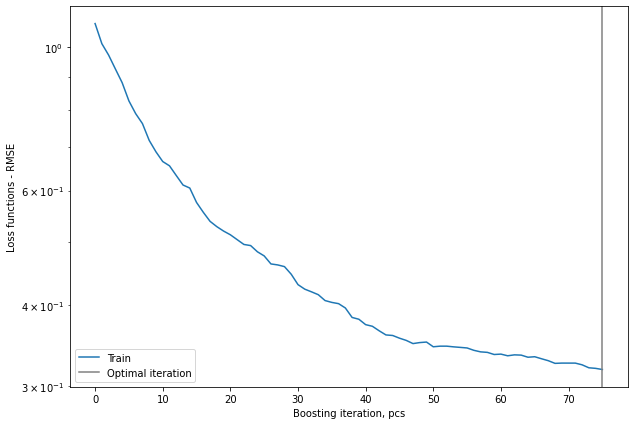

In [31]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [32]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [33]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -6.11
RMSE: 0.3
Relative RMSE(%):  -1.327
MSE: 0.1
R square: 87.2%


In [34]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.029
a1: 0.818
R^2: 0.876
Uncertainty
a0: -0.029+/-0.028
a1: 0.818+/-0.031


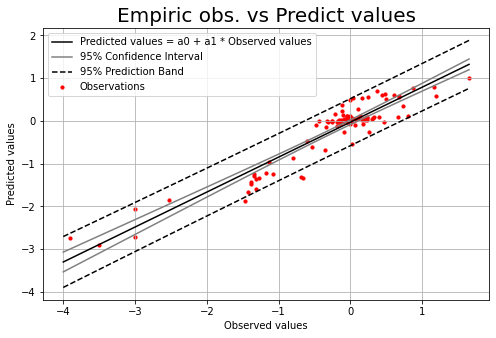

In [36]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

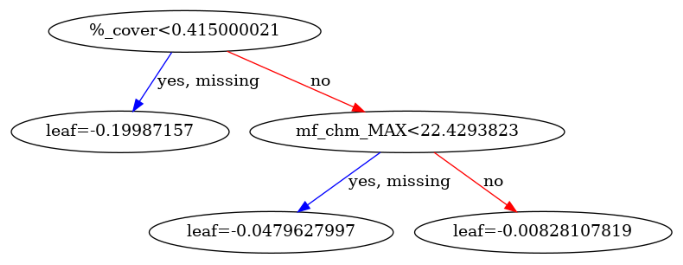

In [39]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

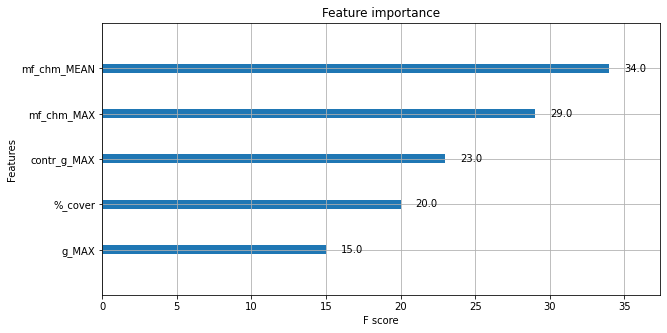

In [41]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

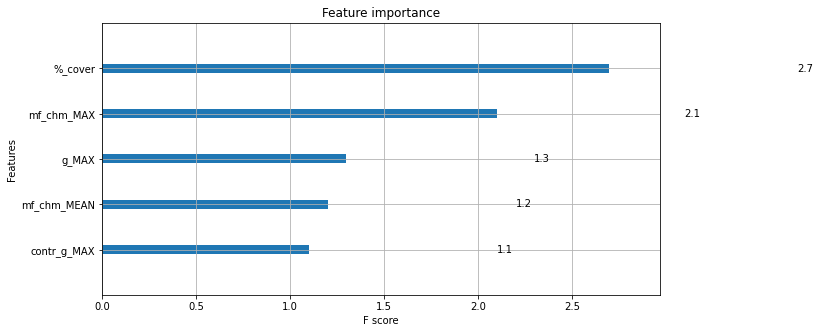

In [42]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

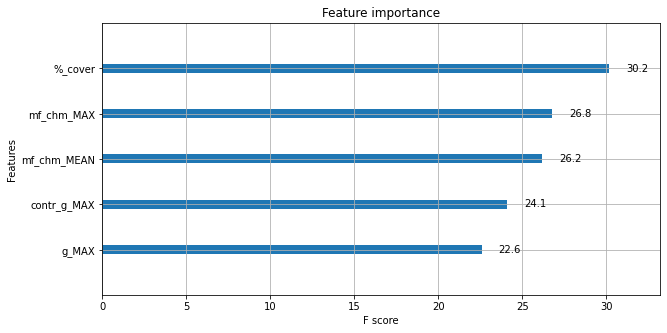

In [43]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [44]:
# Load SHAP`s library
import shap

In [45]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


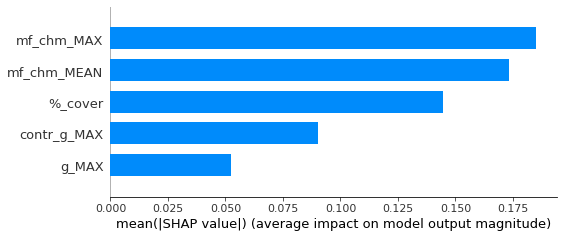

In [46]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

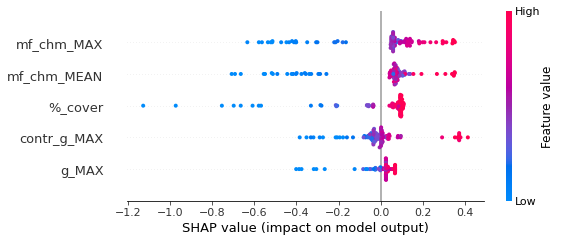

In [47]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

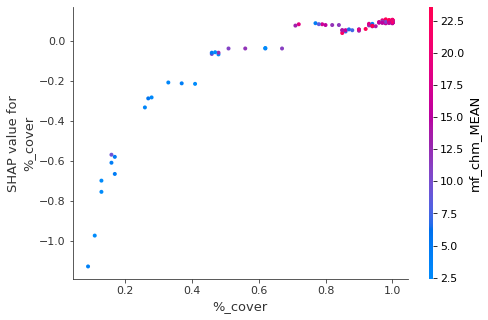

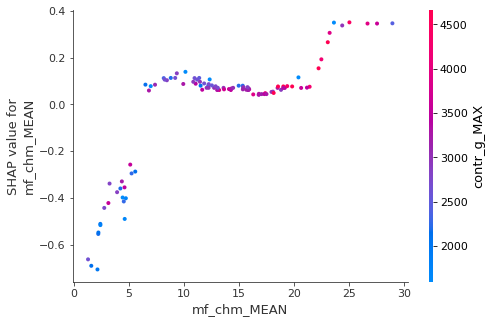

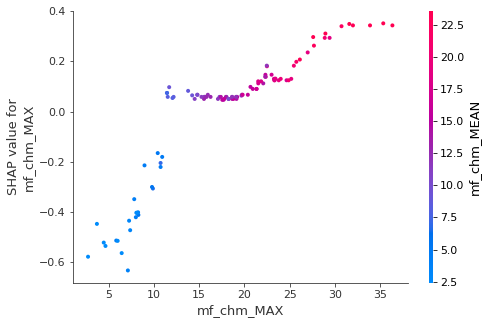

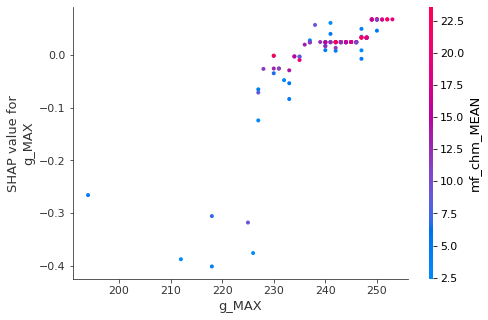

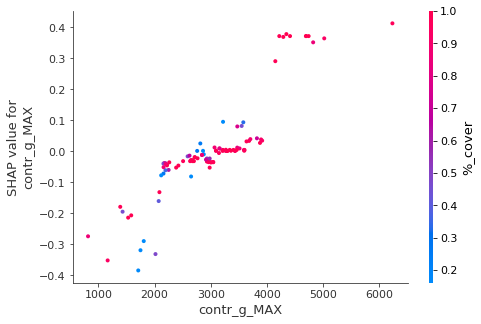

In [48]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [49]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mstem_bark_XGB_model_with_texture.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mstem_bark_XGB_model_with_texture.txt")